# Tema: **Impacto del COVID-19 en el sector laboral costarricences.

## Identificación del problema

La pandemia de COVID-19 generó suspensiones, reducciones de jornada laboral y desempleo e inactividad, ya sea por incompatibilidad del trabajo desempeñado con la modalidad de teletrabajo, recortes administrativos o por falta de herramientas tecnológicas. Asimismo, las personas que lograron mantenerse laborando durante este periodo vieron un cambio en la calidad de su empleo, debido al aumento de los costos fijos que las medidas sanitarias que las autoridades obligaron a implementar se vieron reflejados en los costos fijos de las eempresas y en reducción de la oferta laboral (esto implicaba una mayor carga laboral para los empleados que permanecieron en las empresas), una menor capacidad utilizada.

Muchos sectores se vieron afectados de manera más inmediata y persistente son los servicios de alojamiento, esparcimiento, comercio, transporte, y aquellos sectores mayormente dependientes del turismo local y foráneo. Por otra parte, el comercio electrónico y los servicios de telecomunicaciones y tecnologías de la información, así como la venta de productos farmacéuticos se vieron favorecidos por el aumento de la demanda de sus productos y servicios. 

El gobierno otorgo la facilidad de retirar el FCL (fondo de capitalización laboral) a aquellos funcionarios que le redujeran o suspendieran su jornada laboral. Los que quedaron desempleados ya tenían ese derecho porque este fondo es un auxilio de cesantía. Por medio de este trámite se tratará de darle seguimieno a la situación laboral de esta población, que en teoría, sería la población economicamente activa.

## Objetivo

> Analizar la afectación de la situación laboral durante lo vivido con la pandemia hasta la fecha.

> Identificar los sectores más afectados, de acuerdo a los retiros de FCL y despidos o suspensiones.

> Identificar la recuperación en el sector laboral.

> Indagar si el tema referente al COVID, fcl y restricciones, realmente fue percibido como un problema por la población costarricense, así como el tipo de sentimientos experimentados en la difusión de las noticias. Este es un breve estuduio cuya finalidad es didactica para entender el funcionamiento del webscraping.


## Preguntas de investigación
*	¿En que sectores permanecieron las personas que no fueron despedidas o que recperaron su ocupación durante la pandemia de COVID-19? 
*	¿Cuales fueron los sectores más afectados? 
*   ¿A que sectores regresaron los trabajadores de los sectores más afectados? 
*	¿Qué parte de la estructura productiva fue la más golpeada: micros, pequeñas, medianas o grandes empresas?
*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

#  Analisis de comportamiento laboral por COVID
### Se va a predecir...

Los empleados de Costa Rica en época de pandemia se vieron obligados a reducir su lornada laboral o bien ser suspendidos temporalmente. En casos peores fueron despedidos.

Los trabajadores son la fuerza laboral de un país y son los que sostienen la economía. ¿Qué pasa si estos trabajadores no logran recuperar sus trabajos o sus ingresos, cómo se verá afectado el país? Por lo tanto, la tasa de desempleo o subempleo es una de las métricas más importantes para mostrar la economía del país.

La tasa de salida del trabajador por concepto de COVID es un KPI para comprender lo que esta pasando. Esta tasa representa el porcentaje de trabajadores que quedaron desempleado o subempleados por la pandemia.

Se tratará de identificar cual es la tasa de recuperación posible con base en las variable obtenidas. 

## Tabla de contenido
### 1) Introducción

> * Dataset, caracteristicas(features) y objetivo(target value)
> * Descripción del problema

### 2) Análisis descriptivo y EDA (Análisis de datos exploratorios)

> * Desempleado y correlación entre (variables)features
> * Perfil de los trabajadores desempleados
> * Distribución salarial anterior y nueva --Tenure and Monthly charges distribution

### 3) Analisis de Clusters

> * Detección de clústeres de desempleado
> * Análisis de clústeres de desempleados: por datos demográficos, edad y estado civil, y si se consiguiera por sector y zona geografica

### 4) Modelo de predicción de desempleados

> * Proceso de modelo de predicción 
> * Evaluación del modelo

In [1]:
__author__ = "Eduardo Oreamuno"
__email__ = "eoaparicio@yahoo.com"

### 1. Introduction

Conjunto de datos (dataset) , características (features) y valor objetivo (target value)
Source : Superintendencia de Pensiones

La SUPEN proporcionó datos anonimos de los trabajadores para la industria de pensiones por medio de los retiros del FCL realizados, para predecir la pérdida de empleos por COVID en función de la información demográfica, y otros datos. El objetivo principal aquí es analizar el comportamiento de los trabajadores que retiraron dicho fondo y predecir el comportamiento que podría tener en un futuro.

La información tiene información relacionada a,

Demográfico:
* Género: Masculino - Femenino - Desconocido
* Rango de edad:
* Pensionado

Salarial
   * Salario final tras COVID
   * Salario nuevo post COVID
   * Si tuvo reducción
   * Si se pensionó
    
Se esta tratando de obtener información de patronos, para poder proporcionarle más caracteristicas al estudio, como el sector o la zona geografica.

Objetivo:
* Desempleado - ¿Si el trabajador recuperará o no el trabajo?

### Descripción del problema

* ¿Por qué a los trabajadores retiran el FCL? 

> * Por extinción laboral
> * Por suspensión laboral
> * Por reducción laboral 

* ¿Por qué a los trabajadores los desemplean? 

>    * Altos Salarios
>    * Pocos ingresos **No tenemos esto para evaluarlo.**
>    * Sectores afectado **Con la de patronos se podrá obtener.**
>    * Zonas geofráficas
>    * Grupos etarios 
>    * Otras razones
    
* ¿Cómo detectar al trabajador despedido?

>    * Monitoreo
>    * Seguimiento salarial 
>    * Seguimiento de aportes


### 2. Análisis descriptivo y EDA (Análisis de datos exploratorios)

Aquí, se han explorado datos, características y para tratar de tener algo de intuición sobre ellos.

### Cargar bibliotecas(libraries) y conjunto de datos (dataset)

In [2]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text

#constantes
random_state = 42
plotColor = ['c','palegreen','salmon','plum','aquamarine', 'y','tan','peru']
#markers = ['+','o','*','^','v','>','<','-','#']
markers = ['P','H','*','^','v','>','<','D','s']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath, encoding = 'utf8', sep=",")
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [4]:
data_file = 'RetirosFCLPaT1.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.columns =['Afiliado','Periodo','Edad','RangoEdad','Genero','EstadoCivil',\
                 'EstCiv','HayRetiro','TipoRetiro','Salario','RangoSalario','SalarioPromedioRetorno',\
                 'RangoSalarioRetorno','Reduccion','%Reduccion','TuvoReduccion','FechaRetorno','FechaUltimoAporte'\
                 ,'HayAportes','Pensionado','Difunto','MesDesempleadoAntesRetorno','MesesDesempleado',\
                 'MesesTrancurridos','Desempleado','EstuvoDesempleado','Sector','ActiviEconomica','DivisionEconomica',\
                'Provincia','Canton']


Data object initiated


### Dimensionalidad & comprobación de estado

In [5]:
# Observar las dimensiones dle conjunto de datos
df_raw.shape

(924046, 31)

In [6]:
# Observar la estrctura delconjunto de datos
df_raw.head().T
#df_raw.groupby('Desempleado').count()

0  \
Afiliado                                                                27   
Periodo                                                         2020-05-31   
Edad                                                                    85   
RangoEdad                                                      Entre59y100   
Genero                                                                   F   
EstadoCivil                                                              4   
EstCiv                                                               VIUDO   
HayRetiro                                                                1   
TipoRetiro                                                               E   
Salario                                                             245133   
RangoSalario                                                             1   
SalarioPromedioRetorno                                          2.4319e+06   
RangoSalarioRetorno                                                      5   
Reduccion                                                     -2.18677e+06   
%Reduccion                                                        -8.92072   
TuvoReduccion                                                            0   
FechaRetorno                                                    2020-06-30   
FechaUltimoAporte                                               2020-06-30   
HayAportes                                                               1   
Pensionado                                                               1   
Difunto                                                                  0   
MesDesempleadoAntesRetorno                                               1   
MesesDesempleado                                                        10   
MesesTrancurridos                                                       11   
Desempleado                                                              0   
EstuvoDesempleado                                                        0   
Sector                                                      SECTOR PRIVADO   
ActiviEconomica                                  INTERMEDIACION FINANCIERA   
DivisionEconomica           OTROS DE TIPOS DE INTEMEDIACIÓN FINANCIERA NCP   
Provincia                                                         SAN JOSE   
Canton                                                            SAN JOSÉ   

                                        1              2  \
Afiliado                              217            217   
Periodo                        2021-03-31     2021-03-31   
Edad                                   77             77   
RangoEdad                     Entre59y100    Entre59y100   
Genero                                  M              M   
EstadoCivil                             1              1   
EstCiv                               SOLT           SOLT   
HayRetiro                               1              1   
TipoRetiro                              E              E   
Salario                                 0              0   
RangoSalario                            1              1   
SalarioPromedioRetorno                  0              0   
RangoSalarioRetorno                     0              0   
Reduccion                               0              0   
%Reduccion                              0              0   
TuvoReduccion                           0              0   
FechaRetorno                          NaN            NaN   
FechaUltimoAporte                     NaN            NaN   
HayAportes                              0              0   
Pensionado                              1              1   
Difunto                                 0              0   
MesDesempleadoAntesRetorno              1              1   
MesesDesempleado                        1              1   
MesesTrancurridos                       1              1   
Desempleado                             0              0   
EstuvoDesemplead

In [7]:
# Información del conjunto d edatos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924046 entries, 0 to 924045
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Afiliado                    924046 non-null  int64  
 1   Periodo                     924046 non-null  object 
 2   Edad                        924046 non-null  int64  
 3   RangoEdad                   924046 non-null  object 
 4   Genero                      924046 non-null  object 
 5   EstadoCivil                 924046 non-null  int64  
 6   EstCiv                      924046 non-null  object 
 7   HayRetiro                   924046 non-null  int64  
 8   TipoRetiro                  924046 non-null  object 
 9   Salario                     924046 non-null  float64
 10  RangoSalario                924046 non-null  int64  
 11  SalarioPromedioRetorno      924046 non-null  float64
 12  RangoSalarioRetorno         924046 non-null  int64  
 13  Reduccion     

Se puede observar que algunos datos tienen valores perdidos.Esos valores faltantes debemos manejarlos de alguna forma para que nuestro modelo funcione con precisión. 

In [8]:
df_raw.describe(include='all')

Afiliado     Periodo           Edad   RangoEdad  Genero  \
count   9.240460e+05      924046  924046.000000      924046  924046   
unique           NaN          14            NaN           5       3   
top              NaN  2020-05-31            NaN  Entre31y45       M   
freq             NaN      147874            NaN      380844  623091   
mean    2.947377e+06         NaN      38.758647         NaN     NaN   
std     1.668108e+06         NaN      11.881537         NaN     NaN   
min     2.700000e+01         NaN      16.000000         NaN     NaN   
25%     1.508521e+06         NaN      29.000000         NaN     NaN   
50%     3.000022e+06         NaN      36.000000         NaN     NaN   
75%     4.469212e+06         NaN      46.000000         NaN     NaN   
max     5.763784e+06         NaN     221.000000         NaN     NaN   

          EstadoCivil  EstCiv  HayRetiro TipoRetiro       Salario  ...  \
count   924046.000000  924046   924046.0     924046  9.240460e+05  ...   
unique            NaN       6        NaN          3           NaN  ...   
top               NaN    SOLT        NaN          E           NaN  ...   
freq              NaN  493408        NaN     781245           NaN  ...   
mean         1.228575     NaN        1.0        NaN  1.953401e+05  ...   
std          1.147712     NaN        0.0        NaN  8.426102e+05  ...   
min          0.000000     NaN        1.0        NaN  0.000000e+00  ...   
25%          1.000000     NaN        1.0        NaN  0.000000e+00  ...   
50%          1.000000     NaN        1.0        NaN  0.000000e+00  ...   
75%          2.000000     NaN        1.0        NaN  2.500000e+05  ...   
max          5.000000     NaN        1.0        NaN  3.678041e+08  ...   

        MesDesempleadoAntesRetorno  MesesDesempleado  MesesTrancurridos  \
count                924046.000000     924046.000000      924046.000000   
unique                         NaN               NaN                NaN   
top                            NaN               NaN                NaN   
freq                           NaN               NaN                NaN   
mean                      6.139542          6.280804           7.759708   
std                       4.495683          4.605637           4.109215   
min                       0.000000          0.000000           0.000000   
25%                       1.000000          1.000000           4.000000   
50%                       6.000000          7.000000           9.000000   
75%                      11.000000         11.000000          11.000000   
max                      13.000000         13.000000          13.000000   

          Desempleado  EstuvoDesempleado          Sector ActiviEconomica  \
count   924046.000000      924046.000000          924046          924046   
unique            NaN                NaN               3              17   
top               NaN                NaN  SECTOR PRIVADO   NO ENCONTRADA   
freq              NaN                NaN          691910          160436   
mean         0.786477           0.725937             NaN             NaN   
std          0.409794           0.446041             NaN             NaN   
min          0.000000           0.000000             NaN             NaN   
25%          1.000000           0.000000             NaN             NaN   
50%          1.000000           1.000000             NaN             NaN   
75%          1.000000           1.000000             NaN             NaN   
max          1.000000           1.000000             NaN             NaN   

       DivisionEconomica  Provincia    Canton  
count             924046     924046    763305  
unique               309          8        83  
top        NO ENCONTRADA   SAN JOSE  SAN JOSÉ  
freq              160436     391553    206135  
mean                 NaN        NaN       NaN  
std                  NaN        NaN       NaN  
min                  NaN        NaN       NaN  
25%                  NaN        NaN       NaN  
50%                  NaN

Para los parámetros numéricos, se completaron campos como la media, la desviación estándar, los percentiles y el máximo. Para las características categóricas, se han completado el recuento, el único, el superior (valor más frecuente) y la frecuencia correspondiente. Esto nos da una idea amplia de nuestro conjunto de datos.

En la identificación de datos hecha en POWER BI, ya se habien emcontrado algunos valores extraños los cuale sprocederemos a ir eliminando por que no impactan el la muestra.

* Crear Columna de brechas
* Convertir en fecha la columnas Periodo, FechaRetorno y FechaUltimo Aporte

In [9]:
# Crear Columna de brechas
# Convertir en fecha la columnas Periodo, FechaRetorno y FechaUltimo Aporte
df_work = df_raw.copy()

df_work['Periodo'] = pd.to_datetime(df_work['Periodo'])
df_work['FechaRetorno'] = pd.to_datetime(df_work['FechaRetorno'])
df_work['FechaUltimoAporte'] = pd.to_datetime(df_work['FechaUltimoAporte'])
df_work['Periodo'] = pd.to_datetime(df_work['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#FechaCorte = '2021-03-31'
#df_work['DiferenciaBrechas'] = df_work['RangoSalario'] - df_work['RangoSalarioRetorno']
#df_work['DiferenciaBrechas'] = np.where(df_work['DiferenciaBrechas']<=0, 0, df_work['DiferenciaBrechas'])
df_work.loc[df_work['Canton'].isnull()==True,'Canton'] = 'NO DEFINIDO'
df_work.loc[df_work['Provincia'].isnull()==True,'Provincia'] = 'NO DEFINIDA'
# Para que solo consideresi existen y las interprete como binarias
df_work['DiferenciaBrechas'] = np.where(df_work['RangoSalario'] - df_work['RangoSalarioRetorno'] > 0,1,0) #np.select(condicion,values,default=0)
df_work['MesDesempleadoAntesRetorno'] = np.where(df_work['MesDesempleadoAntesRetorno'] > 0, 1, 0)
df_work['MesesDesempleado'] = np.where(df_work['MesesDesempleado'] > 0, 1, 0)
df_work['HayAportes'] = np.where(df_work['HayAportes'] > 0, 1, 0)
# Hay slo 30 registros que genero en X, mejor cambiarlos con la mayoria para no afectar por un elemento más el modelo.
df_work['Genero']= df_work['Genero'].replace(['X'],['M'])
df_work["Ubicacion"] = df_work["Provincia"] + "_"+ df_work["Canton"]

df_work.head().T

0  \
Afiliado                                                                27   
Periodo                                                            2020/05   
Edad                                                                    85   
RangoEdad                                                      Entre59y100   
Genero                                                                   F   
EstadoCivil                                                              4   
EstCiv                                                               VIUDO   
HayRetiro                                                                1   
TipoRetiro                                                               E   
Salario                                                             245133   
RangoSalario                                                             1   
SalarioPromedioRetorno                                          2.4319e+06   
RangoSalarioRetorno                                                      5   
Reduccion                                                     -2.18677e+06   
%Reduccion                                                        -8.92072   
TuvoReduccion                                                            0   
FechaRetorno                                           2020-06-30 00:00:00   
FechaUltimoAporte                                      2020-06-30 00:00:00   
HayAportes                                                               1   
Pensionado                                                               1   
Difunto                                                                  0   
MesDesempleadoAntesRetorno                                               1   
MesesDesempleado                                                         1   
MesesTrancurridos                                                       11   
Desempleado                                                              0   
EstuvoDesempleado                                                        0   
Sector                                                      SECTOR PRIVADO   
ActiviEconomica                                  INTERMEDIACION FINANCIERA   
DivisionEconomica           OTROS DE TIPOS DE INTEMEDIACIÓN FINANCIERA NCP   
Provincia                                                         SAN JOSE   
Canton                                                            SAN JOSÉ   
DiferenciaBrechas                                                        0   
Ubicacion                                                SAN JOSE_SAN JOSÉ   

                                                  1                        2  \
Afiliado                                        217                      217   
Periodo                                     2021/03                  2021/03   
Edad                                             77                       77   
RangoEdad                               Entre59y100              Entre59y100   
Genero                                            M                        M   
EstadoCivil                                       1                        1   
EstCiv                                         SOLT                     SOLT   
HayRetiro                                         1                        1   
TipoRetiro                                        E                        E   
Salario                                           0                        0   
RangoSalario                                      1                        1   
SalarioPromedioRetorno                            0                        0   
RangoSalarioRetorno                               0                        0   
Reduccion                                         0                        0   
%Reduccion                                        0                        0   
TuvoReduccion                                     0                        0   
FechaRetorno                                    NaT         

Identificar filas duplicadas

In [10]:
# Identificar valor duplicados
valoresduplicados = df_work.duplicated()
print(valoresduplicados.sum())
df_work[valoresduplicados]

71868


Afiliado  Periodo  Edad    RangoEdad Genero  EstadoCivil EstCiv  \
2            217  2021/03    77  Entre59y100      M            1   SOLT   
30           981  2020/09    67  Entre59y100      F            1   SOLT   
41          1176  2020/03    72  Entre59y100      F            3  DIVOR   
42          1176  2020/03    72  Entre59y100      F            3  DIVOR   
48          1218  2020/04    66  Entre59y100      M            2  CASAD   
...          ...      ...   ...          ...    ...          ...    ...   
923884   5730221  2021/02    27      Menor31      F            1   SOLT   
923935   5735213  2021/01    36   Entre31y45      F            0   DESC   
923947   5735296  2021/04    42   Entre31y45      F            0   DESC   
923961   5738221  2020/10    59   Entre45y59      F            2  CASAD   
923976   5742884  2021/03    44   Entre31y45      F            1   SOLT   

        HayRetiro TipoRetiro  Salario  ...  MesesTrancurridos  Desempleado  \
2               1          E      0.0  ...                  1            0   
30              1          E      0.0  ...                  7            0   
41              1          E      0.0  ...                 13            0   
42              1          E      0.0  ...                 13            0   
48              1          E      0.0  ...                 12            0   
...           ...        ...      ...  ...                ...          ...   
923884          1          E      0.0  ...                  2            1   
923935          1          E      0.0  ...                  3            1   
923947          1          E      0.0  ...                  0            1   
923961          1          E      0.0  ...                  6            1   
923976          1          E      0.0  ...                  1            1   

        EstuvoDesempleado          Sector  \
2                       0   NO ENCONTRADO   
30                      0  SECTOR PUBLICO   
41                      0   NO ENCONTRADO   
42                      0  SECTOR PUBLICO   
48                      0   NO ENCONTRADO   
...                   ...             ...   
923884                  1   NO ENCONTRADO   
923935                  1  SECTOR PRIVADO   
923947                  0   NO ENCONTRADO   
923961                  1   NO ENCONTRADO   
923976                  1   NO ENCONTRADO   

                                          ActiviEconomica  \
2                                           NO ENCONTRADA   
30      ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
41                                          NO ENCONTRADA   
42      ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
48                                          NO ENCONTRADA   
...                                                   ...   
923884                                      NO ENCONTRADA   
923935  ACTIVIDADES INMOBILIARIAS, EMPRESARIALES Y DE ...   
923947                                      NO ENCONTRADA   
923961                                      NO ENCONTRADA   
923976                                      NO ENCONTRADA   

                                        DivisionEconomica    Provincia  \
2                                           NO ENCONTRADA  NO DEFINIDA   
30      ACTIVIDADES DE LA ADMINISTRCIÓN PÚBLICA EN GEN...     SAN JOSE   
41                                          NO ENCONTRADA  NO DEFINIDA   
42      ACTIVIDADES DE LA ADMINISTRCIÓN PÚBLICA EN GEN...     SAN JOSE   
48                                          NO ENCONTRADA  NO DEFINIDA   
...                                                   ...          ...   
923884                                      NO ENCONTRADA  NO DEFINIDA   
923935           ACTIVIDADES DE INVESTIGACIÓN Y SEGURIDAD        LIMÓN   
923947                                      NO ENCONTRADA  NO DEFINIDA   
923961                                      NO ENCONTRADA  NO DEFINIDA   
923976                                      NO ENCONTRADA  NO DEFINIDA   

       

* No tenemos filas duplicadas

* Eliminar columnas innecesarias

In [11]:
# Se descartan filas y columnas innecesarias
X = df_work.copy()

X.drop(['Afiliado','EstadoCivil','FechaRetorno','FechaUltimoAporte'], axis=1, inplace=True)
X.drop(['Reduccion', '%Reduccion','MesesTrancurridos'], axis=1, inplace=True)
#X.drop(['RangoEdad', 'RangoSalario','RangoSalarioRetorno'], axis=1, inplace=True)
X.drop(['DivisionEconomica','Provincia','Canton'], axis=1, inplace=True)

df_work= X.copy()
#df_work.head(10)

In [12]:
#df_work.rename(columns={'EstCiv':'EstadoCivil'
#                       ,'DiferenciaBrechas':'Brecha'
#                       ,'MesDesempleadoAntesRetorno':'InactivoPostRetiro'
#                       ,'MesesDesempleado':'InactivoPostUltAporte'
#                      }
#              ,inplace=True)

In [13]:
cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TipoRetiro","TuvoReduccion","HayAportes","Brecha",\
            "InactivoPostUltAporte","InactivoPostRetiro","Sector","ActiviEconomica","Ubicacion"]
num_cols = ["Salario","SalarioPromedioRetorno","Edad"]
#num_cols = num_cols + ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
target_col = 'Desempleado'
nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TipoRetiro","Sector","ActiviEconomica","Ubicacion"]
binary_cols = ["Pensionado","TuvoReduccion", "Difunto","EstuvoDesempleado"]
binary_cols = binary_cols + ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
monto_cols = ["Salario","SalarioPromedioRetorno","Edad"]

In [14]:
# Chequeando valores nulos o extraños
df_work.isnull().any()

Periodo                       False
Edad                          False
RangoEdad                     False
Genero                        False
EstCiv                        False
HayRetiro                     False
TipoRetiro                    False
Salario                       False
RangoSalario                  False
SalarioPromedioRetorno        False
RangoSalarioRetorno           False
TuvoReduccion                 False
HayAportes                    False
Pensionado                    False
Difunto                       False
MesDesempleadoAntesRetorno    False
MesesDesempleado              False
Desempleado                   False
EstuvoDesempleado             False
Sector                        False
ActiviEconomica               False
DiferenciaBrechas             False
Ubicacion                     False
dtype: bool

No se identificaron valores faltantes. Sin embargo, si se hubieran encontrado se podrían manejar de la siguiente manera 

* **Elimine los valores perdidos:** si el conjunto de datos es grande y los valores perdidos son muy pocos, se pueden eliminar los valores directamente porque no tendrá mucho impacto. 
* **Reemplazar con valores medios:** se puede reemplazar con valores medios, pero esto no es aconsejable en caso de que los datos tengan **"outliers"**. 
* **Reemplazar con la mediana:** se puede reemplazar con la mediana, y se recomienda en caso de que los datos tengan **outliers**. 
* **Reemplazar con la moda:** se puede hacer esto con las características categóricas. 
* **Regresión:** se puede usar para predecir el valor nulo usando otros detalles del conjunto de datos. 

### Se identificaran valores extraños

* Salarios menores iguales a 0
* Edad mayor a 100 para trabajadores activos, los cuales se espera que vengan en el set de datos
* Salarios **outliers**

In [15]:
def detectar_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [1, 99])  #Antes 25 y 75
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [16]:
print(df_work['Salario'].count())
print('Salarios menores a 0 : ',df_work[df_work.Salario<0].shape[0])
print('Salarios Retorno menores a 0 : ',df_work[df_work.SalarioPromedioRetorno<0].shape[0])
print('Salarios iguales a 0 : ', df_work[df_work.Salario==0].shape[0])
print('Empleados activos con edades superiores a 100 : ',df_work[df_work.Edad>100].shape[0])
print('Salarios anómalos ',len(detectar_outlier((df_work['Salario']))))
print('Salarios de retorno anómalos ',len(detectar_outlier((df_work['SalarioPromedioRetorno']))))

924046
Salarios menores a 0 :  0
Salarios Retorno menores a 0 :  0
Salarios iguales a 0 :  473236
Empleados activos con edades superiores a 100 :  30
Salarios anómalos  990
Salarios de retorno anómalos  1049


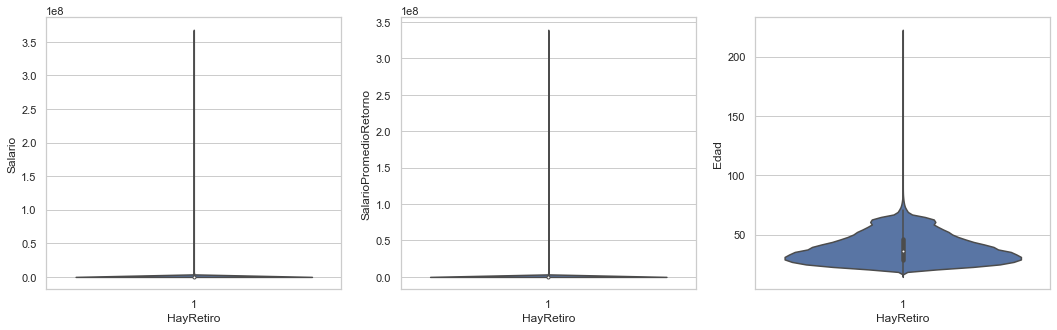

In [17]:
fig , ax = plt.subplots(1,3,figsize=(18,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,monto_cols):
    sns.violinplot(x=df_work["HayRetiro"], y=df_work[col],ax=axis)

Eliminar valores anomalos,

In [18]:
# Se descartan filas y columnas innecesarias
X = df_work.copy()

# Limpiamos datos de salarios y edad extraños
# Se borran 18 registros con edades > 100 se asumen como anomalias.
X = X.drop(X[X['Edad']>100].index)

# Se borra salario menor que 0
X = X.drop(X[X['Salario']<0].index)
X = X.drop(X[X['SalarioPromedioRetorno']<0].index)
X = X.reset_index(drop=True)

df_work = X.copy()
#df_work.head(10)
## Siguen quedando salario perdidos

In [19]:
# Cambiando los anomalos a la media, no se veía razonable mejor se elimina.
df_raw1 = df_work.copy()
monto_cols1=["Salario","SalarioPromedioRetorno"]
#print('Antes ',df_raw1.shape)

for j in monto_cols1:
    outliers = detectar_outlier(df_raw1[j])
    #print(outliers)
    for i in range(0,len(df_raw1)):
        if df_raw1[j][i] in outliers: ##== -200:
            #print(i,j)
            df_raw1[j][i] = -1
            #print(df_raw1[j][i],' contra ',df_raw1[j],' col ', j)
            #df_raw1.drop((df_raw1[df_raw1[j]==df_raw1[j][i]].index))
            #df_raw1[j != df_raw1[j][i]]
            #df_raw1.drop(df_raw1.index[i])

df_raw1 = df_raw1.drop(df_raw1[df_raw1['Salario']<0].index)
df_raw1 = df_raw1.drop(df_raw1[df_raw1['SalarioPromedioRetorno']<0].index)
df_raw1.reset_index(drop=True, inplace=True)
#print('Despues ',df_raw1.shape)

<ipython-input-19-db55545104f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw1[j][i] = -1


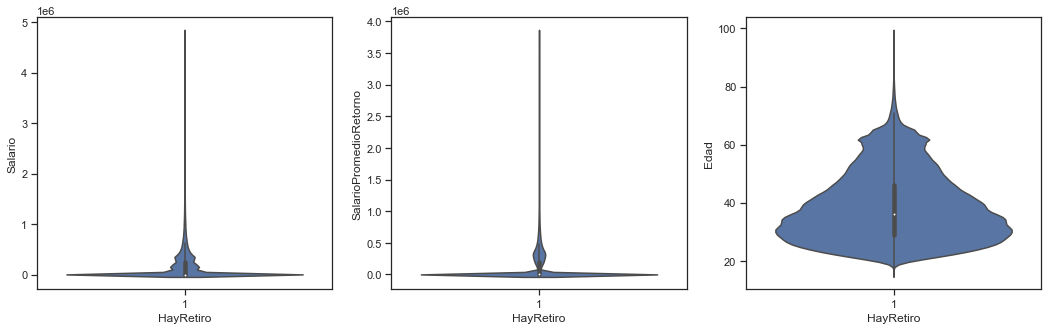

In [20]:
df_work = df_raw1.copy()
fig , ax = plt.subplots(1,3,figsize=(18,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,monto_cols):
    sns.violinplot(x=df_work["HayRetiro"], y=df_work[col],ax=axis)

Los salarios siguen mostrando algunos valres anomalos, pero se mantendrán y se evaluaran más adelante.

Necesitamos cambiar el nombre de las columnas al formato adecuado y debemos transformar columnas como RangoEdad, genero, etc., a un formato similar para análisis futuros. 

### Transformación y cambio de nombre de datos

Aquí, cambiaremos el nombre de algunas columnas y modificaremos los registros con el formato adecuado para su posterior análisis.

In [21]:
def Transforma_Renombra_Datos(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()
    
    df_cal.rename(columns={'EstCiv':'EstadoCivil'
                       ,'DiferenciaBrechas':'Brecha'
                       ,'MesDesempleadoAntesRetorno':'InactivoPostRetiro'
                       ,'MesesDesempleado':'InactivoPostUltAporte'
                      }
              ,inplace=True)

    # Pasa a valor de texto
    df_cal['Edad'] = df_cal.Edad.astype(int)
    df_cal['RangoSalario'] = df_cal.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    df_cal['RangoSalarioRetorno'] = df_cal.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    df_cal['TuvoReduccion'] = df_cal.TuvoReduccion.map({1:'Si',0:'No'})
    df_cal['TipoRetiro'] = df_cal.TipoRetiro.map({'E':'Extinción','S':'Suspensión','R':'Reducción'})
    df_cal['Pensionado'] = df_cal.Pensionado.map({1:'Si',0:'No'})
    df_cal['Desempleado'] = df_cal.Desempleado.map({1:'Si',0:'No'})
    df_cal['Difunto'] = df_cal.Difunto.map({1:'Si',0:'No'})
    df_cal['EstuvoDesempleado'] = df_cal.EstuvoDesempleado.map({1:'Si',0:'No'})

    '''
    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})
    
    # Data mining
    df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']
    '''

    return df_cal    

In [22]:
df_cal = Transforma_Renombra_Datos(df_work)

df_cal.head()

Periodo  Edad    RangoEdad Genero EstadoCivil  HayRetiro TipoRetiro  \
0  2020/05    85  Entre59y100      F       VIUDO          1  Extinción   
1  2021/03    77  Entre59y100      M        SOLT          1  Extinción   
2  2021/03    77  Entre59y100      M        SOLT          1  Extinción   
3  2020/08    76  Entre59y100      F       CASAD          1  Extinción   
4  2021/02    75  Entre59y100      F        SOLT          1  Extinción   

      Salario RangoSalario  SalarioPromedioRetorno  ... Pensionado Difunto  \
0  245133.333     <=Minimo               2431900.0  ...         Si      No   
1       0.000     <=Minimo                     0.0  ...         Si      No   
2       0.000     <=Minimo                     0.0  ...         Si      No   
3       0.000     <=Minimo                     0.0  ...         Si      No   
4       0.000     <=Minimo                     0.0  ...         Si      No   

   InactivoPostRetiro InactivoPostUltAporte Desempleado  EstuvoDesempleado  \
0                   1                     1          No                 No   
1                   1                     1          No                 No   
2                   1                     1          No                 No   
3                   1                     1          No                 No   
4                   1                     1          No                 No   

           Sector                                    ActiviEconomica Brecha  \
0  SECTOR PRIVADO                          INTERMEDIACION FINANCIERA      0   
1   NO ENCONTRADO                                      NO ENCONTRADA      1   
2   NO ENCONTRADO                                      NO ENCONTRADA      1   
3  SECTOR PUBLICO  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...      1   
4  SECTOR PUBLICO  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...      1   

                 Ubicacion  
0        SAN JOSE_SAN JOSÉ  
1  NO DEFINIDA_NO DEFINIDO  
2  NO DEFINIDA_NO DEFINIDO  
3        SAN JOSE_SAN JOSÉ  
4        SAN JOSE_SAN JOSÉ  

[5 rows x 23 columns]

### Representación Gráfica

In [23]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

### Distribución de variables categóricas y binarias por objetivo

D:\Personal\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Personal\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


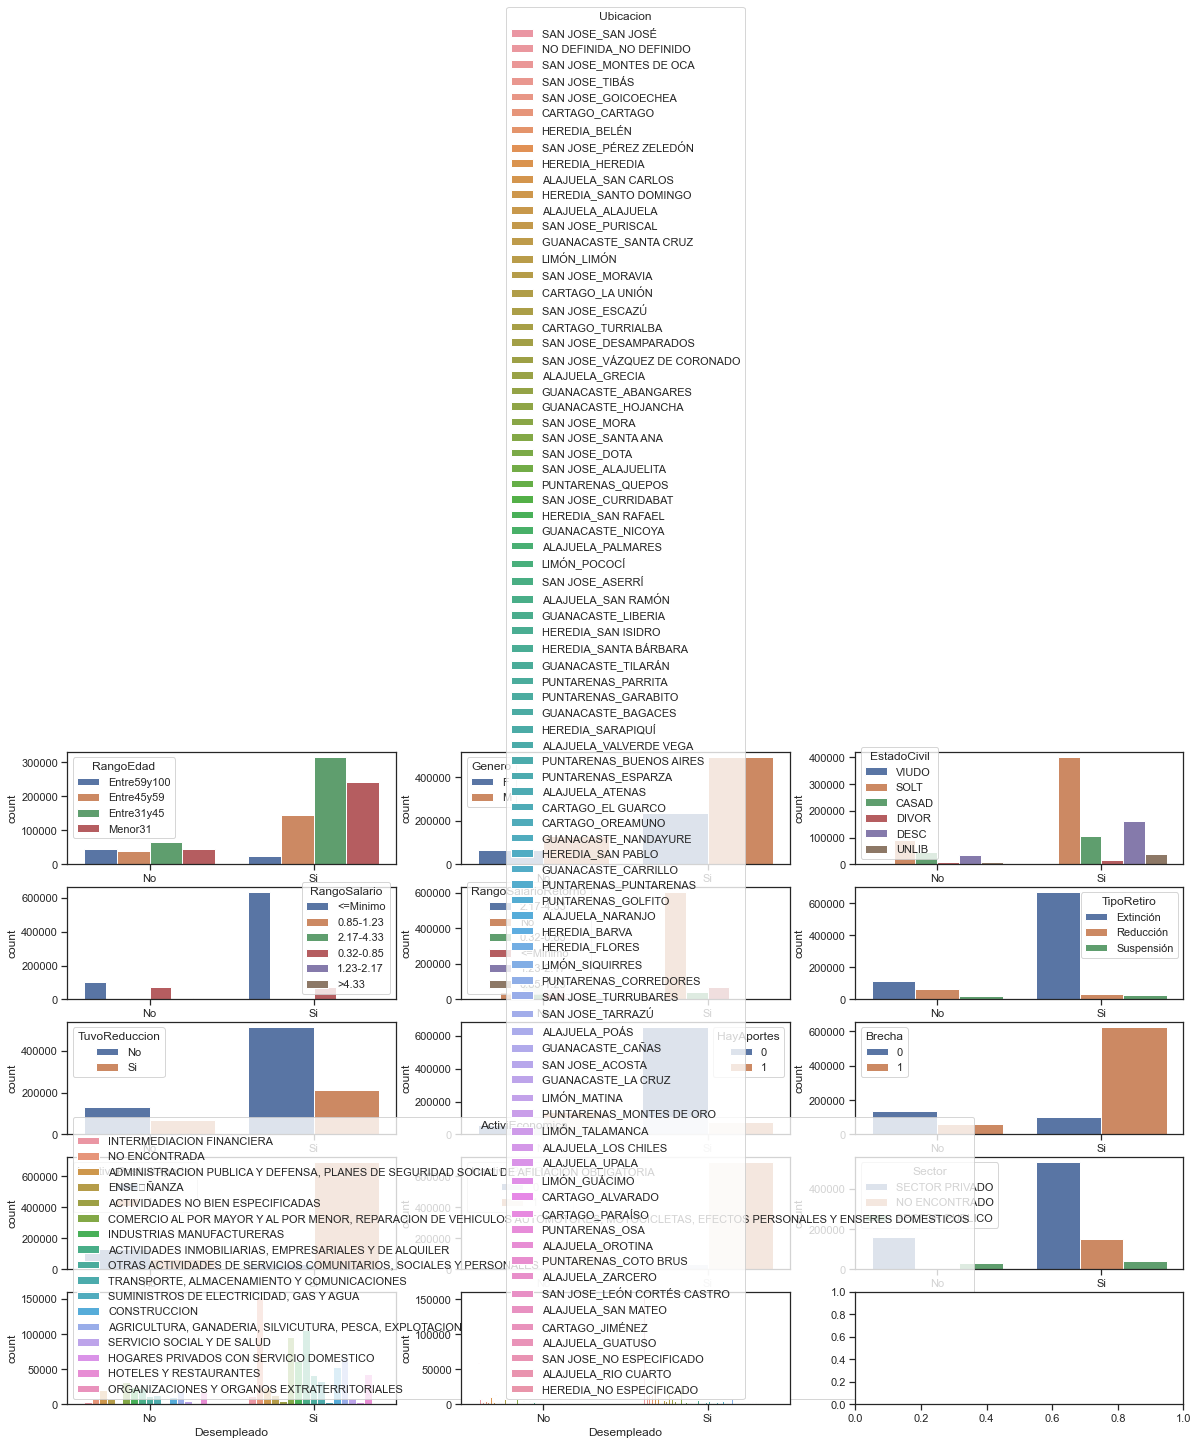

In [24]:
df_temp = df_cal.copy()
fig , ax = plt.subplots(5,3,figsize=(20,12))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,cat_cols):
    sns.countplot(x=df_temp[target_col],hue=df_temp[col],ax=axis)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in cat_cols:
    df_temp.loc[:,cols] = LabelEncoder().fit_transform(df_temp.loc[:,cols])


**De los graficos de arriba se puede deducir que los desempleados or COVID**

> * La mayoria fueron mujeres y de igual froma la recuperación de empleo se dio en la misma proporción.
> * A nivel de edad, los que retiraron y quedaron desempleados, la mayoria estuvieron entre 31 y 45, seguidos muy de cerca por los menores de 31, y luego lo de 45 a 59. 
> * Solteros y estado desconocidos fueron los mayores que retiraron y quedaron desempleados.
> * Con respecto a la parte salarial, la mayoria de los identificados ganaban o reportaban menos del salario mínimo, segudo por el segmento que ganaba menos de 850 mil.
> * De los que regresaron a sus empleos o solo tuvieron reducción de jornada, muchos quedaron sin salario y un alto porcentaje quedo en la rama de ganar salario por menos del mínimo.
> * De los que tuvieron reducción o suspensión pocos quedan con trabajo.


In [25]:
#print(df_raw.groupby(['RangoSalario','Genero']).count())
binary_cols

['Pensionado',
 'TuvoReduccion',
 'Difunto',
 'EstuvoDesempleado',
 'HayAportes',
 'Brecha',
 'InactivoPostUltAporte',
 'InactivoPostRetiro']

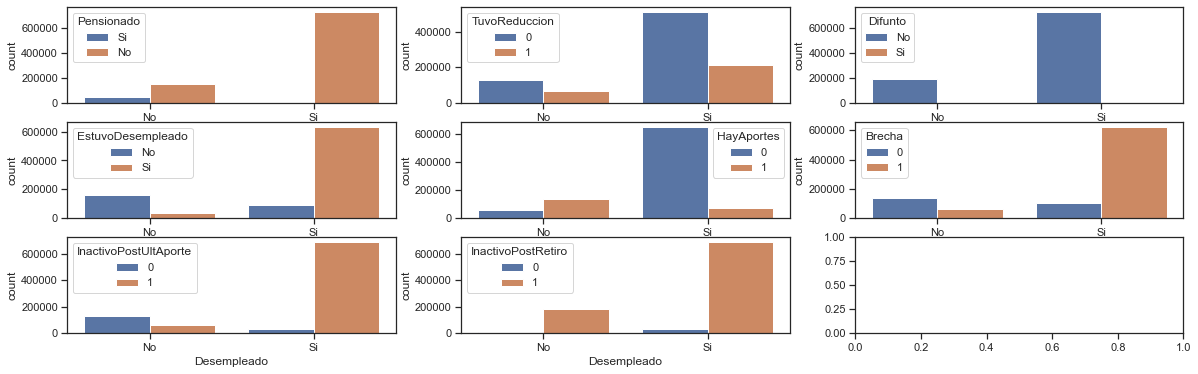

In [26]:
fig , ax = plt.subplots(3,3,figsize=(20,6))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,binary_cols):
    sns.countplot(x=df_temp[target_col],hue=df_temp[col],ax=axis)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in cat_cols:
    df_temp.loc[:,cols] = LabelEncoder().fit_transform(df_temp.loc[:,cols])

En el analisis de la variables binaria se puede apreciar lo siguiente:
> * Hay un grupo de pensionados y difuntos que no son representativos par anuestro analisis, ni para el modelo. Por lo que se eliminaran de la muestra.
> * Con respecto a los que tuvieron reducción salarial, se aprecia que un alto porcentaje quedo desempleado.
> * Las otras caracteristicas muestran, como los calificados coo desempleado presentan una mayor cantidad de aportes, además furon los que tuvieron menos de disminución de brecha; podría ser porque siguieron desempleado. Además se muestra como la mayoria se encontro inactivo despues del retito, osea no tuvo aportes, y tambien un alto porcentaje despues del último aporte no hizo más aportes. 

In [27]:
# Se descartan la filas de pensionados ya que para el estudio no se requieren
X = df_cal.copy()
X = X.drop(X[X['Pensionado']=='Si'].index)
X = X.drop(X[X['Difunto']=='Si'].index)
X.drop(['Pensionado'], axis=1, inplace=True)
X.drop(['Difunto'], axis=1, inplace=True)
X = X.reset_index(drop=True)
df_cal= X.copy()
X = df_work.copy()
X = X.drop(X[X['Pensionado']==1].index)
X = X.drop(X[X['Difunto']==1].index)
X.drop(['Pensionado'], axis=1, inplace=True)
X.drop(['Difunto'], axis=1, inplace=True)
X = X.reset_index(drop=True)
df_work = X.copy()
binary_cols = ["TuvoReduccion"]
binary_cols = binary_cols + [ 'HayAportes','Brecha','InactivoPostUltAporte','InactivoPostRetiro']

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

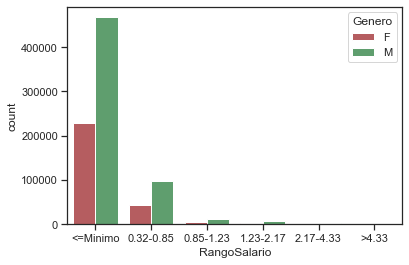

In [28]:
sns.countplot(data=df_cal, x='RangoSalario', hue='Genero', palette=['r','g','blue'])

Confirmando los graficos anteriores, se puede apreciar como los hombres fueron los principales afectados, y particularmente de este gráfico se puede deducir:

* Los rangos de salarios que más predominaba era el rango los menores a 850  850 mil. 
* Pero muy de cerca estaba el mínimo o menos.
* Es importante notar como en salario menores o iguales al mínimo las mujeres tenían una representación importante con respecto a los otros rangos.

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

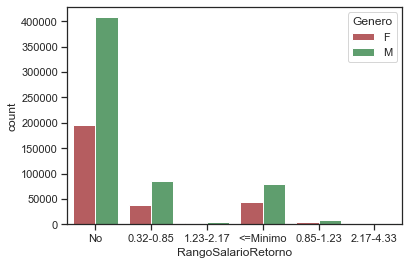

In [29]:
#sns.histplot(data=df_raw, x='Genero', hue='RangoSalarioRetorno')
sns.countplot(data=df_cal, x='RangoSalarioRetorno', hue='Genero', palette=['r','g','blue'])

En este gráfico podemos ver como se comportó la variable de salario de retorno, aunque esto no garantiza que sigan empleados.

* Un alto porcentaje tanto de hombres como mujeres no retornó a un empleo. 
* Otro grupo importante de personas retorno por un salario mínimo o inferior.


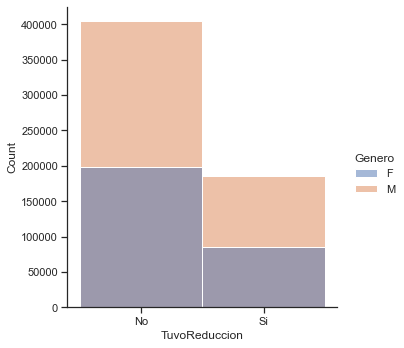

In [30]:
sns.displot(data=df_cal, x='TuvoReduccion', hue='Genero')

Se puede ver que hay casi el doble del tamaño de la muestra de hombres en comparación con las mujeres en el conjunto de datos. Esto no solo se aprecia en el gráfico anterior, sino tambien en el de desempleo por COVID. Si bien esto puede no afectar demasiado las predicciones, la distribución del ingreso sí puede hacerlo. Como se aprecia el porcentaje de hombres que ganan tienen salario inferiores al mínimo es mucho mayor que el porcentaje de hombres que ganan la misma cantidad. Además podemos ver, como el porcentaje de mujeres sin salario es muy similar al de los hombres. Lo que si se evidencia es que proporcionalmente mayor cantidad de mujeres quedo sin salario. 
Este será sin duda un factor significativo y debería ser una característica considerada en el modelo de predicción.

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

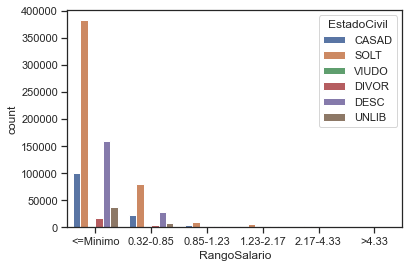

In [31]:
sns.countplot(data=df_cal, x='RangoSalario', hue='EstadoCivil')

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

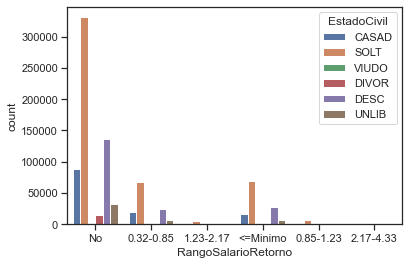

In [32]:
sns.countplot(data=df_cal, x='RangoSalarioRetorno', hue='EstadoCivil')

Text(0.5, 1.0, 'Distribución por edad')

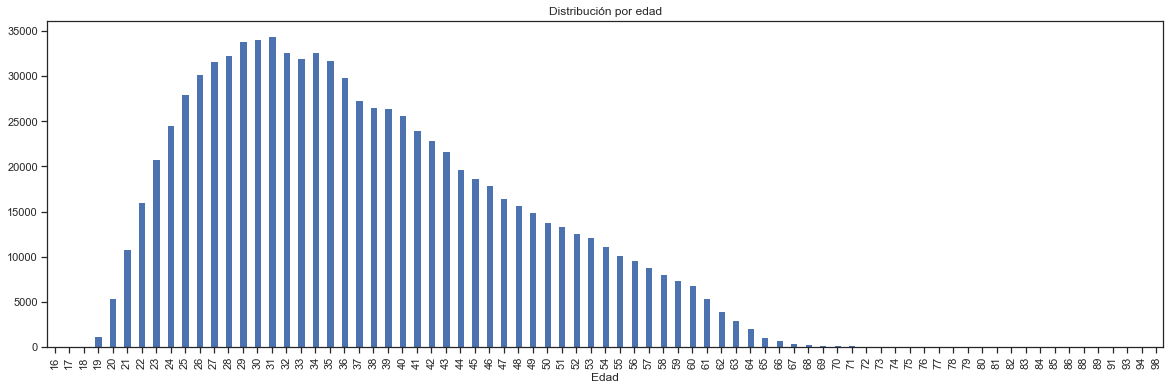

In [33]:
fig = plt.figure(figsize = (20,6))
GrupoEdad = df_cal.groupby(['Edad']).size()
GrupoEdad.plot.bar()
plt.title("Distribución por edad")

La característica de edad describe la edad del individuo. Primero se muestra la distribución de edad de nuestro conjunto de datos con un sesgo hacia la izquierda. Las edades oscilan, mayormente, entre los 20 y los 62 años de edad.

<AxesSubplot:xlabel='Salario', ylabel='Count'>

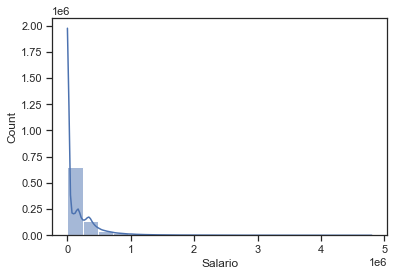

In [34]:
sns.histplot(df_cal['Salario'],bins = 20,kde = True)

Los datos estan sesgados a la izquierda, y los salarios se ahrupan entre 0 y 1.5 millones.

Agrupamos los datos que necesitaremos en nuestro análisis.

### Realizaremos un analisis para ver el comportamiento por mes.

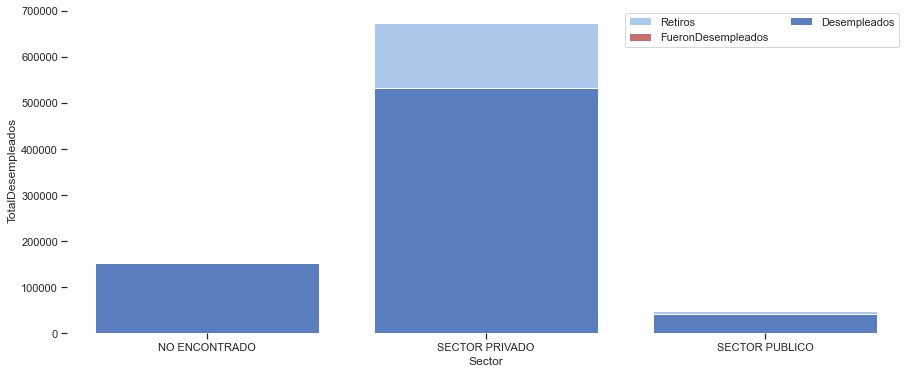

In [35]:
#Sector	ActiviEconomica	Provincia	Canton
result10 = df_cal.groupby(["Sector", "EstuvoDesempleado"])["EstuvoDesempleado"].count().reset_index(name="TotalEstuvoDesempleado")
result10 = result10[result10.EstuvoDesempleado == 'Si']
#print(result10)
result11 = df_cal.groupby(["Sector", "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 'Si']
#result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_work.groupby(["Sector"])["Sector"].count().reset_index(name="TotalAfiliados")
#result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13A = pd.merge(result11,result12,left_on='Sector', right_on='Sector', how='outer')
result13 = pd.merge(result10,result13A,left_on='Sector', right_on='Sector', how='outer')
result13.sort_values(by=['Sector'], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = 'Sector', data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalEstuvoDesempleado', x = 'Sector', data = result13, label = 'FueronDesempleados', color = 'r', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = 'Sector', data = result13, label = 'Desempleados', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

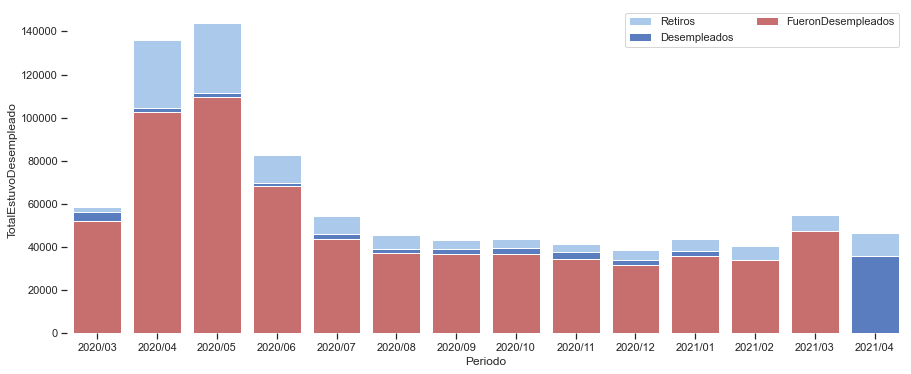

In [36]:
result10 = df_cal.groupby(["Periodo", "EstuvoDesempleado"])["EstuvoDesempleado"].count().reset_index(name="TotalEstuvoDesempleado")
result10 = result10[result10.EstuvoDesempleado == 'Si']
#print(result10)
result11 = df_cal.groupby(["Periodo", "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 'Si']
#result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_work.groupby(["Periodo"])["Periodo"].count().reset_index(name="TotalAfiliados")
#result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13A = pd.merge(result11,result12,left_on='Periodo', right_on='Periodo', how='outer')
result13 = pd.merge(result10,result13A,left_on='Periodo', right_on='Periodo', how='outer')
result13.sort_values(by=['Periodo'], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = 'Periodo', data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = 'Periodo', data = result13, label = 'Desempleados', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalEstuvoDesempleado', x = 'Periodo', data = result13, label = 'FueronDesempleados', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

D:\Personal\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Personal\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


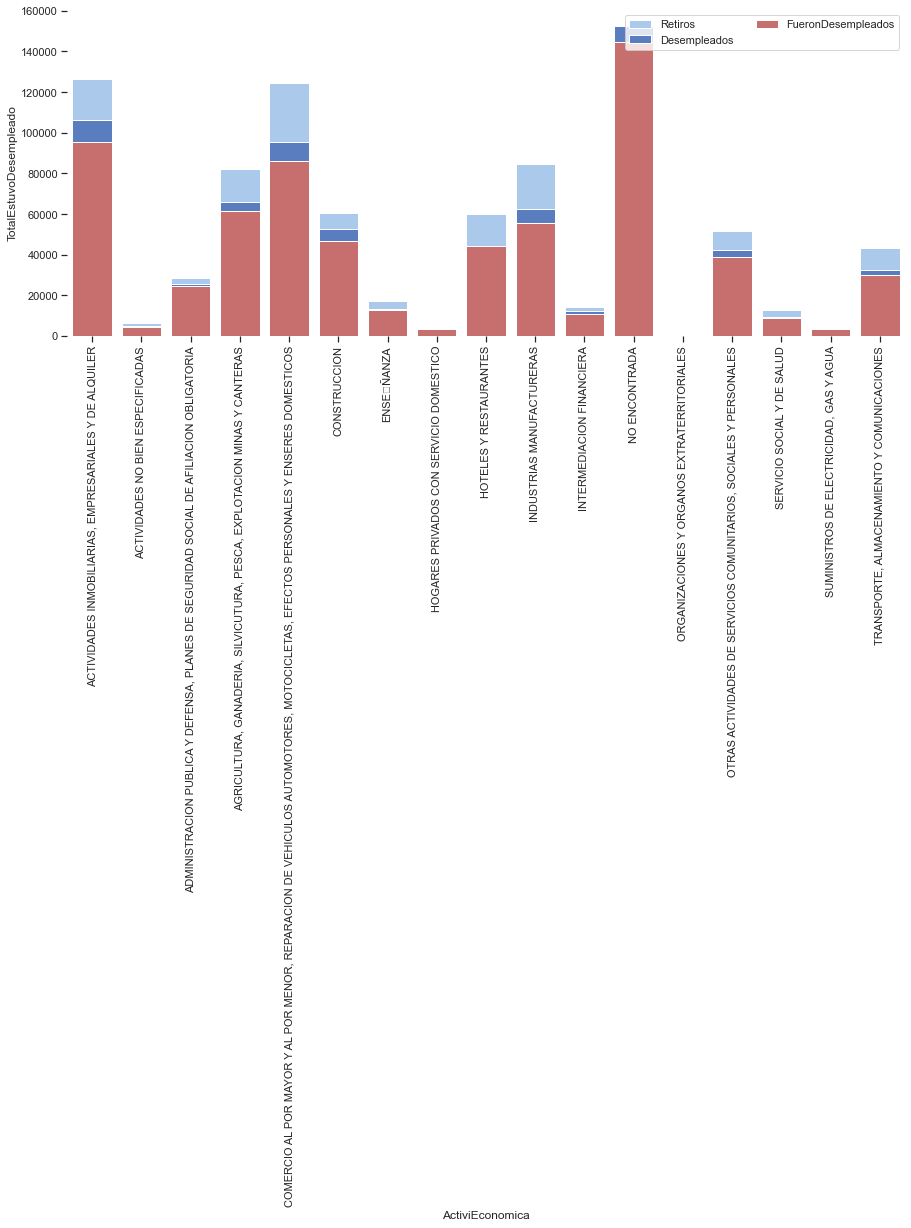

In [37]:
#Sector	ActiviEconomica	Provincia	Canton
campo = "ActiviEconomica"
result10 = df_cal.groupby([campo, "EstuvoDesempleado"])["EstuvoDesempleado"].count().reset_index(name="TotalEstuvoDesempleado")
result10 = result10[result10.EstuvoDesempleado == 'Si']
#print(result10)
result11 = df_cal.groupby([campo, "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 'Si']
#result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_work.groupby([campo])[campo].count().reset_index(name="TotalAfiliados")
#result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13A = pd.merge(result11,result12,left_on=campo, right_on=campo, how='outer')
result13 = pd.merge(result10,result13A,left_on=campo, right_on=campo, how='outer')
result13.sort_values(by=[campo], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = campo, data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = campo, data = result13, label = 'Desempleados', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalEstuvoDesempleado', x = campo, data = result13, label = 'FueronDesempleados', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha="center")
sns.despine(left = True, bottom = True)
plt.show()

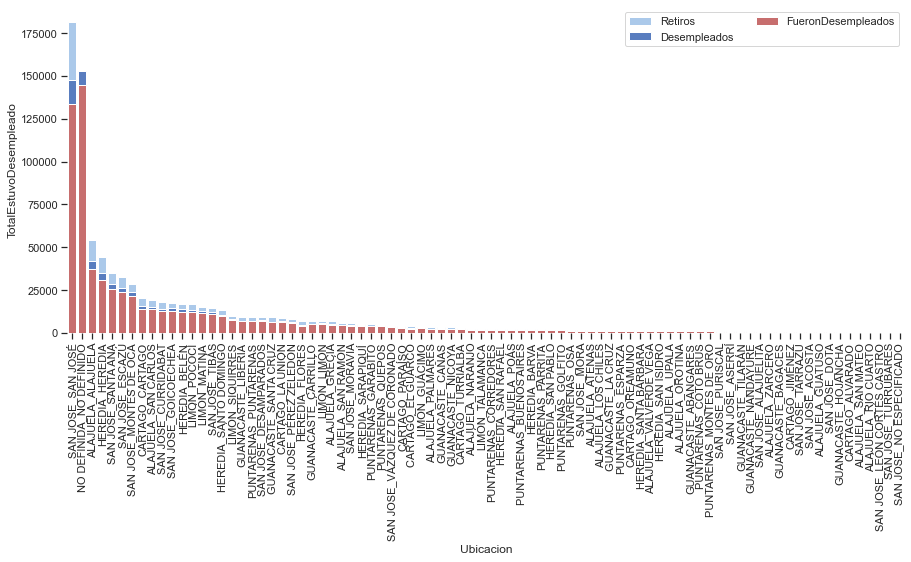

In [38]:
#Sector	ActiviEconomica	Provincia	Canton
#fig = plt.figure(figsize = (20,6))
#GrupoUbic = df_cal.groupby(["Ubicacion"])["Ubicacion"].count().reset_index(name="TotalAfiliados")
#sns.barplot(y = 'TotalAfiliados', x = 'Ubicacion', data = GrupoUbic.sort_values(["TotalAfiliados"], ascending=False), label = 'TotalAfiliados', color = 'b', edgecolor = 'w')
#plt.xticks(rotation=90, ha="center")
#sns.despine(left = True, bottom = True)

campo = "Ubicacion"
result10 = df_cal.groupby([campo, "EstuvoDesempleado"])["EstuvoDesempleado"].count().reset_index(name="TotalEstuvoDesempleado")
result10 = result10[result10.EstuvoDesempleado == 'Si']
#print(result10)
result11 = df_cal.groupby([campo, "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 'Si']
#result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_work.groupby([campo])[campo].count().reset_index(name="TotalAfiliados")
#result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13A = pd.merge(result11,result12,left_on=campo, right_on=campo, how='outer')
result13 = pd.merge(result10,result13A,left_on=campo, right_on=campo, how='outer')
result13.sort_values(by=[campo], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = campo, data = result13.sort_values(["TotalAfiliados"], ascending=False), label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = campo, data = result13.sort_values(["TotalAfiliados"], ascending=False), label = 'Desempleados', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalEstuvoDesempleado', x = campo, data = result13.sort_values(["TotalAfiliados"], ascending=False), label = 'FueronDesempleados', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha="center")
sns.despine(left = True, bottom = True)
plt.show()

In [39]:
#Sector	ActiviEconomica	Provincia	Canton
'''
campo = "Canton"
result10 = df_cal.groupby([campo, "EstuvoDesempleado"])["EstuvoDesempleado"].count().reset_index(name="TotalEstuvoDesempleado")
result10 = result10[result10.EstuvoDesempleado == 'Si']
#print(result10)
result11 = df_cal.groupby([campo, "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 'Si']
#result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_work.groupby([campo])[campo].count().reset_index(name="TotalAfiliados")
#result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13A = pd.merge(result11,result12,left_on=campo, right_on=campo, how='outer')
result13 = pd.merge(result10,result13A,left_on=campo, right_on=campo, how='outer')
result13.sort_values(by=[campo], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = campo, data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = campo, data = result13, label = 'Desempleados', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalEstuvoDesempleado', x = campo, data = result13, label = 'FueronDesempleados', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha="center")
sns.despine(left = True, bottom = True)
plt.show()
'''

'\ncampo = "Canton"\nresult10 = df_cal.groupby([campo, "EstuvoDesempleado"])["EstuvoDesempleado"].count().reset_index(name="TotalEstuvoDesempleado")\nresult10 = result10[result10.EstuvoDesempleado == \'Si\']\n#print(result10)\nresult11 = df_cal.groupby([campo, "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")\n#print(result11)\nresult11 = result11[result11.Desempleado == \'Si\']\n#result11[\'Periodo\'] = pd.to_datetime(result11[\'Periodo\']).apply(lambda x:x.strftime(\'%Y/%m\'))\nresult12 = df_work.groupby([campo])[campo].count().reset_index(name="TotalAfiliados")\n#result12[\'Periodo\'] = pd.to_datetime(result12[\'Periodo\']).apply(lambda x:x.strftime(\'%Y/%m\'))\n#print(result12)\nresult13A = pd.merge(result11,result12,left_on=campo, right_on=campo, how=\'outer\')\nresult13 = pd.merge(result10,result13A,left_on=campo, right_on=campo, how=\'outer\')\nresult13.sort_values(by=[campo], inplace=True)\n#print(result13)\nf, ax = plt.subplots(figsize = (15,6))\nsns

Se aprecia que los picos e retiros se dieron al inicio de la pandemia, entre abril y mayo, luego ha venido a la baja. sin embargo, se nota un repunte en marzo de este año.

In [40]:
df_temp = df_cal.copy()
#df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['Desempleado'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
#df_temp['Periodo'] = pd.to_datetime(df_temp['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
df_temp.head()

Periodo  Edad    RangoEdad Genero EstadoCivil  HayRetiro TipoRetiro  \
0  2020/08    68  Entre59y100      F       CASAD          1  Extinción   
1  2020/11    66  Entre59y100      F        SOLT          1  Extinción   
2  2020/11    66  Entre59y100      F        SOLT          1  Extinción   
3  2020/11    66  Entre59y100      F        SOLT          1  Extinción   
4  2020/05    65  Entre59y100      F       VIUDO          1  Extinción   

   Salario RangoSalario  SalarioPromedioRetorno  ... TuvoReduccion HayAportes  \
0      0.0     <=Minimo                     0.0  ...            No          0   
1      0.0     <=Minimo                     0.0  ...            No          0   
2      0.0     <=Minimo                     0.0  ...            No          0   
3      0.0     <=Minimo                     0.0  ...            No          0   
4      0.0     <=Minimo                     0.0  ...            No          0   

   InactivoPostRetiro  InactivoPostUltAporte  Desempleado  EstuvoDesempleado  \
0                   1                      1            1                 Si   
1                   1                      1            1                 Si   
2                   1                      1            1                 Si   
3                   1                      1            1                 Si   
4                   1                      1            1                 Si   

           Sector                                    ActiviEconomica Brecha  \
0  SECTOR PUBLICO  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...      1   
1  SECTOR PUBLICO  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...      1   
2  SECTOR PUBLICO  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...      1   
3  SECTOR PRIVADO                  ACTIVIDADES NO BIEN ESPECIFICADAS      1   
4  SECTOR PUBLICO  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...      1   

           Ubicacion  
0  SAN JOSE_SAN JOSÉ  
1  SAN JOSE_SAN JOSÉ  
2  SAN JOSE_SAN JOSÉ  
3        LIMÓN_LIMÓN  
4  SAN JOSE_SAN JOSÉ  

[5 rows x 21 columns]

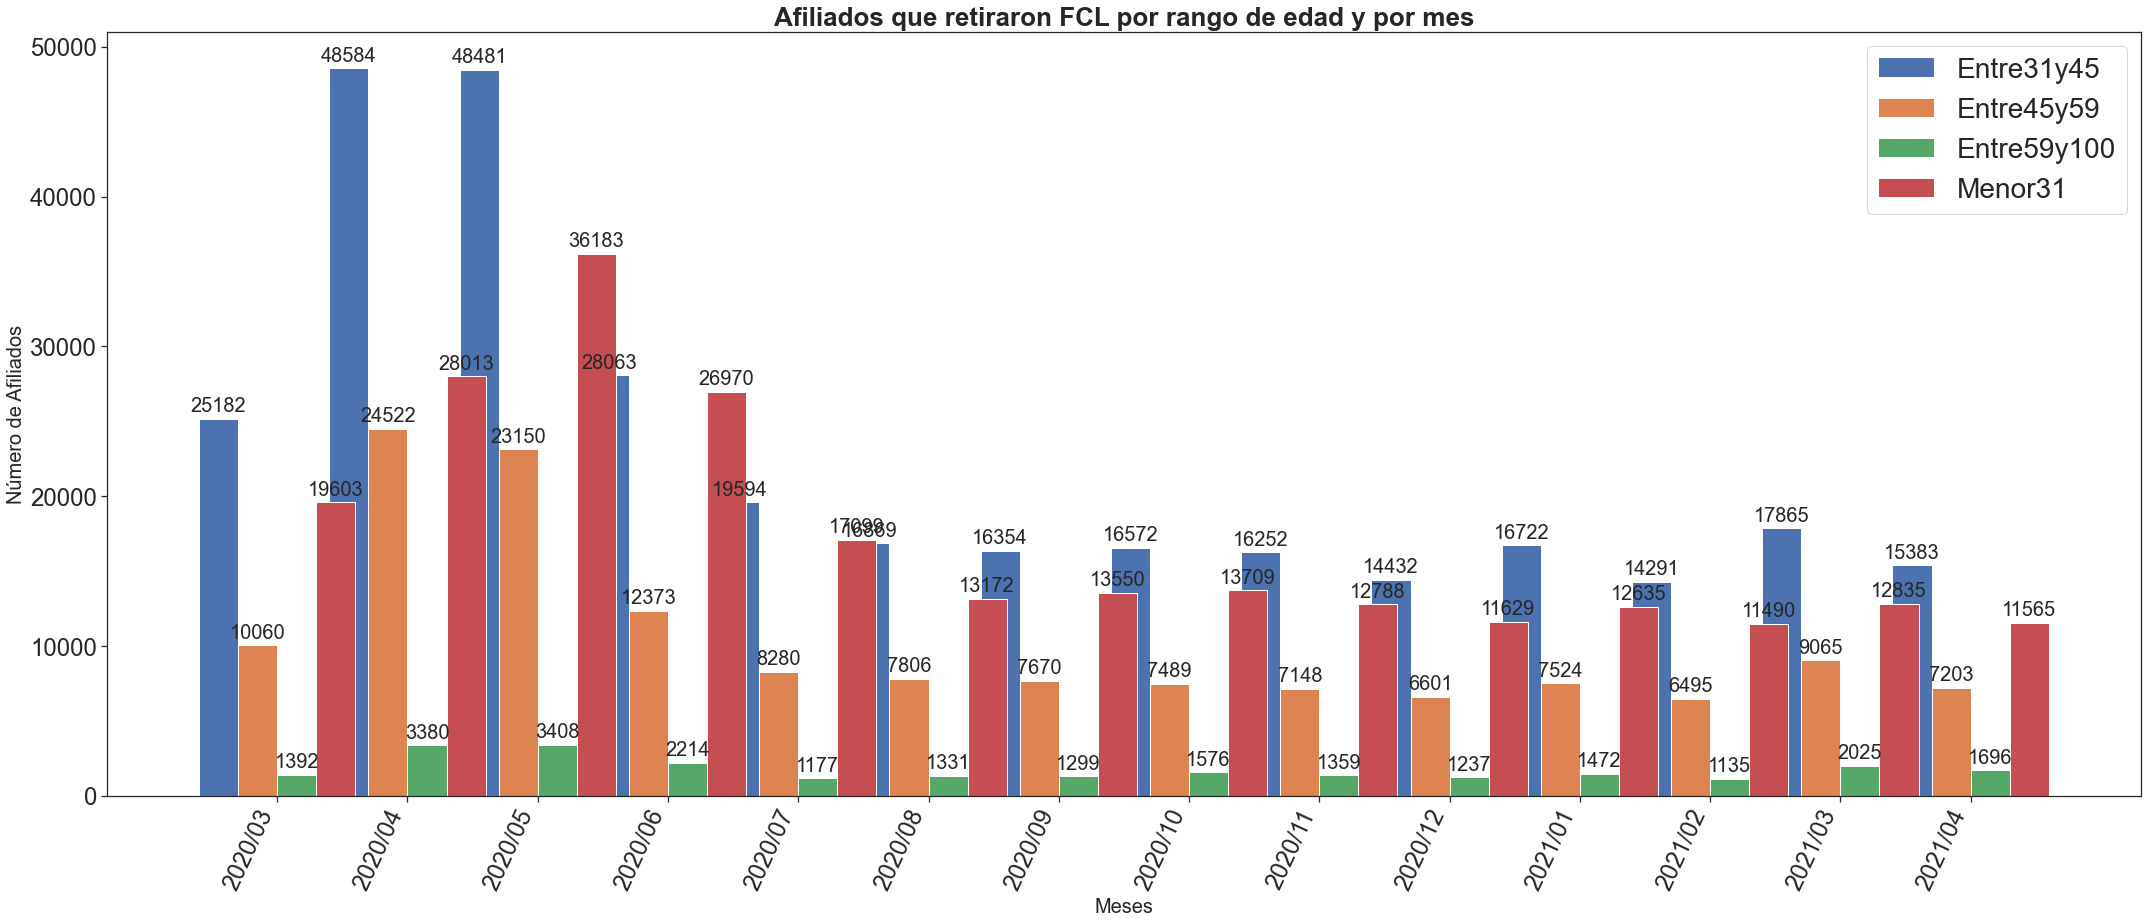

In [41]:
group1 = df_temp.groupby(by = ['Periodo','RangoEdad'])['Desempleado'] #"raw2"
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.3

RangoEdades = list(data1['RangoEdad'].drop_duplicates())
l = len(RangoEdades)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 20)

for i in range(l):
  pos = -(l+1)/2 + i+1
  rect = ax.bar(x + pos*width,data1[data1['RangoEdad'] == RangoEdades[i]].cantidad.astype(int),width)
  autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de edad y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de Afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoEdades,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)
#ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

fig.tight_layout()

#### Analisis entre rango de edad y mes.

Este gráfico nos muestra como en todos los meses la mayoria de afectados siempre han estado entre el rango de 31 y 45 y luego por los menores de 31 años. Y ahora en el mes de marzo se presenta una nueva escalada en los desempleados.

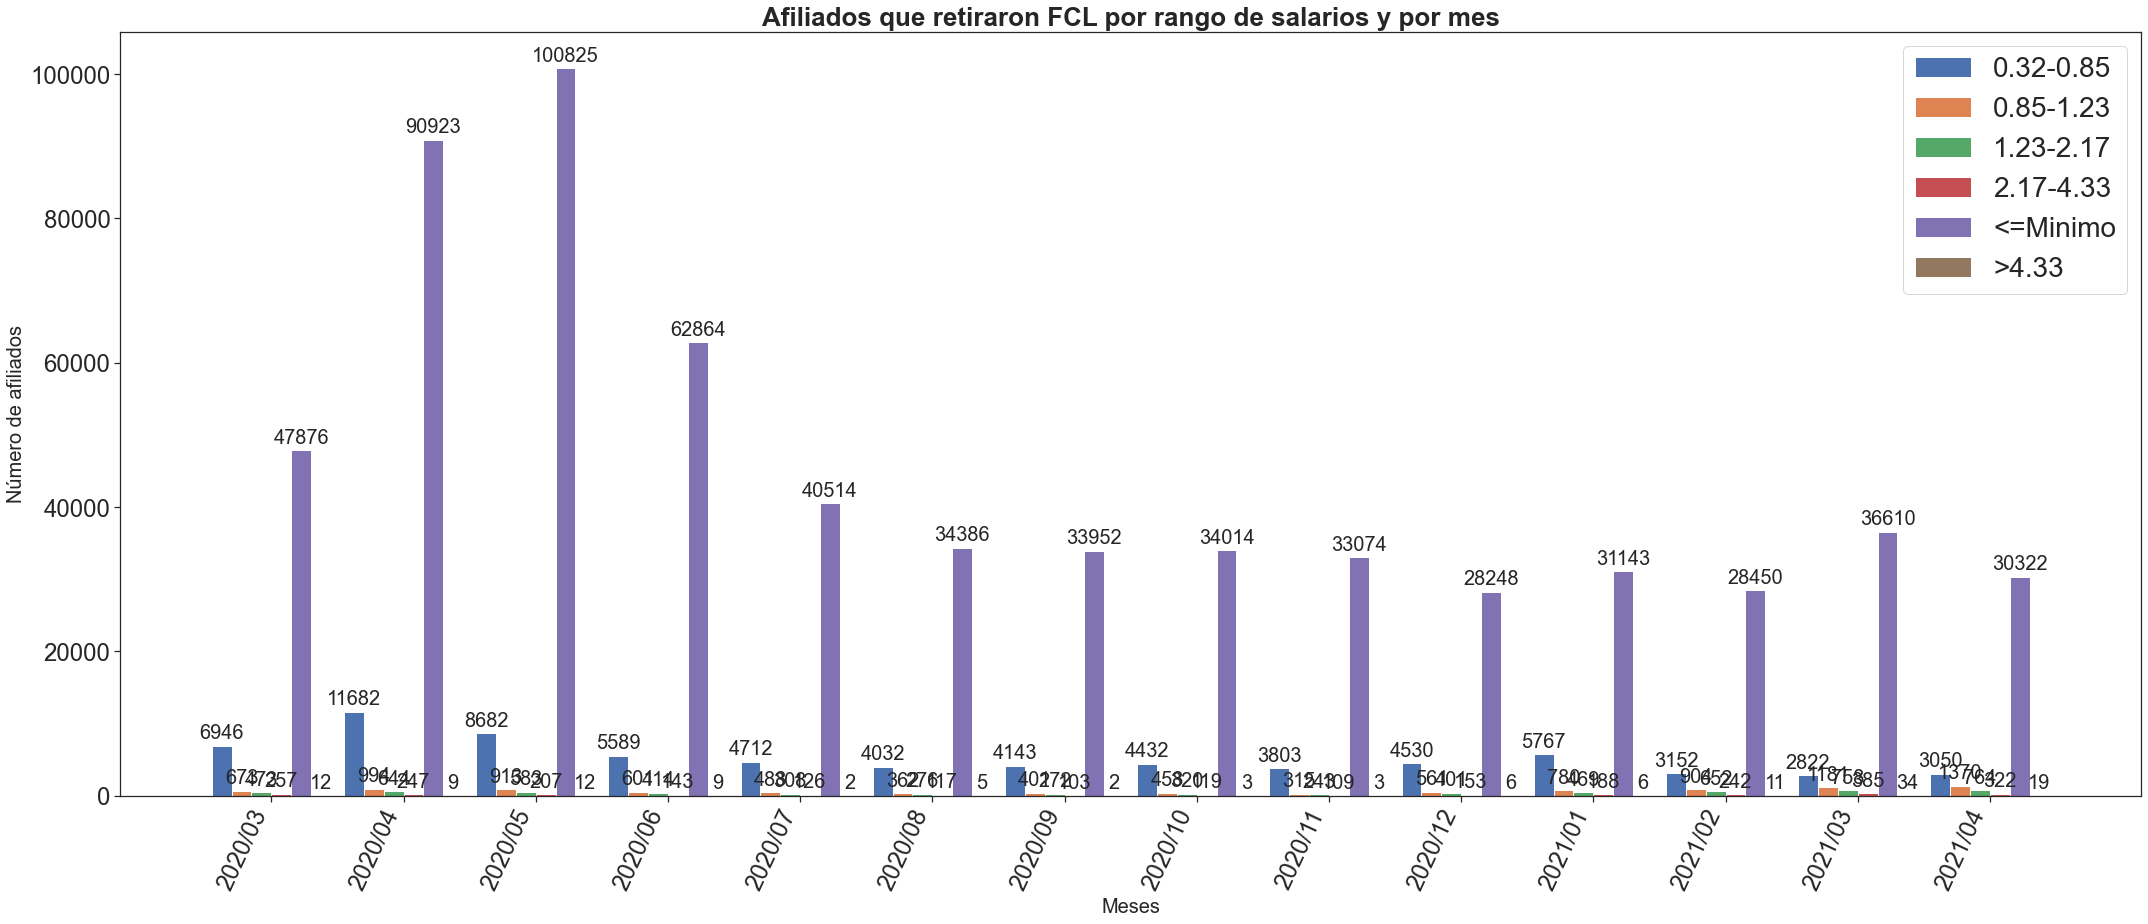

In [42]:
group1 = df_temp.groupby(by = ['Periodo','RangoSalario'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.15

RangoSalarios = list(data1['RangoSalario'].drop_duplicates())
l = len(RangoSalarios)
for i in range(l):
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalarios,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()

#### Analisis entre rango de salario y mes.

Este gráfico muestra como durante todos los meses predominado los salarios inferioresa los 850000, como principales afectados.

In [43]:
PeriodosDistintos = df_temp.drop_duplicates(subset = ["Periodo"])
RangoSalarioDistintos = df_temp.drop_duplicates(subset = ["RangoSalarioRetorno"])

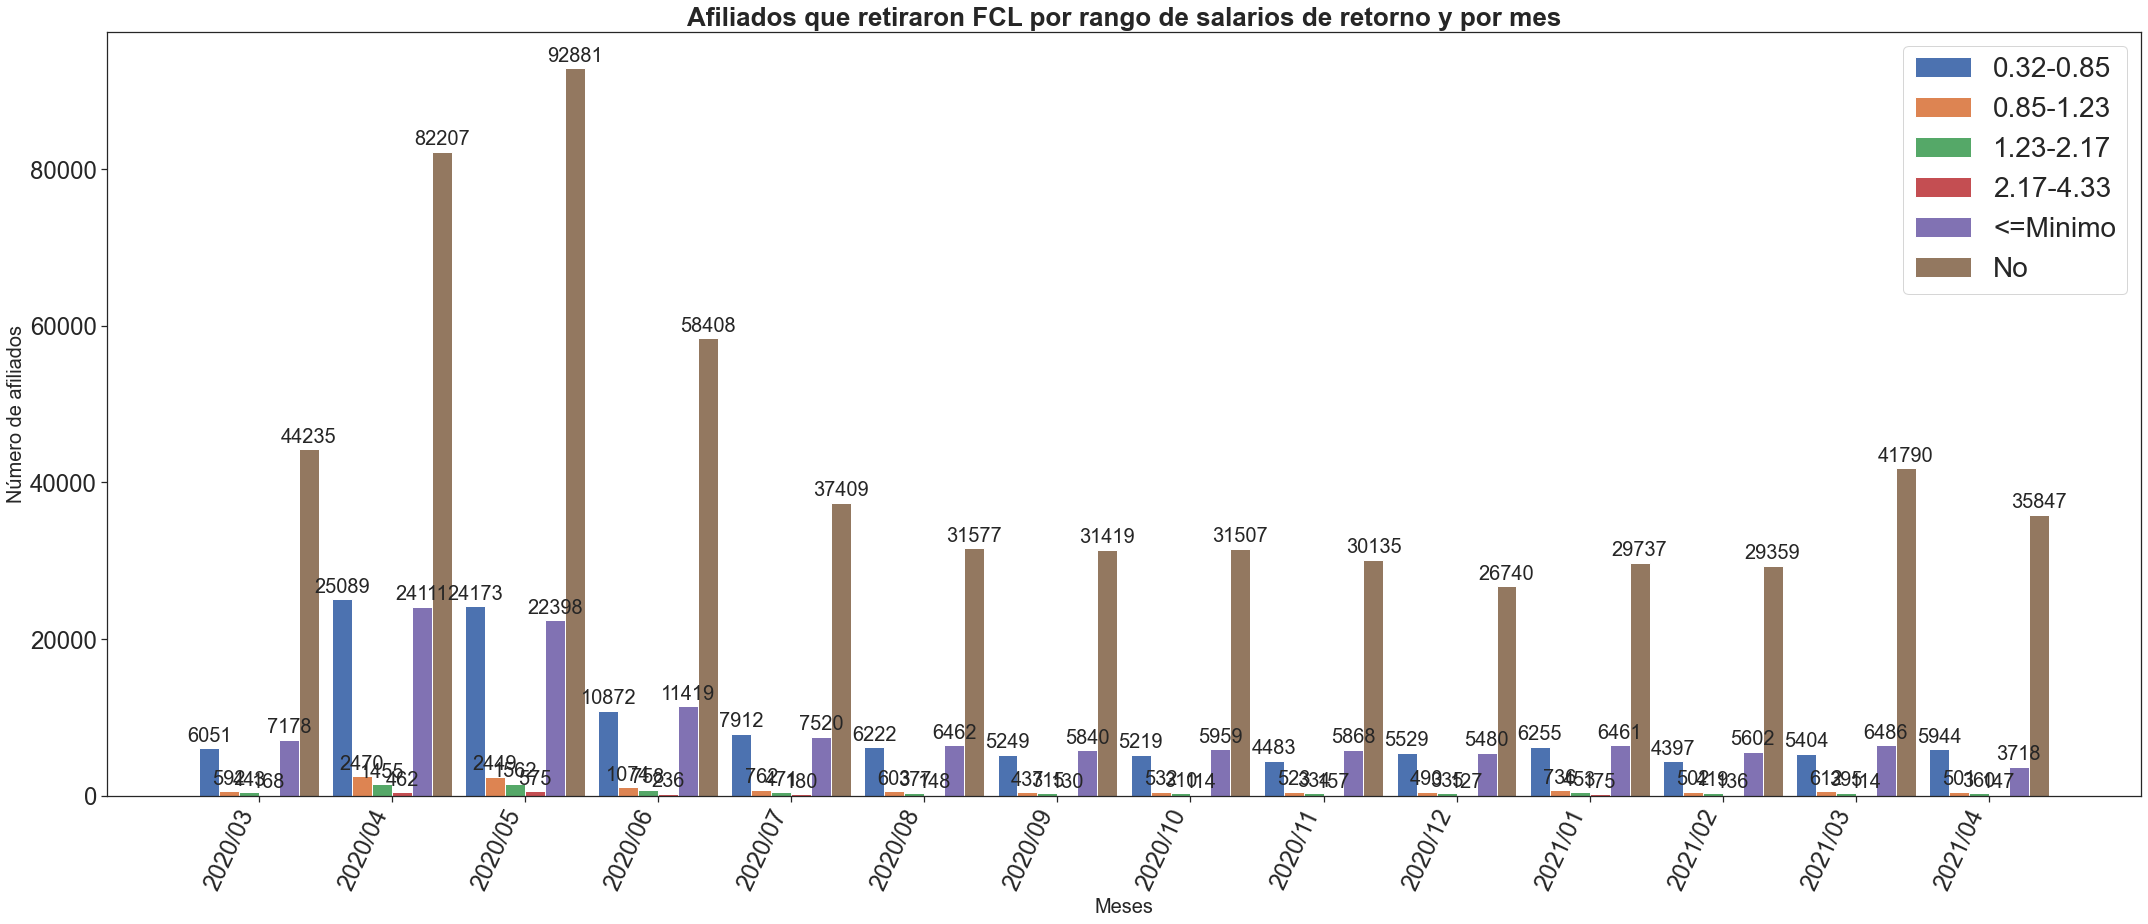

In [44]:
group1 = df_temp.groupby(by = ['Periodo','RangoSalarioRetorno'])['Desempleado']
data1 = group1.agg(['count']).reset_index()
data1.rename(columns={'count' : 'cantidad'},inplace=True)

for per in PeriodosDistintos["Periodo"]:
    for ran in RangoSalarioDistintos["RangoSalarioRetorno"]:
        buscar = data1.loc[(data1['Periodo'] == per) & (data1['RangoSalarioRetorno'] == ran)]
        if buscar.size <= 0:
            print(buscar)
            print("\nNone of thses values exists in Dataframe")
            new_row = {'Periodo':per, 'RangoSalarioRetorno':ran, 'cantidad':0}
            data1 = data1.append(new_row, ignore_index=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())
x = np.arange(len(periodos))
width = 0.15

RangoSalariosRetorno = list(data1['RangoSalarioRetorno'].drop_duplicates())
l = len(RangoSalariosRetorno)
#print(range(l))
for i in range(l):
    #print(i,RangoSalariosRetorno[i])
    #print(data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad)
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios de retorno y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalariosRetorno,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()


## No estoy seguro de interpretarlo bien

In [45]:
# Grafico de cambios salariales.
def Distribucion_Numerica(df_cal1,feature):
    """ Distribution de la variable numerica basado en la fuente"""
    fig = plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    ax = sns.kdeplot(df_cal1[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Distribución original " +feature 
    plt.title(title_str)
    
    plt.subplot(1,2,2)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="Si"),feature]
                     , color = 'r'
                     , shade = True
                     , label='Desempleado', legend = True)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="No"),feature]
                     , color = 'b'
                     , shade = True
                     , label='No', legend = True)
    
    title_str = feature + " Distribución: Desempleado o no"
    plt.title(title_str)
    plt.legend()
    plt.show()

In [46]:
df_temp = df_cal.copy()
#df_temp['Desempleado'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
#df_temp['Periodo'] = pd.to_datetime(df_temp['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#df_temp['Desempleado'] = df_work.Desempleado.map({1:'Si',0:'No'})
df_temp['RangoSalario'] = df_temp.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})

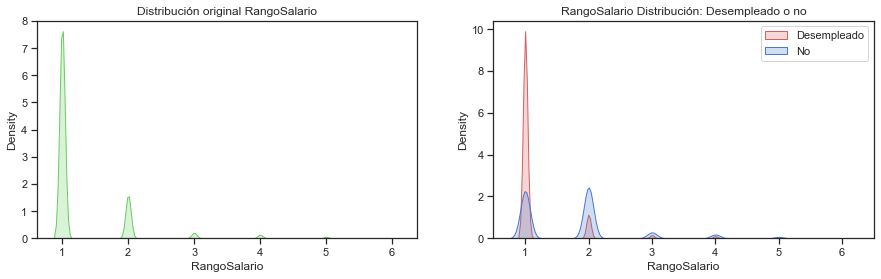

In [47]:
Distribucion_Numerica(df_temp,'RangoSalario')

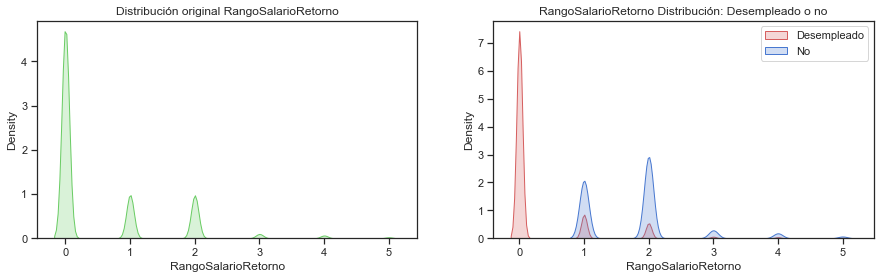

In [48]:
Distribucion_Numerica(df_temp,'RangoSalarioRetorno')

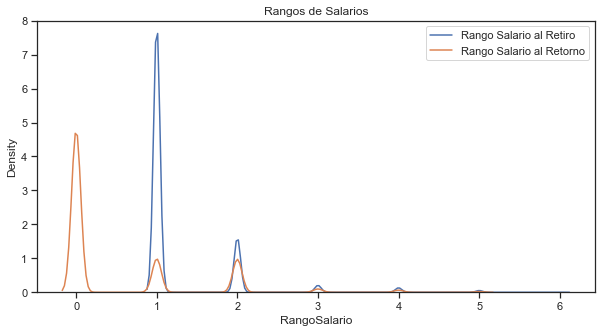

In [49]:
fig, (ax1) = plt.subplots(figsize=(10, 5))

ax1.set_title('Rangos de Salarios')
sns.kdeplot(df_temp['RangoSalario'], ax=ax1, label='Rango Salario al Retiro')
sns.kdeplot(df_temp['RangoSalarioRetorno'], ax=ax1, label='Rango Salario al Retorno')
plt.legend()
plt.show()

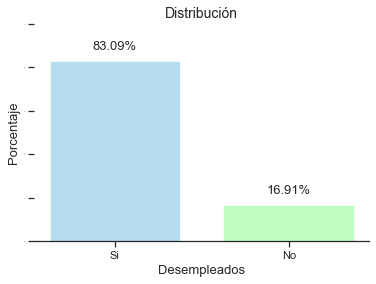

1    0.830925
0    0.169075
Name: Desempleado, dtype: float64


In [50]:
# Balance de la variable de salida
#print(df_raw2.groupby(target_col).size() / len(df_raw2))
#sns.catplot(data=df_raw2,y=target_col, kind = 'count',height=2.6, aspect=1.5)
df_temp['Desempleado'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)

Tasa_Desempleado = df_temp[target_col].value_counts() / df_temp.shape[0]

Generate_bar_graph(Tasa_Desempleado.index.map({0:'No',1:"Si"})
                   , Tasa_Desempleado.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución')

print(Tasa_Desempleado)


### EDA (bivariante)

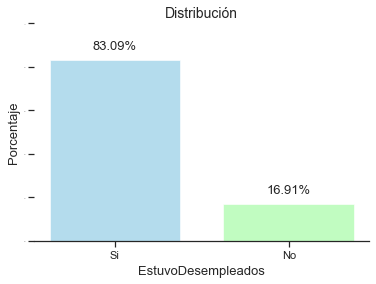

1    0.830925
0    0.169075
Name: Desempleado, dtype: float64


In [51]:
# Balance de la variable de salida
#print(df_raw2.groupby(target_col).size() / len(df_raw2))
#sns.catplot(data=df_raw2,y=target_col, kind = 'count',height=2.6, aspect=1.5)
df_temp['EstuvoDesempleado'] = df_temp['EstuvoDesempleado'].map({'Si': 1,'No': 0}).astype(int)

Tasa_EstuvoDesempleado = df_temp[target_col].value_counts() / df_temp.shape[0]

Generate_bar_graph(Tasa_EstuvoDesempleado.index.map({0:'No',1:"Si"})
                   , Tasa_EstuvoDesempleado.values
                   , 'EstuvoDesempleados'
                   , 'Porcentaje'
                   , 'Distribución')

print(Tasa_EstuvoDesempleado)

In [52]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [53]:
# Cuales pueden influir en el tipo de salario.
# cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]

# Influencia RangoEdad
x = df_temp['RangoEdad']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango de edad en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

# Influencia RangoEdad
x = df_temp['Genero']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del genero en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia EstadoCivil
x = df_temp['EstadoCivil']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del Estado civil en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Pasa a valor de texto
df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})

# Influencia RangoSalario
x = df_temp['RangoSalario']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango salarial en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia RangoSalario
x = df_temp['Sector']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del Sector en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia RangoSalario
x = df_temp['ActiviEconomica']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del ActiviEconomica en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia RangoSalario
x = df_temp['Ubicacion']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la provincia en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia RangoSalario
#x = df_temp['Canton']
#y = df_temp['Desempleado']

#mcDate = multi.MultiComparison (y,x)
#Results = mcDate.tukeyhsd()
#print("Influencia del Canton en el status de desempleado")
#print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

Influencia del rango de edad en el status de desempleado
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
 Entre31y45  Entre45y59   -0.012  0.001 -0.0148 -0.0093   True
 Entre31y45 Entre59y100   0.0202  0.001  0.0143   0.026   True
 Entre31y45     Menor31   0.0134  0.001   0.011  0.0158   True
 Entre45y59 Entre59y100   0.0322  0.001  0.0261  0.0383   True
 Entre45y59     Menor31   0.0254  0.001  0.0225  0.0283   True
Entre59y100     Menor31  -0.0068 0.0171 -0.0127 -0.0009   True
--------------------------------------------------------------
Influencia del genero en el status de desempleado
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     F      M   0.0067 0.001 0.005 0.0084   True
------------------------------------------------
Influencia del 

Influencia de la provincia en el status de desempleado
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2            meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------------------------------
          ALAJUELA_ALAJUELA              ALAJUELA_ATENAS   0.0026    0.9  -0.036  0.0411  False
          ALAJUELA_ALAJUELA              ALAJUELA_GRECIA  -0.0261  0.001 -0.0461  -0.006   True
          ALAJUELA_ALAJUELA             ALAJUELA_GUATUSO   0.0113    0.9 -0.0759  0.0986  False
          ALAJUELA_ALAJUELA          ALAJUELA_LOS CHILES   0.1245  0.001  0.0847  0.1643   True
          ALAJUELA_ALAJUELA             ALAJUELA_NARANJO   0.0017    0.9 -0.0316   0.035  False
          ALAJUELA_ALAJUELA             ALAJUELA_OROTINA    0.023    0.9  -0.023   0.069  False
          ALAJUELA_ALAJUELA            ALAJUELA_PALMARES  -0.0236 0.3621 -0.0514 

Se aprecia que hay varias línea sen true lo que puede implicar alguna correlación entre las variables

### Estadísticas descriptivas

### Distribucion de edad, salario y salario de retorno

In [54]:
df_temp.iloc[:,1:]

Edad    RangoEdad Genero EstadoCivil  HayRetiro TipoRetiro  \
0         68  Entre59y100      F       CASAD          1  Extinción   
1         66  Entre59y100      F        SOLT          1  Extinción   
2         66  Entre59y100      F        SOLT          1  Extinción   
3         66  Entre59y100      F        SOLT          1  Extinción   
4         65  Entre59y100      F       VIUDO          1  Extinción   
...      ...          ...    ...         ...        ...        ...   
873686    52   Entre45y59      F        SOLT          1  Extinción   
873687    52   Entre45y59      F        SOLT          1  Extinción   
873688    41   Entre31y45      F       CASAD          1  Extinción   
873689    37   Entre31y45      F       UNLIB          1  Extinción   
873690    37   Entre31y45      F       UNLIB          1  Extinción   

           Salario RangoSalario  SalarioPromedioRetorno RangoSalarioRetorno  \
0            0.000     <=Minimo                   0.000                  No   
1            0.000     <=Minimo                   0.000                  No   
2            0.000     <=Minimo                   0.000                  No   
3            0.000     <=Minimo                   0.000                  No   
4            0.000     <=Minimo                   0.000                  No   
...            ...          ...                     ...                 ...   
873686  303266.667     <=Minimo              303266.667            <=Minimo   
873687       0.000     <=Minimo                   0.000                  No   
873688  421933.333    0.32-0.85                   0.000                  No   
873689       0.000     <=Minimo                   0.000                  No   
873690  160000.000     <=Minimo                   0.000                  No   

       TuvoReduccion  HayAportes  InactivoPostRetiro  InactivoPostUltAporte  \
0                 No           0                   1                      1   
1                 No           0                   1                      1   
2                 No           0                   1                      1   
3                 No           0                   1                      1   
4                 No           0                   1                      1   
...              ...         ...                 ...                    ...   
873686            No           0                   0                      0   
873687            No           0                   0                      0   
873688            Si           0                   1                      1   
873689            No           0                   0                      0   
873690            Si           0                   0                      0   

        Desempleado  EstuvoDesempleado          Sector  \
0                 1                  1  SECTOR PUBLICO   
1                 1                  1  SECTOR PUBLICO   
2                 1                  1  SECTOR PUBLICO   
3                 1                  1  SECTOR PRIVADO   
4                 1                  1  SECTOR PUBLICO   
...             ...                ...             ...   
873686            0                  0  SECTOR PRIVADO   
873687            1                  0  SECTOR PRIVADO   
873688            1                  1  SECTOR PRIVADO   
873689            1                  0  SECTOR PRIVADO   
873690            1                  0  SECTOR PRIVADO   

                                          ActiviEconomica  Brecha  \
0       ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...       1   
1       ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...       1   
2       ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...       1   
3                       ACTIVIDADES NO BIEN ESPECIFICADAS       1   
4       ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...       1   
...                                                   ...     ...   
873686  ACTIVIDADES INMOBILIARIAS, EMPRESARIALES Y DE ...       0   
873687  COMERCIO AL 

In [55]:
# NO le veo valor agregado
df_temp[monto_cols].describe(include='all')

Salario  SalarioPromedioRetorno           Edad
count  8.736910e+05            8.736910e+05  873691.000000
mean   1.793926e+05            1.326655e+05      37.368058
std    3.493358e+05            2.932843e+05      10.527872
min    0.000000e+00            0.000000e+00      16.000000
25%    0.000000e+00            0.000000e+00      29.000000
50%    0.000000e+00            0.000000e+00      36.000000
75%    2.500000e+05            2.014333e+05      44.000000
max    4.800267e+06            3.829933e+06      98.000000

### Con base en el análisis descriptivo de columnas numéricas, el salario, el salario de retorno y la edad del afiliado el promedio es de 413146 colones, 364986 colones y 37 años, respectivamente

In [56]:
# Mean summary of customers (Churn vs Non churn)
suma_desempleado = df_temp.groupby('Desempleado')
print(suma_desempleado[monto_cols].mean())

                   Salario  SalarioPromedioRetorno       Edad
Desempleado                                                  
0            448703.923187           466718.000745  37.787421
1            124593.771326            64693.301536  37.282727


In [57]:
#df_model['Genero'] = df_model.Genero.map({'F':1,'M':2,'X':0}).astype(int)
#df_model['TipoRetiro'] = df_model.TipoRetiro.map({'Extinción':1,'Suspensión':2,'Reducción':3}).astype(int)
#df_model['EstadoCivil'] = df_model.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 

print(pd.pivot_table(df_temp, index = 'Desempleado', values = ['Edad','HayAportes','Genero','TipoRetiro','EstadoCivil','Salario',\
                                                               'Sector','ActiviEconomica','Ubicacion']))

#df_model['Genero'] = df_model.Genero.map({1:'F',2:'M',0:'X'})
#df_model['TipoRetiro'] = df_model.TipoRetiro.map({1:'Extinción',2:'Suspensión',3:'Reducción'})
#df_model['EstadoCivil'] = df_model.EstadoCivil.map({0:'DESC',1:'SOLT',2:'CASAD',3:'DIVOR',4:'VIUDO',5:'UNLIB',6:'SEPAR'})


print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'Genero', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'EstadoCivil', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'RangoSalario', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'RangoEdad', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'Sector', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'ActiviEconomica', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'Ubicacion', values = 'Edad' ,aggfunc ='count'))
#print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'Canton', values = 'Edad' ,aggfunc ='count'))

                  Edad  HayAportes        Salario
Desempleado                                      
0            37.787421    0.889946  448703.923187
1            37.282727    0.100668  124593.771326
Genero            F       M
Desempleado                
0             49324   98395
1            234784  491188
EstadoCivil   CASAD    DESC  DIVOR    SOLT  UNLIB  VIUDO
Desempleado                                             
0             25013   30134   3601   80605   8100    266
1            105542  162183  17433  400283  39050   1481
RangoSalario  0.32-0.85  0.85-1.23  1.23-2.17  2.17-4.33  <=Minimo  >4.33
Desempleado                                                              
0                 68650       8038       5100       1891     63973     67
1                 73342      10001       6577       2718    633201    133
RangoEdad    Entre31y45  Entre45y59  Entre59y100  Menor31
Desempleado                                              
0                 65217       32719         4411

In [58]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

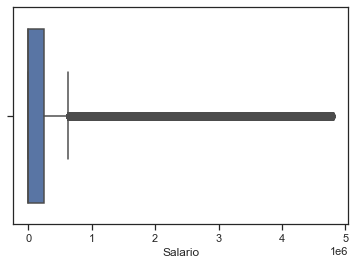

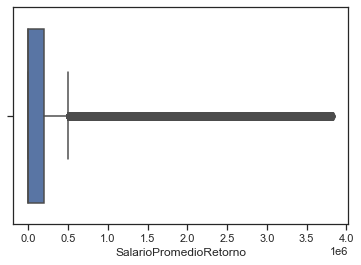

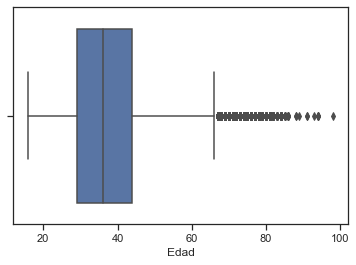

In [59]:
for i in monto_cols:
    Outlier_boxplot(df_temp,i) #df_cal

El resultado muestra que los trabajadores que retiraron el FCL y que quedaron desempleados tenían un salario promedio mensual inferior a los que se quedaron. Y los que regresaron, lo hicieron por salarios similares en promedio.

Con respecto a la edad promedio no hay mucha diferencia

Comprobaremos la distribución de cada característica con la variable de destino.

-------- Salario -----------
Mediana 257933.333
Desv. Stand 425141.5336597454
Varianza 180745323642.56046
Maximo 4800266.666999999
Minimo 5033.333
-------- Salario Retorno-----------
Mediana 333628.571428
Desv. Stand 388536.72433399357
Varianza 150960786156.18973
Maximo 3829933.33325
Minimo 5033.333


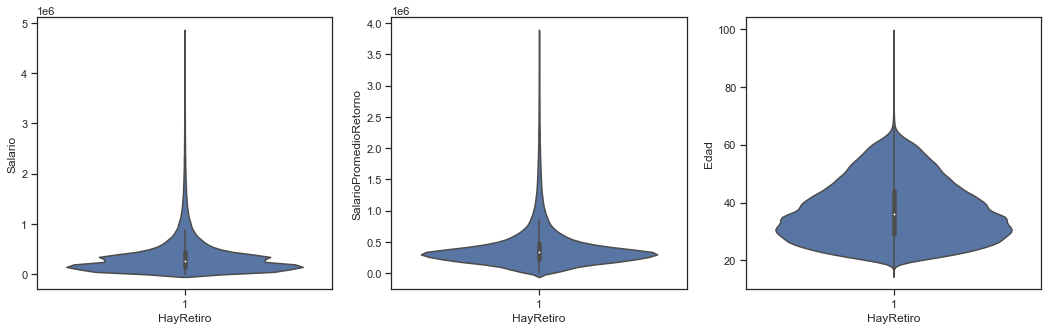

In [60]:
import statistics as st
df_temp_filtered =df_temp.copy() # df_raw1.copy()
fig , ax = plt.subplots(1,3,figsize=(18,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,monto_cols):
    if col == "Salario":
        df_temp_filtered = df_temp.query('Salario>5000') 
        print('-------- Salario -----------')
        print('Mediana',st.median(df_temp_filtered["Salario"]))
        print('Desv. Stand',np.std(df_temp_filtered["Salario"]))
        print('Varianza',np.var(df_temp_filtered["Salario"]))
        print('Maximo',np.max(df_temp_filtered["Salario"]))
        print('Minimo',np.min(df_temp_filtered["Salario"]))
        
    else:
        if col == "SalarioPromedioRetorno":
            df_temp_filtered = df_temp.query('SalarioPromedioRetorno>5000') 
            print('-------- Salario Retorno-----------')
            print('Mediana',st.median(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Desv. Stand',np.std(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Varianza',np.var(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Maximo',np.max(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Minimo',np.min(df_temp_filtered["SalarioPromedioRetorno"]))            
    sns.violinplot(x=df_temp_filtered["HayRetiro"], y=df_temp_filtered[col],ax=axis)
plt.show()

## 3. Analisis de correlación
> Comprobaremos si existe alguna relación entre la edad y el salario recibido.

### Correlacion

In [61]:
def Generar_Mapa_Correlacion(corr, chart_title, mask_uppertri=False ):
    """ Basado en las caracteristicas correlacionaas , genera matrix de correlacion """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
#var_corr = round(df_cal.corr(),2)

In [62]:
df_temp['RangoSalario'] = df_temp.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})

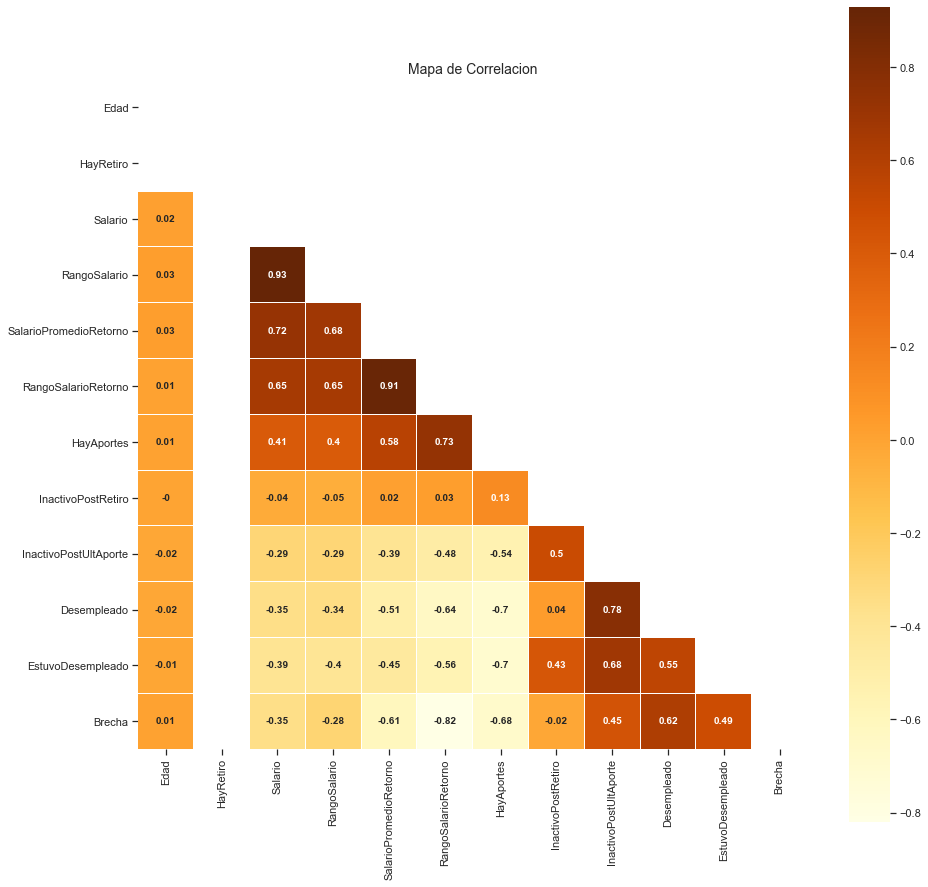

In [63]:
var_corr = round(df_temp.corr(),2)
Generar_Mapa_Correlacion(var_corr
                       ,chart_title = 'Mapa de Correlacion'
                       ,mask_uppertri = True)

De la matriz de correlación, se nota que existe correlación entre algunas variables. Esto se puede deber a que sobre todo los rangos se originaron de otras existentes. Y HayRetiro es una variable que tiene le mismo valor para todos.

Se podia esperar tal y como se aprecia en el gráfico que salario se correlacione con rangosalario, al igual que salario promedioretorno con RangoSalarioretorno.

El gráfico muestra una clara diferencia en los salario entre los generos. Para el mismo salario, las mujeres tienen más probabilidades de tener un salario de retorno bajo o cero que los hombres. 

## 3. Analisis de Clusters

Comprobaremos si existe alguna relación entre la edad y el salario recibido.

In [64]:
df_temp.head().T

0  \
Periodo                                                           2020/08   
Edad                                                                   68   
RangoEdad                                                     Entre59y100   
Genero                                                                  F   
EstadoCivil                                                         CASAD   
HayRetiro                                                               1   
TipoRetiro                                                      Extinción   
Salario                                                                 0   
RangoSalario                                                            1   
SalarioPromedioRetorno                                                  0   
RangoSalarioRetorno                                                     0   
TuvoReduccion                                                          No   
HayAportes                                                              0   
InactivoPostRetiro                                                      1   
InactivoPostUltAporte                                                   1   
Desempleado                                                             1   
EstuvoDesempleado                                                       1   
Sector                                                     SECTOR PUBLICO   
ActiviEconomica         ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
Brecha                                                                  1   
Ubicacion                                               SAN JOSE_SAN JOSÉ   

                                                                        1  \
Periodo                                                           2020/11   
Edad                                                                   66   
RangoEdad                                                     Entre59y100   
Genero                                                                  F   
EstadoCivil                                                          SOLT   
HayRetiro                                                               1   
TipoRetiro                                                      Extinción   
Salario                                                                 0   
RangoSalario                                                            1   
SalarioPromedioRetorno                                                  0   
RangoSalarioRetorno                                                     0   
TuvoReduccion                                                          No   
HayAportes                                                              0   
InactivoPostRetiro                                                      1   
InactivoPostUltAporte                                                   1   
Desempleado                                                             1   
EstuvoDesempleado                                                       1   
Sector                                                     SECTOR PUBLICO   
ActiviEconomica         ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
Brecha                                                                  1   
Ubicacion                                               SAN JOSE_SAN JOSÉ   

                                                                        2  \
Periodo                                                           2020/11   
Edad                                                                   66   
RangoEdad                                                     Entre59y100   
Genero                                                                  F   
EstadoCivil                                                          SOLT   
HayRetiro                                                               1   
TipoRetiro                                                      Extinción   
Salario                                                           

In [65]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [66]:
df_temp['Desempleado'] = df_temp['Desempleado'].map({1:'Si',0:'No'})
df_temp['edad_norm'] = Normalize_feature(df_temp[['Edad']])
df_temp['salario_norm'] = Normalize_feature(df_temp[['Salario']])
df_temp['SalarioPromedioRetorno_norm'] = Normalize_feature(df_temp[['SalarioPromedioRetorno']])
df_temp['Desempleado_code'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})


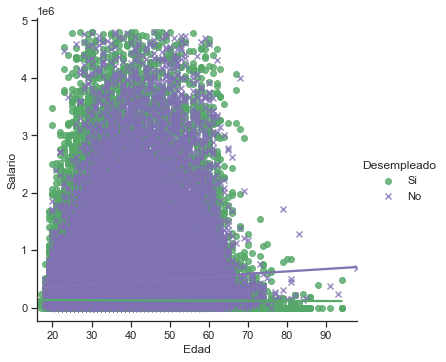

In [67]:
sns.lmplot(x='Edad'
           ,y='Salario'
           ,data=df_temp
           ,hue='Desempleado'
            #,fit_reg=False
            ,markers=["o", "x"], palette=dict(Si="g", No="m"))
plt.show()

** A partir del análisis, hay algunos grupos basados en la edad y el salario anterior. ** 

Aplicaremos el algoritmo de clúster de K-means para ver los clústeres. Antes de pasar datos al algoritmo K-means, es necesario normalizar las variables

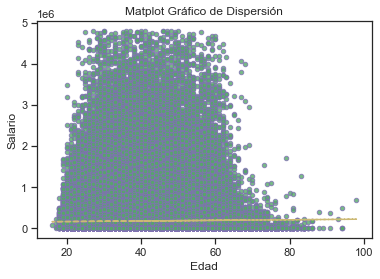

In [68]:
plt.scatter(df_temp.Edad, df_temp.Salario, alpha=0.8, c="g", edgecolors='m', s=20)

# calcula la linea de tendencia
z = np.polyfit(df_temp.Edad, df_temp.Salario,  1)
p = np.poly1d(z)
plt.plot(df_temp.Edad,p(df_temp.Edad),"y--")

plt.title('Matplot Gráfico de Dispersión')
plt.ylabel('Salario')
plt.xlabel('Edad')
plt.show()

In [69]:
def Crea_curva_elbow(data):
    """ Despliega curva elbow de K-means para la información data """
    from sklearn.cluster import KMeans
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(8,5))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Puntaje")
    plt.title("Curva Elbow",fontsize=15)
    plt.show()    

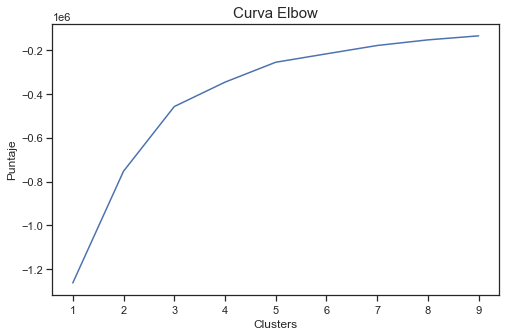

In [70]:
# checking number of clusters

Crea_curva_elbow(df_temp[df_temp.Desempleado_code==1][['salario_norm','edad_norm']])

> * De la curva elbow, 3 parece más ser el número más eficiente.

In [71]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Desempleado_code==1][[x_title+'_norm', y_title +'_norm']])    

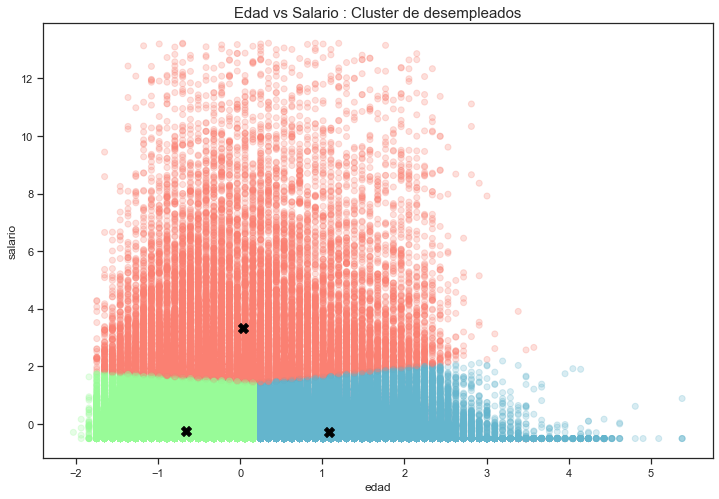

array([ 0,  2, -1,  1], dtype=int64)

In [72]:
df_temp['Cluster'] = -1 # by default set Cluster to -1
df_temp.loc[(df_temp.Desempleado_code==1),'Cluster'] = Create_kmeans_cluster_graph(df_temp
                            ,df_temp[df_temp.Desempleado_code==1][['edad_norm','salario_norm']]
                            ,3  ## Clusters
                           ,'edad'
                           ,'salario'
                           ,"Edad vs Salario : Cluster de desempleados")

df_temp['Cluster'].unique()

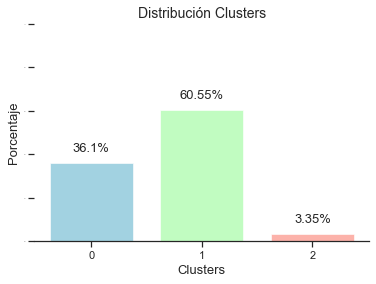

In [73]:
# Distribution of clusters
Desempleado_distribucion =  df_temp[df_temp['Desempleado_code']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= Desempleado_distribucion.index
                   , y = Desempleado_distribucion.values
                   , x_title = 'Clusters'
                   , y_title = 'Porcentaje'
                   , chart_title = 'Distribución Clusters'
                  , color = plotColor)

Con base en el gráfico de clusters de K-medias, podemos ver que hay tres grupos y dos con poco aporte. 

> * Edades altas y salarios altos (grupo verde) 
> * Edades intermedias y salarios bajos (grupo celeste) 
> * Baja edad y bajos ingresos (grupo turquesa) 
> * Edades laborales e ingresos intermedios (grupo lila)
> * Rango de edad amplio e ngresos altos (grupo rojo)

Y el gráfico de distribución muestra que alrededor del 70% de los desempleados pertenecen a los clúster celeste y turquesa, que destacan por sus bajos ingresos.

Con 3 cluster el analisis salió muy parecido.

> * Edades de jovenes a intermedias y salarios bajos a intermedios (grupo verde) 
> * Edades intermedias a mayores y salarios bajos a intermedios (grupo celeste) 
> * Rango de edad amplio e ingresos intermedios a altos (grupo rojo)

Y el gráfico de distribución muestra que más de 96% de los funcionarios que retiraron el FCL pertenecen a los clúster celeste y verde, que destacan por sus bajos ingresos.

Revisemos los promedios de edades y salarios por cluster.

In [74]:
df_cluster_gp = df_temp[df_temp['Desempleado_code']==1].groupby('Cluster')
print(df_cluster_gp[['Edad','Salario']].mean())

              Edad       Salario
Cluster                         
0        48.744414  7.608487e+04
1        30.424418  8.596358e+04
2        37.718605  1.344374e+06


Basándome en información demográfica y otra relacionada con el desempleado, se ha intentado explorar las características de los trabajadores que desemplearon de cada grupo.

In [75]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, edad_salario_cluster_df ):
    """ Para cada característica, compare el valor del clúster con el valor general 
        y descubra las características distribuidas más altas para ese clúster  """
    
    #print(feature)
    df = df_cal.copy()
    feature_churn_dist = df[(df['Desempleado_code']==1)][feature].value_counts(normalize=True).reset_index()
    #print(feature_churn_dist)
    feature_churn_dist.columns = [feature,'Porcentaje']
      
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Porcentaje']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    edad_salario_df = df_cal[df_cal['Desempleado_code']==1].groupby(['Cluster',feature],as_index=False)[['Edad','Salario']].mean()
    #print(edad_salario_df)
    
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Porcentaje']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Porcentaje']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    edad_salario_cluster_df = edad_salario_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("No tiene "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Tiene "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Porcentaje': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_edad':    round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Edad'].values[0],2)
                            , 'Avg_salario': round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Salario'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(edad_salario_cluster_df)])
                        )
    
    return edad_salario_cluster_df  

In [76]:
df_temp.columns

Index(['Periodo', 'Edad', 'RangoEdad', 'Genero', 'EstadoCivil', 'HayRetiro',
       'TipoRetiro', 'Salario', 'RangoSalario', 'SalarioPromedioRetorno',
       'RangoSalarioRetorno', 'TuvoReduccion', 'HayAportes',
       'InactivoPostRetiro', 'InactivoPostUltAporte', 'Desempleado',
       'EstuvoDesempleado', 'Sector', 'ActiviEconomica', 'Brecha', 'Ubicacion',
       'edad_norm', 'salario_norm', 'SalarioPromedioRetorno_norm',
       'Desempleado_code', 'Cluster'],
      dtype='object')

In [77]:
edad_salario_cluster_df = pd.DataFrame()
#binary_cols = ["Pensionado","TuvoReduccion"] "HayAportes","Diferenciabrechas","InactivoPostRetiro","InactivoPostUltAporte"
#,'HayAportes','InactivoPostRetiro', 'InactivoPostUltAporte', 'Brecha'
for feature in ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TuvoReduccion","TipoRetiro",'HayAportes',
                'InactivoPostRetiro', 'InactivoPostUltAporte', 'Brecha','Sector', 'ActiviEconomica', 'Ubicacion']:
    edad_salario_cluster_df = Extract_highest_in_cluster(df_temp, df_cluster_gp, feature,edad_salario_cluster_df)

#### Cluster 0 - Mayores de 45 años y salario menor a 1200000, sin salario retorno, y que tuvieron reducción-

In [78]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==0].head(60)

Category                                              Label  \
0                RangoEdad                                         Entre45y59   
1                RangoEdad                                        Entre59y100   
5                   Genero                                                  M   
8              EstadoCivil                                              CASAD   
9              EstadoCivil                                              UNLIB   
10             EstadoCivil                                              DIVOR   
11             EstadoCivil                                              VIUDO   
17            RangoSalario                                           <=Minimo   
24     RangoSalarioRetorno                                                 No   
31           TuvoReduccion                                                 No   
34              TipoRetiro                                          Reducción   
35              TipoRetiro                                         Suspensión   
39              HayAportes                                                  0   
42      InactivoPostRetiro                                                  1   
45   InactivoPostUltAporte                                                  1   
48                  Brecha                                                  1   
51                  Sector                                      NO ENCONTRADO   
52                  Sector                                     SECTOR PUBLICO   
56         ActiviEconomica                                      NO ENCONTRADA   
57         ActiviEconomica  AGRICULTURA, GANADERIA, SILVICUTURA, PESCA, EX...   
58         ActiviEconomica                                       CONSTRUCCION   
59         ActiviEconomica        TRANSPORTE, ALMACENAMIENTO Y COMUNICACIONES   
60         ActiviEconomica  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
61         ActiviEconomica                                         ENSEÑANZA   
62         ActiviEconomica                  ACTIVIDADES NO BIEN ESPECIFICADAS   
63         ActiviEconomica            HOGARES PRIVADOS CON SERVICIO DOMESTICO   
64         ActiviEconomica            SUMINISTROS DE ELECTRICIDAD, GAS Y AGUA   
84               Ubicacion                            NO DEFINIDA_NO DEFINIDO   
85               Ubicacion                                    CARTAGO_CARTAGO   
86               Ubicacion                                       LIMÓN_POCOCÍ   
87               Ubicacion                                       LIMÓN_MATINA   
88               Ubicacion                                    LIMÓN_SIQUIRRES   
89               Ubicacion                              SAN JOSE_DESAMPARADOS   
90               Ubicacion                                        LIMÓN_LIMÓN   
91               Ubicacion                                    ALAJUELA_GRECIA   
92               Ubicacion                       SAN JOSE_VÁZQUEZ DE CORONADO   
93               Ubicacion                                      LIMÓN_GUÁCIMO   
94               Ubicacion                                  CARTAGO_EL GUARCO   
95               Ubicacion                                  CARTAGO_TURRIALBA   
96               Ubicacion                                   ALAJUELA_NARANJO   
97               Ubicacion                                      HEREDIA_BARVA   
98               Ubicacion                                      ALAJUELA_POÁS   
99               Ubicacion                                 PUNTARENAS_PARRITA   
100              Ubicacion                                  HEREDIA_SAN PABLO   
101              Ubicacion                                    ALAJUELA_ATENAS   
102              Ubicacion                                 PUNTARENAS_ESPARZA   
103              Ubicacion                                   CARTAGO_OREAMUNO   
104              Ubicacion                              HEREDIA_SANTA BÁRBARA   
105              Ubicacion                       

### Cluster 1 - Rango edad menores 45 años y con salarios menores a 850 mil. Mujeres solteras.

In [79]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==1].head(60)

Category                                              Label  \
2                RangoEdad                                         Entre31y45   
3                RangoEdad                                            Menor31   
6                   Genero                                                  F   
12             EstadoCivil                                               SOLT   
13             EstadoCivil                                               DESC   
18            RangoSalario                                           <=Minimo   
25     RangoSalarioRetorno                                                 No   
26     RangoSalarioRetorno                                           <=Minimo   
32           TuvoReduccion                                                 Si   
36              TipoRetiro                                          Extinción   
40              HayAportes                                                  0   
43      InactivoPostRetiro                                                  1   
46   InactivoPostUltAporte                                                  1   
49                  Brecha                                                  1   
53                  Sector                                     SECTOR PRIVADO   
65         ActiviEconomica  ACTIVIDADES INMOBILIARIAS, EMPRESARIALES Y DE ...   
66         ActiviEconomica  COMERCIO AL POR MAYOR Y AL POR MENOR, REPARACI...   
67         ActiviEconomica                          INDUSTRIAS MANUFACTURERAS   
68         ActiviEconomica                             HOTELES Y RESTAURANTES   
69         ActiviEconomica  OTRAS ACTIVIDADES DE SERVICIOS COMUNITARIOS, S...   
70         ActiviEconomica                          INTERMEDIACION FINANCIERA   
71         ActiviEconomica                         SERVICIO SOCIAL Y DE SALUD   
124              Ubicacion                                  SAN JOSE_SAN JOSÉ   
125              Ubicacion                                  ALAJUELA_ALAJUELA   
126              Ubicacion                                    HEREDIA_HEREDIA   
127              Ubicacion                                 SAN JOSE_SANTA ANA   
128              Ubicacion                                    SAN JOSE_ESCAZÚ   
129              Ubicacion                             SAN JOSE_MONTES DE OCA   
130              Ubicacion                                ALAJUELA_SAN CARLOS   
131              Ubicacion                                SAN JOSE_CURRIDABAT   
132              Ubicacion                                      HEREDIA_BELÉN   
133              Ubicacion                                       LIMÓN_POCOCÍ   
134              Ubicacion                              HEREDIA_SANTO DOMINGO   
135              Ubicacion                              PUNTARENAS_PUNTARENAS   
136              Ubicacion                                   CARTAGO_LA UNIÓN   
137              Ubicacion                                 GUANACASTE_LIBERIA   
138              Ubicacion                              GUANACASTE_SANTA CRUZ   
139              Ubicacion                             SAN JOSE_PÉREZ ZELEDÓN   
140              Ubicacion                                 ALAJUELA_SAN RAMÓN   
141              Ubicacion                                GUANACASTE_CARRILLO   
142              Ubicacion                                  HEREDIA_SARAPIQUÍ   
143              Ubicacion                                   SAN JOSE_MORAVIA   
144              Ubicacion                                  PUNTARENAS_QUEPOS   
145              Ubicacion                                PUNTARENAS_GARABITO   
146              Ubicacion                                    CARTAGO_PARAÍSO   
147              Ubicacion                                   GUANACASTE_CAÑAS   
148              Ubicacion                                  ALAJUELA_PALMARES   
149              Ubicacion                                  GUANACASTE_NICOYA   
150              Ubicacion                       

#### Cluster 2 - mayores a 45 años, hombres con salarios mayores a 4.3. 

In [80]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==2].head(60)

Category                                              Label  \
4                RangoEdad                                         Entre31y45   
7                   Genero                                                  F   
14             EstadoCivil                                               SOLT   
15             EstadoCivil                                              CASAD   
16             EstadoCivil                                              DIVOR   
19            RangoSalario                                          0.32-0.85   
20            RangoSalario                                          0.85-1.23   
21            RangoSalario                                          1.23-2.17   
22            RangoSalario                                          2.17-4.33   
23            RangoSalario                                              >4.33   
27     RangoSalarioRetorno                                          0.32-0.85   
28     RangoSalarioRetorno                                          0.85-1.23   
29     RangoSalarioRetorno                                          1.23-2.17   
30     RangoSalarioRetorno                                          2.17-4.33   
33           TuvoReduccion                                                 Si   
37              TipoRetiro                                          Reducción   
38              TipoRetiro                                         Suspensión   
41              HayAportes                                                  1   
44      InactivoPostRetiro                                                  0   
47   InactivoPostUltAporte                                                  0   
50                  Brecha                                                  0   
54                  Sector                                     SECTOR PRIVADO   
55                  Sector                                     SECTOR PUBLICO   
72         ActiviEconomica  ACTIVIDADES INMOBILIARIAS, EMPRESARIALES Y DE ...   
73         ActiviEconomica  COMERCIO AL POR MAYOR Y AL POR MENOR, REPARACI...   
74         ActiviEconomica                          INDUSTRIAS MANUFACTURERAS   
75         ActiviEconomica  OTRAS ACTIVIDADES DE SERVICIOS COMUNITARIOS, S...   
76         ActiviEconomica        TRANSPORTE, ALMACENAMIENTO Y COMUNICACIONES   
77         ActiviEconomica  ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
78         ActiviEconomica                                         ENSEÑANZA   
79         ActiviEconomica                          INTERMEDIACION FINANCIERA   
80         ActiviEconomica                         SERVICIO SOCIAL Y DE SALUD   
81         ActiviEconomica                  ACTIVIDADES NO BIEN ESPECIFICADAS   
82         ActiviEconomica            SUMINISTROS DE ELECTRICIDAD, GAS Y AGUA   
83         ActiviEconomica        ORGANIZACIONES Y ORGANOS EXTRATERRITORIALES   
172              Ubicacion                                  SAN JOSE_SAN JOSÉ   
173              Ubicacion                                  ALAJUELA_ALAJUELA   
174              Ubicacion                                    HEREDIA_HEREDIA   
175              Ubicacion                                 SAN JOSE_SANTA ANA   
176              Ubicacion                                    SAN JOSE_ESCAZÚ   
177              Ubicacion                             SAN JOSE_MONTES DE OCA   
178              Ubicacion                                SAN JOSE_GOICOECHEA   
179              Ubicacion                                SAN JOSE_CURRIDABAT   
180              Ubicacion                                      HEREDIA_BELÉN   
181              Ubicacion                                       LIMÓN_MATINA   
182              Ubicacion                                     SAN JOSE_TIBÁS   
183              Ubicacion                                   CARTAGO_LA UNIÓN   
184              Ubicacion                                     HEREDIA_FLORES   
185              Ubicacion                       

In [81]:
#### Cluster 4 - Edad entre 38 y 50 años y salarios entre 3.5 y 5.5 millones

In [82]:
#edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==3] Analisis para 5 clusters

In [83]:
#### Cluster 5 - Edad entre 38 y 41años y salarios entre 280000 y 500000 mil

In [84]:
# edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==4] Analisis para 5 clusters

### Representación gráfica de clústeres

In [85]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    #print(data)
    #print([plotColor[c] for c in data.Cluster])
    #df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
           
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_edad'][i]
                                , cluster_visualize_gp['Avg_salario'][i]
                                , txt))
                                #, fontsize = 13
                                #, weight="bold"))
        #print(annotations)

        ax.scatter(x=cluster_visualize_gp['Avg_edad'][i]
            , y=cluster_visualize_gp['Avg_salario'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))
    
    adjust_text(annotations, arrowprops={"arrowstyle": "-", "color": "black", "ls": "dashed", "alpha": 1.9},
               force_text=(2, 2),autoalign='y')
                #,x=cluster_visualize_gp['Avg_edad']
                #,y=cluster_visualize_gp['Avg_salario'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()           

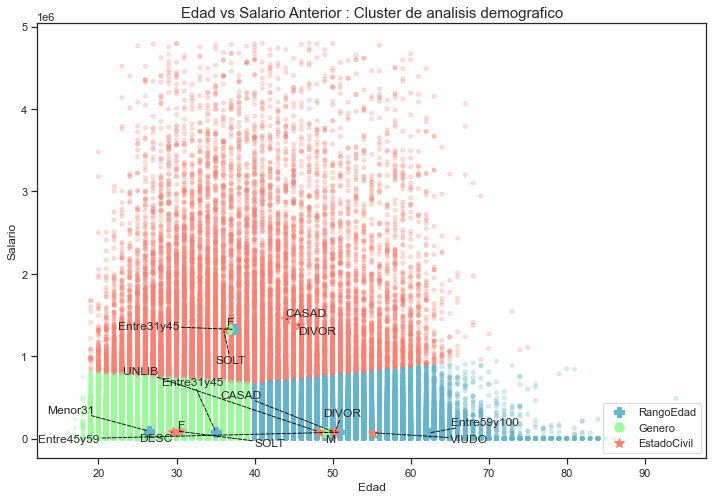

In [86]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Genero')
                            | (edad_salario_cluster_df['Category'] == 'RangoEdad')
                            | (edad_salario_cluster_df['Category'] == 'EstadoCivil'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis demografico")

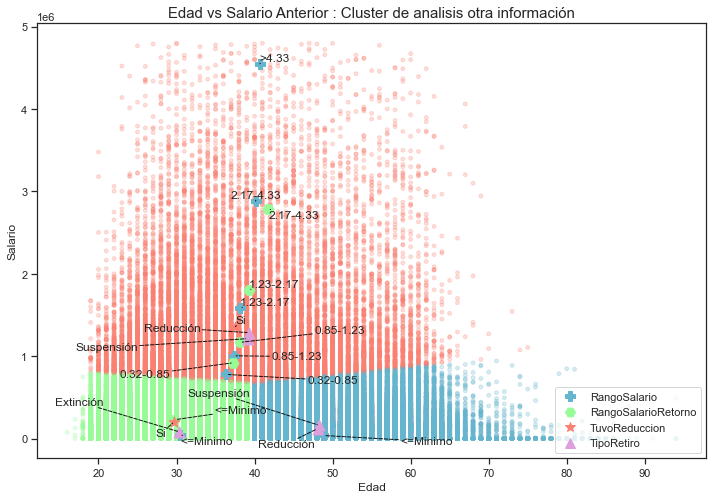

In [87]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'TuvoReduccion')
                           | (edad_salario_cluster_df['Category'] == 'RangoSalarioRetorno')
                           | (edad_salario_cluster_df['Category'] == 'TipoRetiro')                          
                            | (edad_salario_cluster_df['Category'] == 'RangoSalario'))]
                           #| (edad_salario_cluster_df['Category'] == 'InactivoPostRetiro'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis otra información")

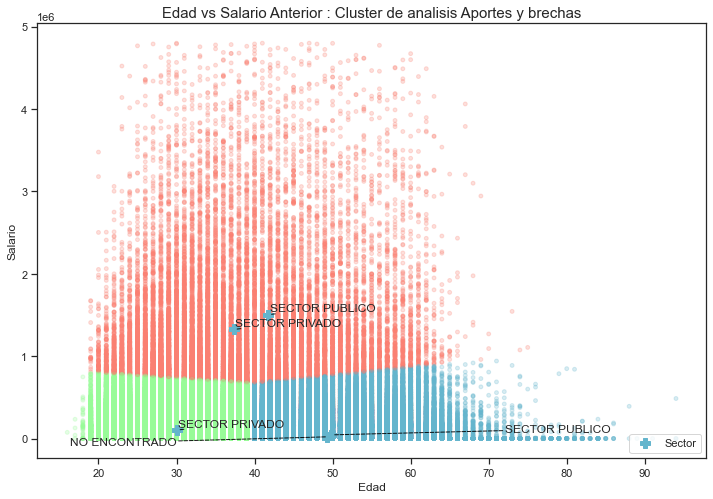

In [88]:

cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Sector'))]
                            ##| (edad_salario_cluster_df['Category'] == 'ActiviEconomica'))]
                           ## | (edad_salario_cluster_df['Category'] == 'Ubicacion'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis Aportes y brechas")


In [89]:
#df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_clu = df_temp.copy()
# Se elimina porque estan normalizadas.
""" Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """    
    
df_clu['RangoSalario'] = df_clu.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_clu['RangoSalarioRetorno'] = df_clu.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_clu['RangoEdad'] = df_clu.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'Entre59y100':4,'Mayor100':5}).astype(int)
df_clu['Genero'] = df_clu.Genero.map({'F':1,'M':2,'X':0}).astype(int)
df_clu['TipoRetiro'] = df_clu.TipoRetiro.map({'Extinción':1,'Suspensión':2,'Reducción':3}).astype(int)
df_clu['EstadoCivil'] = df_clu.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 
df_clu['TuvoReduccion'] = df_clu.TuvoReduccion.map({'No':0,'Si':1}).astype(int)
df_clu['Desempleado'] = df_clu['Desempleado_code'].astype(int)
#df_clu['InactivoPostRetiro'] = Normalize_feature(df_clu[['InactivoPostRetiro']])
#df_clu['InactivoPostUltAporte'] = Normalize_feature(df_clu[['InactivoPostUltAporte']])
#df_clu['HayAportes'] = Normalize_feature(df_clu[['HayAportes']])
# Codificar las variables
    
#df_clu = df_clu.drop(columns=['RangoSalario','RangoSalarioRetorno','RangoEdad'])
df_clu = df_clu.drop(columns=['Cluster','Desempleado_code','Periodo','HayRetiro'])
df_clu = df_clu.drop(columns=['SalarioPromedioRetorno_norm','edad_norm', 'salario_norm','EstuvoDesempleado'])
#df_clu = df_clu.drop(columns=['SalarioPromedioRetorno','Edad', 'Salario'])
#df_clu = df_clu.drop(columns=['TuvoReduccion','Brecha'])

In [90]:
df_clu.head().T

0  \
Edad                                                                   68   
RangoEdad                                                               4   
Genero                                                                  1   
EstadoCivil                                                             2   
TipoRetiro                                                              1   
Salario                                                                 0   
RangoSalario                                                            1   
SalarioPromedioRetorno                                                  0   
RangoSalarioRetorno                                                     0   
TuvoReduccion                                                           0   
HayAportes                                                              0   
InactivoPostRetiro                                                      1   
InactivoPostUltAporte                                                   1   
Desempleado                                                             1   
Sector                                                     SECTOR PUBLICO   
ActiviEconomica         ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
Brecha                                                                  1   
Ubicacion                                               SAN JOSE_SAN JOSÉ   

                                                                        1  \
Edad                                                                   66   
RangoEdad                                                               4   
Genero                                                                  1   
EstadoCivil                                                             1   
TipoRetiro                                                              1   
Salario                                                                 0   
RangoSalario                                                            1   
SalarioPromedioRetorno                                                  0   
RangoSalarioRetorno                                                     0   
TuvoReduccion                                                           0   
HayAportes                                                              0   
InactivoPostRetiro                                                      1   
InactivoPostUltAporte                                                   1   
Desempleado                                                             1   
Sector                                                     SECTOR PUBLICO   
ActiviEconomica         ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
Brecha                                                                  1   
Ubicacion                                               SAN JOSE_SAN JOSÉ   

                                                                        2  \
Edad                                                                   66   
RangoEdad                                                               4   
Genero                                                                  1   
EstadoCivil                                                             1   
TipoRetiro                                                              1   
Salario                                                                 0   
RangoSalario                                                            1   
SalarioPromedioRetorno                                                  0   
RangoSalarioRetorno                                                     0   
TuvoReduccion                                                           0   
HayAportes                                                              0   
InactivoPostRetiro                                                      1   
InactivoPostUltAporte                                                   1   
Desempleado                                                       

In [91]:
# Obtener las correlaciones de las variables con "Churn" con las actuales
df_clu.corr()['Desempleado'].sort_values(ascending = False)

Desempleado               1.000000
InactivoPostUltAporte     0.779956
Brecha                    0.618932
InactivoPostRetiro        0.038153
Genero                    0.008400
EstadoCivil              -0.015583
RangoEdad                -0.017532
Edad                     -0.017968
TuvoReduccion            -0.071536
RangoSalario             -0.337793
Salario                  -0.347752
TipoRetiro               -0.493192
SalarioPromedioRetorno   -0.513789
RangoSalarioRetorno      -0.638026
HayAportes               -0.698641
Name: Desempleado, dtype: float64

In [92]:
correlated_features = set()
df_corr = df_clu
correlation_matrix = df_corr.corr()

In [93]:
# Se obtendran las caracteristicas que tengan un correlación mayor a .7.
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [94]:
correlated_features

{'Brecha',
 'Desempleado',
 'Edad',
 'HayAportes',
 'InactivoPostUltAporte',
 'RangoEdad',
 'RangoSalario',
 'RangoSalarioRetorno',
 'Salario',
 'SalarioPromedioRetorno'}

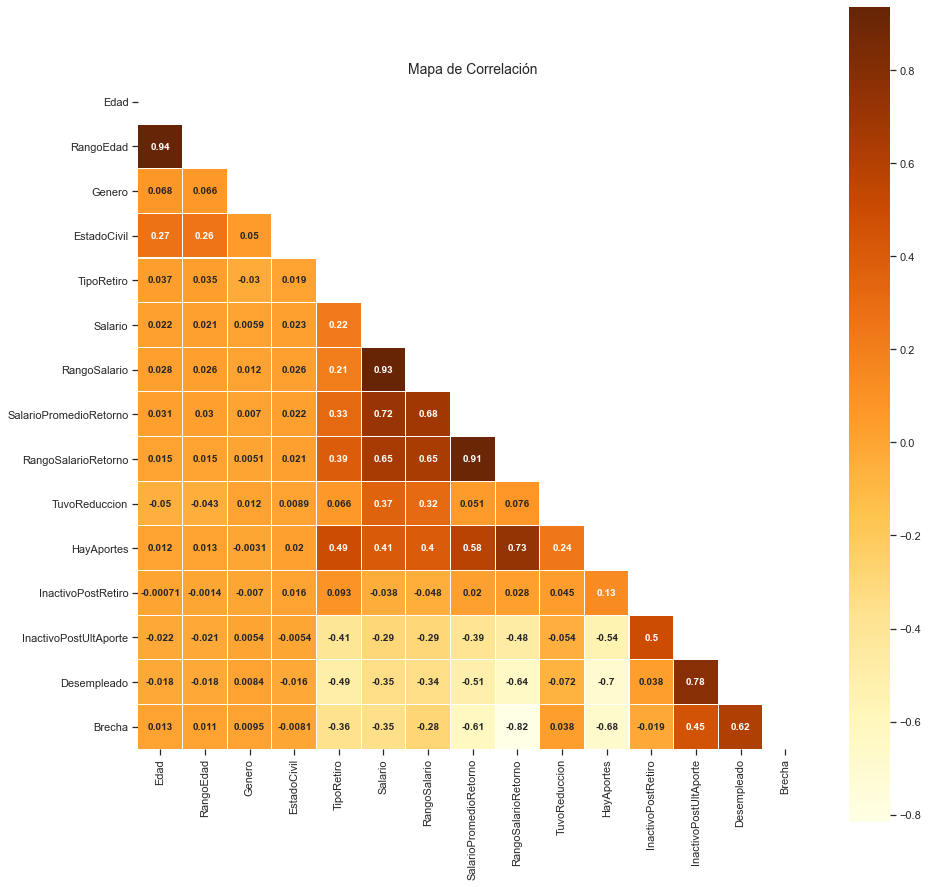

In [95]:
Generar_Mapa_Correlacion(df_clu.corr()
                       ,chart_title = 'Mapa de Correlación'
                       ,mask_uppertri = True)

In [96]:
import scipy.stats as ss
n=6
r=correlation_matrix
t=r*np.sqrt((n-2)/(1-r*r))
p_features = set()  
arr_matrix = ss.t.cdf(t, n-2)
p_matrix = pd.DataFrame(arr_matrix)

In [97]:
for i in range(len(p_matrix.columns)):  
    for j in range(i):
        if abs(p_matrix.iloc[i, j]) <= 0.05:
            colname = p_matrix.columns[i]
            colname2 = p_matrix.columns[j]
            p_features.add(colname)
            p_features.add(colname2)

In [98]:
# Rechazan la hipotesis nula. Se podrían eliminar
p_features

{8, 14}

ejecutaremos el modelo de Regresión Logística “desequilibrado”, para tener un “baseline”, es decir unas métricas contra las cuales podremos comparar y ver si mejoramos

#### Probando el Modelo sin estrategias

In [99]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [100]:
df_temp.head().T

0  \
Periodo                                                                2020/08   
Edad                                                                        68   
RangoEdad                                                          Entre59y100   
Genero                                                                       F   
EstadoCivil                                                              CASAD   
HayRetiro                                                                    1   
TipoRetiro                                                           Extinción   
Salario                                                                      0   
RangoSalario                                                          <=Minimo   
SalarioPromedioRetorno                                                       0   
RangoSalarioRetorno                                                         No   
TuvoReduccion                                                               No   
HayAportes                                                                   0   
InactivoPostRetiro                                                           1   
InactivoPostUltAporte                                                        1   
Desempleado                                                                 Si   
EstuvoDesempleado                                                            1   
Sector                                                          SECTOR PUBLICO   
ActiviEconomica              ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
Brecha                                                                       1   
Ubicacion                                                    SAN JOSE_SAN JOSÉ   
edad_norm                                                              2.90961   
salario_norm                                                         -0.513525   
SalarioPromedioRetorno_norm                                          -0.452345   
Desempleado_code                                                             1   
Cluster                                                                      0   

                                                                             1  \
Periodo                                                                2020/11   
Edad                                                                        66   
RangoEdad                                                          Entre59y100   
Genero                                                                       F   
EstadoCivil                                                               SOLT   
HayRetiro                                                                    1   
TipoRetiro                                                           Extinción   
Salario                                                                      0   
RangoSalario                                                          <=Minimo   
SalarioPromedioRetorno                                                       0   
RangoSalarioRetorno                                                         No   
TuvoReduccion                                                               No   
HayAportes                                                                   0   
InactivoPostRetiro                                                           1   
InactivoPostUltAporte                                                        1   
Desempleado                                                                 Si   
EstuvoDesempleado                                                            1   
Sector                                                          SECTOR PUBLICO   
ActiviEconomica              ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SE...   
Brecha                                                                       1   
Ubicacion                                                    SAN JOSE_SAN JOSÉ   
edad_norm                                                 

In [101]:


#df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_clu = df_temp.copy()
# Se elimina porque estan normalizadas.
""" Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """    
    
#df_clu['RangoSalario'] = df_clu.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
#df_clu['RangoSalarioRetorno'] = df_clu.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
#df_clu['RangoEdad'] = df_clu.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'Entre59y100':4,'Mayor100':5}).astype(int)
#df_clu['Genero'] = df_clu.Genero.map({'F':1,'M':2,'X':0}).astype(int)
#df_clu['TipoRetiro'] = df_clu.TipoRetiro.map({'Extinción':1,'Suspensión':2,'Reducción':3}).astype(int)
#df_clu['EstadoCivil'] = df_clu.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 
df_clu['TuvoReduccion'] = df_clu.TuvoReduccion.map({'No':0,'Si':1}).astype(int)
df_clu['Desempleado'] = df_clu['Desempleado_code'].astype(int)
#df_clu['InactivoPostRetiro'] = Normalize_feature(df_clu[['InactivoPostRetiro']])
#df_clu['InactivoPostUltAporte'] = Normalize_feature(df_clu[['InactivoPostUltAporte']])
#df_clu['HayAportes'] = Normalize_feature(df_clu[['HayAportes']])
# Codificar las variables
    
df_clu = df_clu.drop(columns=['RangoSalario','RangoSalarioRetorno','RangoEdad'])
df_clu = df_clu.drop(columns=['Cluster','Desempleado_code','Periodo','HayRetiro','Brecha','TuvoReduccion'])
df_clu = df_clu.drop(columns=['SalarioPromedioRetorno_norm','edad_norm', 'salario_norm'])
#df_clu = df_clu.drop(columns=['InactivoPostRetiro','HayAportes','InactivoPostUltAporte'])
#df_clu = df_clu.drop(columns=['SalarioPromedioRetorno','Edad', 'Salario'])

#### Dividir en Train & Test

In [102]:
# Se eliminan por la correlación 'RangoSalario','RangoSalarioRetorno','RangoEdad','Brecha','TvoReduccion'
binary_cols = ['HayAportes','InactivoPostUltAporte','InactivoPostRetiro']
cat_cols = ["Genero","EstadoCivil","TipoRetiro","HayAportes","InactivoPostUltAporte","InactivoPostRetiro",\
            "Sector","ActiviEconomica","Ubicacion"]
num_cols = ["Salario","SalarioPromedioRetorno","Edad"]
target_col = 'Desempleado'
nominal_cols = ["Genero","EstadoCivil","TipoRetiro","Sector","ActiviEconomica","Ubicacion"]
monto_cols = ["Salario","SalarioPromedioRetorno","Edad"]

In [103]:
df_clu.columns

Index(['Edad', 'Genero', 'EstadoCivil', 'TipoRetiro', 'Salario',
       'SalarioPromedioRetorno', 'HayAportes', 'InactivoPostRetiro',
       'InactivoPostUltAporte', 'Desempleado', 'EstuvoDesempleado', 'Sector',
       'ActiviEconomica', 'Ubicacion'],
      dtype='object')

In [104]:
df_model = df_clu.copy()
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

df_model_feature = df_model_feature.drop(['ActiviEconomica_NO ENCONTRADA'],axis=1)
df_model_feature = df_model_feature.drop(['Sector_NO ENCONTRADO'],axis=1)
df_model_feature = df_model_feature.drop(['Ubicacion_NO DEFINIDA_NO DEFINIDO'],axis=1)

X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)

In [105]:
print("----------------------------")
print("Tamaño original de las caracteristicas, ", df_model_feature.shape)
print("Tamaño original de la variable a evaluar, ", df_model_target.shape)
print("Tamaño x-train, ", X_train.shape)
print("Tamaño y-train, ", y_train.shape)
print("Tamaño x-test, ", X_test.shape)
print("Tamaño y-test, ", y_test.shape)
print("----------------------------")

----------------------------
Tamaño original de las caracteristicas,  (873691, 118)
Tamaño original de la variable a evaluar,  (873691,)
Tamaño x-train,  (698952, 118)
Tamaño y-train,  (698952,)
Tamaño x-test,  (174739, 118)
Tamaño y-test,  (174739,)
----------------------------


#### Desbalance en la clase

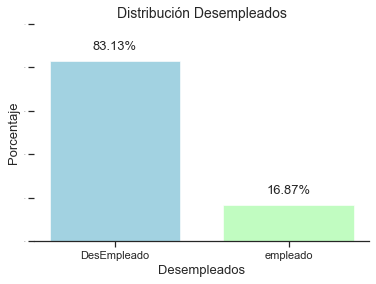

In [106]:
# Distribution in train dataset

Tasa_Desempleados = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Tasa_Desempleados.index.map({1:'DesEmpleado',0:"empleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

Aquí, nuestro modelo de entrenamiento tiene un problema de desequilibrio de clases debido a la desigualdad en la distribución de datos. 

#### Se hara Upsampling de los datos de entrenamiento (train)

In [107]:
# Upsampling usando SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

#from imblearn.combine import SMOTETomek
#os_us = SMOTETomek() #ratio=0.5
#X_train_sm, y_train_sm = os_us.fit_resample(X_train, y_train)
#print ("Distribution before resampling {}".format(Counter(y_train)))
#print ("Distribution after resampling {}".format(Counter(y_train_sm)))


In [108]:
print("----------------------------")
print("Tamaño original y-train, ", y_train.shape)
print("Tamaño y-train con upsampling, ", y_train_sm.shape)
print("----------------------------")

----------------------------
Tamaño original y-train,  (698952,)
Tamaño y-train con upsampling,  (1162072,)
----------------------------


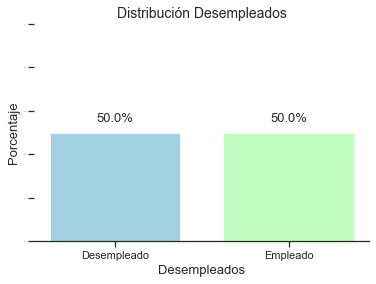

In [109]:
# Despues upsampling la nueva distribución del dataset de entrenamiento

Tasa_Desempleados = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

In [110]:
# Prueba con un regresión logisticas con el tamaño original sin upsampling

#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    LogReg_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    LogReg_base.fit(X_train, y_train)
    return LogReg_base

#ejecutamos el modelo "tal cual"
model_logreg = run_model(X_train, X_test, y_train, y_test)

In [111]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

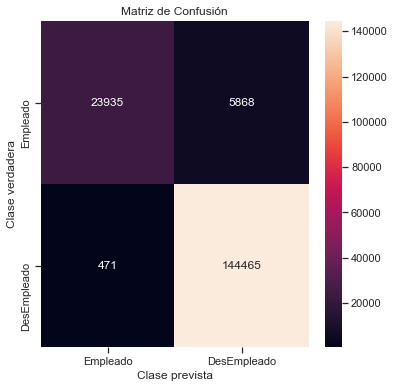

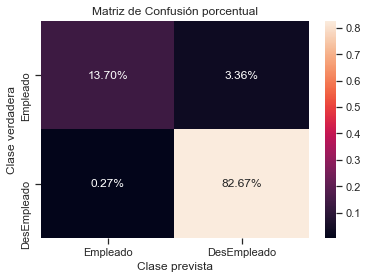

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     29803
           1       0.96      1.00      0.98    144936

    accuracy                           0.96    174739
   macro avg       0.97      0.90      0.93    174739
weighted avg       0.96      0.96      0.96    174739



In [112]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=['Empleado','DesEmpleado'],yticklabels=['Empleado','DesEmpleado'], annot=True, fmt ="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prevista')
    plt.show()
    # Porcentaje
    sns.heatmap(conf_matrix/np.sum(conf_matrix),xticklabels=['Empleado','DesEmpleado'],yticklabels=['Empleado','DesEmpleado'], annot=True, fmt =".2%");
    plt.title("Matriz de Confusión porcentual")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prevista')    
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = model_logreg.predict(X_test)
mostrar_resultados(y_test, pred_y)

Aqui vemos la confusion matrix y en la clase 2 (es lo que nos interesa detectar) vemos 0 fallos y 26526
aciertos dando un** recall de 1** y en teoría el valor no se podría mejorar. También es interesante
notar que en la columna de f1-score obtenemos excelentes resultados PERO que realmente no nos
deben engañar… Sin embargo, Lo cierto es que nuestro modelo es capaz de detectar correctamente los casos correctos.

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos class_-
weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante
el entrenamiento. Veamos:

In [113]:
print(pred_y)

[1 0 1 ... 1 1 0]


In [114]:
model_logreg.score(X_test, y_test)

0.9637230383600685

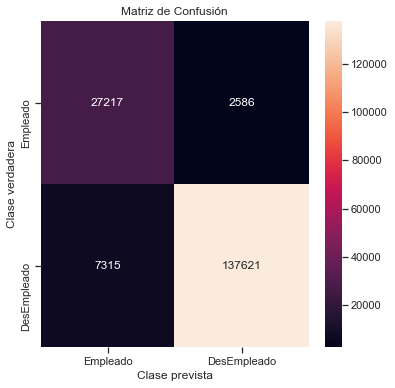

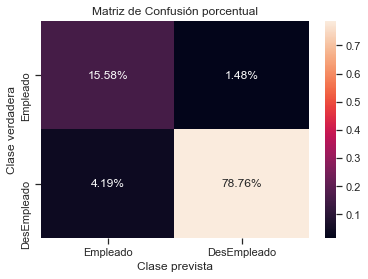

              precision    recall  f1-score   support

           0       0.79      0.91      0.85     29803
           1       0.98      0.95      0.97    144936

    accuracy                           0.94    174739
   macro avg       0.88      0.93      0.91    174739
weighted avg       0.95      0.94      0.94    174739



In [115]:
# Prueba con un regresión logisticas pero con el atributo balanceado paro con el grupo de tamaño original.
def run_model_balanced(X_train, X_test, y_train, y_test):
    LogRegBal = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    LogRegBal.fit(X_train, y_train)
    return LogRegBal

model_logreg_bal = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model_logreg_bal.predict(X_test)
mostrar_resultados(y_test, pred_y)

Con la parametro balanced seguimos onteniendo buenos resultados.Puede haber problemas de overfitting

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
#df_model_feature.head().T
#df_temp.head().T

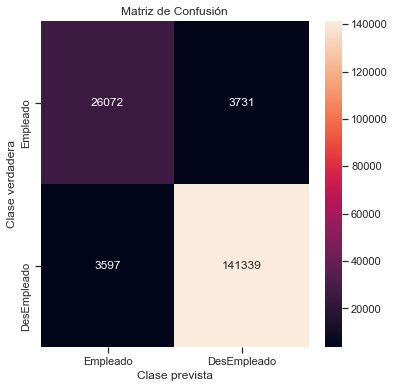

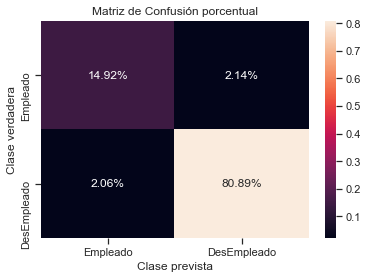

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     29803
           1       0.97      0.98      0.97    144936

    accuracy                           0.96    174739
   macro avg       0.93      0.92      0.93    174739
weighted avg       0.96      0.96      0.96    174739



In [118]:
#Corre un regresio logistica con parametro balanced con el grupo upsamplig
model_logreg_sm = run_model_balanced(X_train_sm, X_test, y_train_sm, y_test)
pred_y = model_logreg_sm.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [119]:
# Ejecutamos un randomforest con el train original.  Para que?
from sklearn.ensemble import RandomForestClassifier

RanFor_base = RandomForestClassifier(random_state=2)
RanFor_base.fit(X_train,y_train)

pred_y = RanFor_base.predict(X_test)


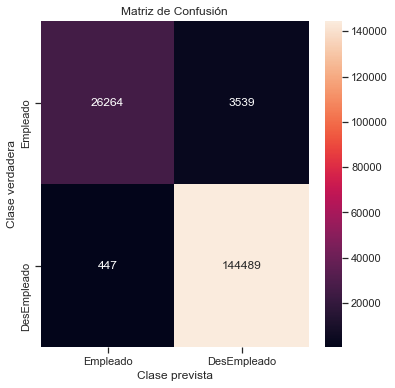

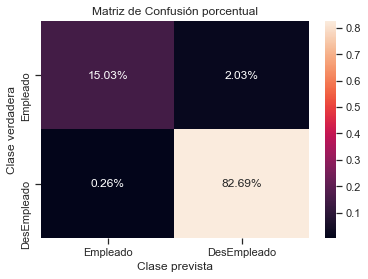

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     29803
           1       0.98      1.00      0.99    144936

    accuracy                           0.98    174739
   macro avg       0.98      0.94      0.96    174739
weighted avg       0.98      0.98      0.98    174739



In [120]:
mostrar_resultados(y_test, pred_y)

In [121]:
y_proba = RanFor_base.predict_proba(X_test)[:,1]

In [122]:
print(y_proba)

[1.   0.   1.   ... 1.   1.   0.02]


In [123]:
#from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba)

0.9916720131772335

Tiene un metrica ROC_AUC excelente, esto nos idica qué tan bien esta clasificando las predicciones
Pero no predice desempleados.

#### Predecir la tasa de desempleo de cada trabajador según el modelo RandomForest

In [124]:
#y_proba = RanFor_base.predict_proba(X_test)

Cross-validation

In [125]:
RanFor_base

RandomForestClassifier(random_state=2)

In [126]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10,random_state=2,shuffle=True)
#df_model_feature ,df_model_target
#cross_val_score(cl,X,y,cv=kf,scoring='roc_auc').mean()
cross_val_score(RanFor_base,df_model_feature ,df_model_target,cv=kf,scoring='roc_auc').mean()

0.9918785757341613

## Random forest
### 2 - más arboles

In [127]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_sm,y_train_sm,cv=5)
print(cv)
print(cv.mean())
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_sm,y_train_sm,cv=5)
print(cv)
print(cv.mean())
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_sm,y_train_sm,cv=5)
print(cv)
print(cv.mean())
'''

'\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nlr = LogisticRegression(max_iter = 2000)\ncv = cross_val_score(lr,X_train_sm,y_train_sm,cv=5)\nprint(cv)\nprint(cv.mean())\nknn = KNeighborsClassifier()\ncv = cross_val_score(knn,X_train_sm,y_train_sm,cv=5)\nprint(cv)\nprint(cv.mean())\nsvc = SVC(probability = True)\ncv = cross_val_score(svc,X_train_sm,y_train_sm,cv=5)\nprint(cv)\nprint(cv.mean())\n'

In [128]:
# Se hara con el train upsampling

#X_train2, X_test2, y_train2, y_test2 = Train_test_df(df_model_feature
#                                                 , df_model_target
#                                                 , test_size = 0.3)

#X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state = 0)
#from imblearn.over_sampling import SMOTE
#smt = SMOTE()
#X_train_res2, y_train_res2 = smt.fit_resample(X_train2, y_train2) 



In [129]:
X_train2 = X_train_sm
y_train2 = y_train_sm

RanFor_sm = RandomForestClassifier(n_estimators = 100, random_state=2)
RanFor_sm.fit(X_train2,y_train2)

RandomForestClassifier(random_state=2)

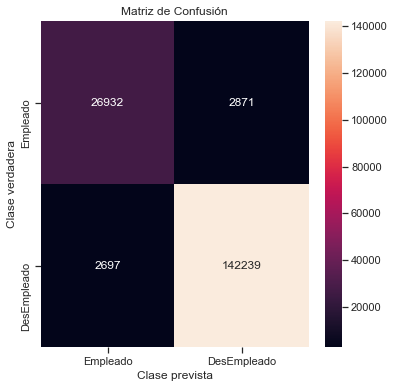

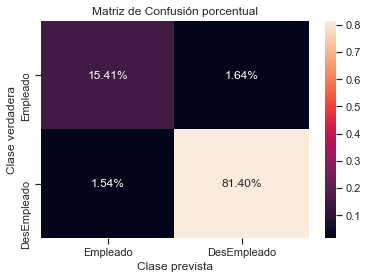

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     29803
           1       0.98      0.98      0.98    144936

    accuracy                           0.97    174739
   macro avg       0.94      0.94      0.94    174739
weighted avg       0.97      0.97      0.97    174739



In [130]:
X_test2 = X_test
y_test2 = y_test
y_pred = RanFor_sm.predict(X_test2)
mostrar_resultados(y_test2, y_pred)

In [131]:
y_proba = RanFor_sm.predict_proba(X_test2)[:,1]
roc_auc_score(y_test2,y_proba)

0.9923437914973039

In [132]:
y_proba = RanFor_sm.predict_proba(X_test2)
# Cross validation
RanFor_sm

RandomForestClassifier(random_state=2)

In [133]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=2,shuffle=True)
#df_model_feature ,df_model_target
#cross_val_score(cl,X,y,cv=kf,scoring='roc_auc').mean()
cross_val_score(RanFor_sm,df_model_feature ,df_model_target,cv=kf,scoring='roc_auc').mean()

0.9918785757341613

In [134]:
RanFor_sm.feature_importances_.size

118

In [135]:
df_model_feature.columns.size

118

In [136]:
coef_dict={}

for name, importance in zip(df_model_feature.columns.values, RanFor_sm.feature_importances_):
    print(name, "=", importance)

HayAportes = 0.16253692742367856
InactivoPostUltAporte = 0.23182567742841556
InactivoPostRetiro = 0.015412794415848552
Salario = 0.1407446327338475
SalarioPromedioRetorno = 0.27575600986227156
Edad = 0.030172240210309873
Genero_F = 0.0016695909770037553
Genero_M = 0.0017205962186266283
EstadoCivil_CASAD = 0.001358514609087495
EstadoCivil_DESC = 0.0017097921023707056
EstadoCivil_DIVOR = 0.0005761111557306564
EstadoCivil_SOLT = 0.0018890666462463449
EstadoCivil_UNLIB = 0.0009464315807992973
EstadoCivil_VIUDO = 7.143168964526684e-05
TipoRetiro_Extinción = 0.049302069359234715
TipoRetiro_Reducción = 0.02135421500458043
TipoRetiro_Suspensión = 0.004663036556575234
Sector_SECTOR PRIVADO = 0.015035717101287259
Sector_SECTOR PUBLICO = 0.0013297125453980876
ActiviEconomica_ACTIVIDADES INMOBILIARIAS, EMPRESARIALES Y DE ALQUILER = 0.0014628173317328787
ActiviEconomica_ACTIVIDADES NO BIEN ESPECIFICADAS = 0.00030407824278515754
ActiviEconomica_ADMINISTRACION PUBLICA Y DEFENSA, PLANES DE SEGURIDAD S

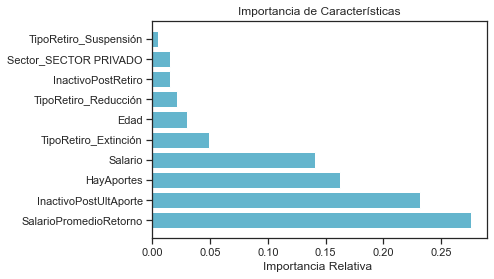

In [155]:
features = df_model_feature.columns.values
importances = RanFor_sm.feature_importances_
indices = np.flip(np.argsort(importances))[:10] #np.argsort(importances)[:10]

#plt.size()
plt.title('Importancia de Características')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa ')
plt.show()

Hay que eliminar algunas caracteristicas que le estan aportando mucho al modelo y puede ser duplicada.
- Los rangos de salario, los salarios están normalizados
- Los valores de inactivo
- El rabgo de edad, esta normalizada.
- la brecha .

<AxesSubplot:>

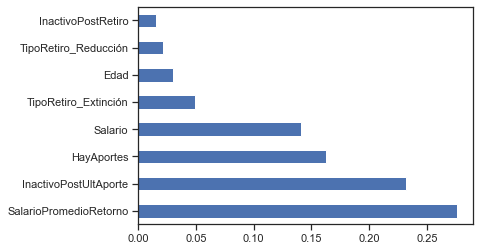

In [138]:
feat_importances = pd.Series(RanFor_sm.feature_importances_, index=df_model_feature.columns.values)
feat_importances.nlargest(8).plot(kind='barh')

In [140]:
X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
###############################################################################

# ANN Build

###############################################################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Funcion para crear una NN para clasificacion binaria usando 2 HL
    """
    
    # Initialising the ANN
    model = Sequential()
    
    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features, 
                    kernel_initializer = 'normal', 
                    activation = 'relu')) 
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in, 
                    kernel_initializer = 'normal', 
                    activation = 'relu'))
    
    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out, 
                    kernel_initializer = 'normal', 
                    activation = 'sigmoid')) 
    
    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

In [142]:
## fix random seed for reproducibility
#from tensorflow import set_random_seed
#from numpy.random import seed
#value = 7
#seed(value)
#set_random_seed(value)

# Parametros
n_features = np.shape(X_train)[1]
w_in = 12
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model_nn = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)
    
# Fitting the ANN to the Training set
model_nn.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs)

Epoch 1/100
6990/6990 [==============================] - 6s 830us/step - loss: 0.1618 - accuracy: 0.9418
Epoch 2/100
6990/6990 [==============================] - 5s 776us/step - loss: 0.0705 - accuracy: 0.9758
Epoch 3/100
6990/6990 [==============================] - 6s 801us/step - loss: 0.0689 - accuracy: 0.9760
Epoch 4/100
6990/6990 [==============================] - 7s 994us/step - loss: 0.0678 - accuracy: 0.9764
Epoch 5/100
6990/6990 [==============================] - 5s 762us/step - loss: 0.0671 - accuracy: 0.9767
Epoch 6/100
6990/6990 [==============================] - 5s 734us/step - loss: 0.0668 - accuracy: 0.9765
Epoch 7/100
6990/6990 [==============================] - 6s 807us/step - loss: 0.0669 - accuracy: 0.9765
Epoch 8/100
6990/6990 [==============================] - 5s 772us/step - loss: 0.0664 - accuracy: 0.9767
Epoch 9/100
6990/6990 [==============================] - 5s 761us/step - loss: 0.0661 - accuracy: 0.9769
Epoch 10/100
6990/6990 [==============================]

6990/6990 [==============================] - 6s 909us/step - loss: 0.0640 - accuracy: 0.9773
Epoch 79/100
6990/6990 [==============================] - 6s 789us/step - loss: 0.0636 - accuracy: 0.9773
Epoch 80/100
6990/6990 [==============================] - 6s 881us/step - loss: 0.0638 - accuracy: 0.9774
Epoch 81/100
6990/6990 [==============================] - 6s 792us/step - loss: 0.0637 - accuracy: 0.9773
Epoch 82/100
6990/6990 [==============================] - 6s 798us/step - loss: 0.0633 - accuracy: 0.9776
Epoch 83/100
6990/6990 [==============================] - 6s 838us/step - loss: 0.0639 - accuracy: 0.9774
Epoch 84/100
6990/6990 [==============================] - 6s 803us/step - loss: 0.0631 - accuracy: 0.9777
Epoch 85/100
6990/6990 [==============================] - 6s 843us/step - loss: 0.0628 - accuracy: 0.9778
Epoch 86/100
6990/6990 [==============================] - 6s 817us/step - loss: 0.0629 - accuracy: 0.9778
Epoch 87/100
6990/6990 [==============================] - 6

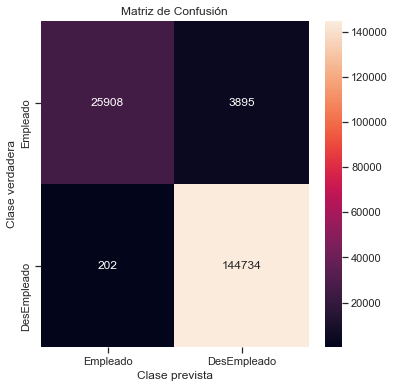

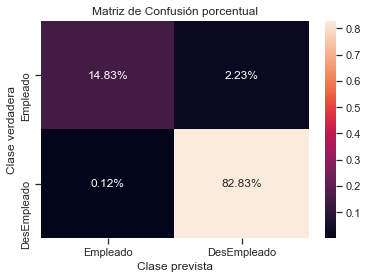

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     29803
           1       0.97      1.00      0.99    144936

    accuracy                           0.98    174739
   macro avg       0.98      0.93      0.96    174739
weighted avg       0.98      0.98      0.98    174739



In [143]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = model_nn.predict(X_test)
y_pred = np.round(y_pred)
mostrar_resultados(y_test, y_pred)

In [741]:
# Probar el modelo , faltan parametros
print(model_logreg.predict(np.array([[1,1,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0]])))
print(model_logreg_bal.predict(np.array([[1,1,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0]])))
print(model_logreg_sm.predict(np.array([[1,1,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0]])))
print(RanFor_base.predict(np.array([[1,1,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0]])))
print(RanFor_sm.predict(np.array([[1,1,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0]])))
print(model_nn.predict(np.array([[1,1,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0]])))
print('caso 2')
print(model_logreg.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
print(model_logreg_bal.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
print(model_logreg_sm.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
print(RanFor_base.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
print(RanFor_sm.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
print(model_nn.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))



'''
print(model_nn.predict(np.array([[0,1,0,0,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])))
print(RanFor_sm.predict(np.array([[0,1,0,0,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])))
print(RanFor_base(np.array([[0,1,0,0,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])))
HayAportes = 0.15835043734841006
InactivoPostUltAporte = 0.4685057449024065
InactivoPostRetiro = 0.016922543054396066
Salario = 0.06960050877953794
SalarioPromedioRetorno = 0.2231192299961579
Edad = 0.034155482199691466
Genero_F = 0.0008482919663733265
Genero_M = 0.0008930950630526618
EstadoCivil_CASAD = 0.0005449470889759924
EstadoCivil_DESC = 0.0006419440302149561
EstadoCivil_DIVOR = 0.00032579851091571666
EstadoCivil_SOLT = 0.000672865799929523
EstadoCivil_UNLIB = 0.0004517087339166823
EstadoCivil_VIUDO = 7.927351058984793e-05
TipoRetiro_Extinción = 0.01218995677849753
TipoRetiro_Reducción = 0.011721817536370424
TipoRetiro_Suspensión = 0.000976354700563513
'''
#TuvoReduccion #HayAportes #Brecha #InactivoPostUltAporte #InactivoPostRetiro
#Salario #SalarioPromedioRetorno #Edad
#RangoEdad_Entre31y45 #RangoEdad_Entre45y59 #RangoEdad_Entre59y100 #RangoEdad_Menor31
#Genero_F #Genero_M
#EstadoCivil_CASAD #EstadoCivil_DESC #EstadoCivil_DIVOR #EstadoCivil_SOLT #EstadoCivil_UNLIB #EstadoCivil_VIUDO
#RangoSalario_0.32-0.85 #RangoSalario_0.85-1.23 #RangoSalario_1.23-2.17 #RangoSalario_2.17-4.33 #RangoSalario_<=Minimo
#RangoSalario_>4.33 
#RangoSalarioRetorno_0.32-0.85 #RangoSalarioRetorno_0.85-1.23 #RangoSalarioRetorno_1.23-2.17
#RangoSalarioRetorno_2.17-4.33 #RangoSalarioRetorno_<=Minimo #RangoSalarioRetorno_>4.33 #RangoSalarioRetorno_No
#TipoRetiro_Extinción #TipoRetiro_Reducción #TipoRetiro_Suspensión

ValueError: X has 17 features per sample; expecting 107

#### Desarrollo del Modelo

Aquí, usaré modelos de regresión logística, Random forest y aumento de gradiente(**Gradient boosting**) para predecir desempleados y comparar qué modelo funciona mejor para nuestro conjunto de datos. Además, analizare el conjunto de datos original y los datos de muestreo superior para todos estos modelos.

### Ajuste de hiperparametros (Hyperparameter Tunning)

Basado en datos originales y de Upsampling, ajustamos los hiperparámetros para nuestros datos de entrenamiento para los tres modelos.

In [239]:
#X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
#                                                 , df_model_target
#                                                 , test_size = 0.75)
X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.75)
# Se le hace un escalado - Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Luego el upsampling
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", X_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", X_test.shape)
print("y test shape, ", y_test.shape)
print("x train shape sm, ", X_train_sm.shape)
print("y train shape sm, ", y_train_sm.shape)
print("----------------------------")

----------------------------
Original features shape,  (414244, 17)
Original target shape,  (414244,)
x train shape,  (103561, 17)
y train shape,  (103561,)
x test shape,  (310683, 17)
y test shape,  (310683,)
x train shape sm,  (130190, 17)
y train shape sm,  (130190,)
----------------------------


In [240]:
'''

#from xgboost.sklearn import XGBRegressor
import xgboost as xgb
modelo =  xgb.XGBClassifier()
modelo.fit(X_train_sm, y_train_sm)
# Realizo las predicciones
y_pred = modelo.predict(X_train_sm)
predicciones = [round(value) for value in y_pred]
# Evalúo las predicciones
precision_train = accuracy_score(y_train_sm, predicciones)

# Repito el proceso con datos de evaluacion
y_pred = modelo.predict(X_test)
predicciones = [round(value) for value in y_pred]

# Evalúo las predicciones
precision_test = accuracy_score(y_test, predicciones)
print(modelo)
print('Precisión xgboost train/test  {0:.3f}/{1:.3f}'
      .format(precision_train, precision_test))
'''      

"\n\n#from xgboost.sklearn import XGBRegressor\nimport xgboost as xgb\nmodelo =  xgb.XGBClassifier()\nmodelo.fit(X_train_sm, y_train_sm)\n# Realizo las predicciones\ny_pred = modelo.predict(X_train_sm)\npredicciones = [round(value) for value in y_pred]\n# Evalúo las predicciones\nprecision_train = accuracy_score(y_train_sm, predicciones)\n\n# Repito el proceso con datos de evaluacion\ny_pred = modelo.predict(X_test)\npredicciones = [round(value) for value in y_pred]\n\n# Evalúo las predicciones\nprecision_test = accuracy_score(y_test, predicciones)\nprint(modelo)\nprint('Precisión xgboost train/test  {0:.3f}/{1:.3f}'\n      .format(precision_train, precision_test))\n"

In [241]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        if clsModelsNm[i] == "Logistic Regression":
            ## Se cambiaron porque daba error con los parametros anteriores
            solver_options = ['newton-cg','sag','lbfgs']  ## Le quite esta 'lbfgs',  -- sag --'liblinear'
            # ValueError: Solver liblinear does not support a multinomial backend.
            multi_class_options = ['ovr', 'multinomial'] 
            class_weight_options = ['None', 'balanced']

            param_grid_RL = dict(solver = solver_options, multi_class = 
            multi_class_options, class_weight = class_weight_options)

            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = param_grid_RL  ####parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )            
            
        else:
            print(clsModelsNm[i])
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score                          
                            , n_jobs = 3
                           )
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [242]:
clsModelsNm = ["Logistic Regression", "Random Forest", "xgb"] #"Gradient boosting"]
#clsModelsNm = [ "xgb"]
scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']
'''
clsParams = {'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

'''
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100] 
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'xgb': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }            

In [243]:
clsLR = LogisticRegression(random_state = random_state)
clsRF = RandomForestClassifier(random_state = random_state)
clsGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF, clsGB]
#clsModels = [clsGB]


tuned_params = Parameter_tunning(X_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression
-0.16833020463173937
{'class_weight': 'None', 'multi_class': 'ovr', 'solver': 'sag'}
Random Forest
Random Forest
-0.12451833230644922
{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 5, 'n_estimators': 200}
xgb
xgb
-0.1254177601292934
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 0.7}


In [244]:
# Probando hiperparametro con umsampling
# Upsampling usando SMOTE
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = random_state) #, ratio = 1.0)
#X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)

print("----------------------------")
print("Original x train shape, ", X_train.shape)
print("Resample x train shape, ", X_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (103561, 17)
Resample x train shape,  (130190, 17)
----------------------------


In [256]:

clsLR_sm = LogisticRegression(random_state = random_state)
clsRF_sm = RandomForestClassifier(random_state = random_state)
clsGB_sm = GradientBoostingClassifier(random_state = random_state)

clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

tuned_params_sm = Parameter_tunning(X_train_sm, y_train_sm, clsModels_sm, clsModelsNm, clsParams , 'neg_log_loss')

Logistic Regression
-0.16361356186018922
{'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}
Random Forest
Random Forest
-0.11831962823396654
{'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 1, 'n_estimators': 200}
xgb
xgb
-0.11696854936514538
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 1}


### Model Comparision

During hyperparameter tunning process, I got best parameters for each models. using these parameter and corss_val_score method, 
I have compared different metrics and try to find best threshold value with lower log loss score.

Intuition process -

Because target variable is binary value, log loss would be better metrics to find uncertainity of the model. Once I'll explore a better model wih lower log loss score, then I'll tune threshold to improve F1/Recall/Precision score.

In [257]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [258]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])] )

> ### Original Data

Logistic Regression
************************************************
Original data
accuracy  score: 0.9242475453631531
precision  score: 0.8619450621349435
recall  score: 0.9478760056902911
f1  score: 0.9028685685010615
neg_log_loss  score: -0.16836084884904606


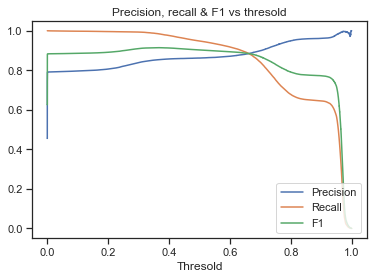

When F1 score is max 
        Precisions   Recalls        F1  Threshold
40047     0.85342  0.985052  0.914524   0.363755
Random Forest
************************************************
Original data
accuracy  score: 0.9396008126251247
precision  score: 0.8712795507892359
recall  score: 0.9825559754729951
f1  score: 0.9235752269538768
neg_log_loss  score: -0.12525852127262344


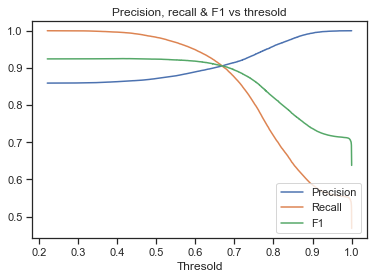

When F1 score is max 
      Precisions   Recalls        F1  Threshold
447    0.863853  0.995477  0.925006   0.415873
xgb
************************************************
Original data
[08:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logis

[08:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

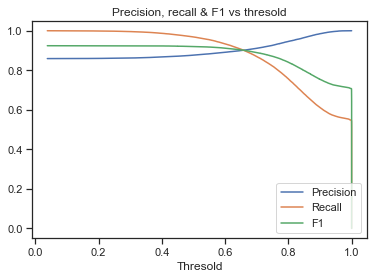

When F1 score is max 
     Precisions   Recalls        F1  Threshold
28     0.85947  0.999766  0.924325   0.127728


In [259]:
# Original data

clsLR = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l2')

#{'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 15, 'n_estimators': 200}
clsRF = RandomForestClassifier(random_state = random_state
                              ,max_depth = 15
                              ,max_features = 0.7
                              ,min_samples_leaf = 15
                              ,n_estimators = 200
                              )

# clsRF = RandomForestClassifier(random_state = random_state,max_depth = 15,max_features = 'auto',min_samples_leaf = 10
#                              ,n_estimators = 150 )

#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clsGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 1}

#clsGB = GradientBoostingClassifier(random_state = random_state
#                              , max_depth = 3 #5
#                              , n_estimators = 200 #150
#                              , learning_rate = 0.2 #0.05
#                              , min_samples_leaf = 1 #20 
#                              , min_samples_split = 0.5 #0.1
#                              , subsample = 1 #0.7
#                                  )

clsModels = [clsLR, clsRF, clsGB]

Cross_validation_score(clsModels, clsModelsNm, [(X_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

Logistic Regression
************************************************
Upsampled data
accuracy  score: 0.941193640064521
precision  score: 0.9094550952776638
recall  score: 0.9799523772947232
f1  score: 0.9433878412583582
neg_log_loss  score: -0.16359873103941056


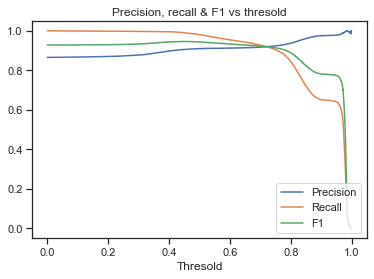

When F1 score is max 
       Precisions   Recalls        F1  Threshold
3874    0.904385  0.990982  0.945706   0.442681
Random Forest
************************************************
Upsampled data
accuracy  score: 0.951563100084492
precision  score: 0.9139437240520538
recall  score: 0.9970043782164527
f1  score: 0.9536681557582419
neg_log_loss  score: -0.11943482185302867


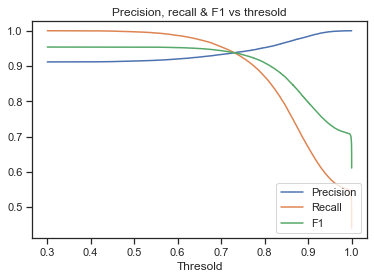

When F1 score is max 
      Precisions   Recalls       F1  Threshold
154    0.912632  0.998925  0.95383   0.455572
xgb
************************************************
Upsampled data
[08:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

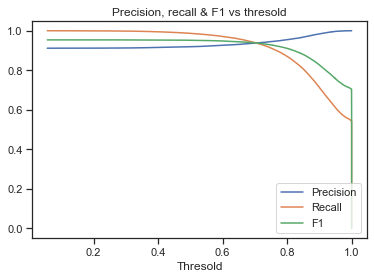

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.911669      1.0  0.953794   0.056498


In [260]:
# resample data


clsLR_sm = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'none')

clsRF_sm = RandomForestClassifier(random_state = random_state
                               , max_depth = 20
                              , n_estimators = 200
                              , max_features = 0.7 #'auto'
                              , min_samples_leaf = 20 #1 
                                 )
clsGB_sm = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#clsGB_sm = GradientBoostingClassifier(random_state = random_state
#                              , max_depth = 7 #5
#                              , n_estimators = 200 #100
#                              , learning_rate = 0.2
#                              , min_samples_leaf = 1 #10 
#                              , min_samples_split = 0.5 #0.1
#                              , subsample = 1
#                                     )
                        
clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

Cross_validation_score(clsModels_sm, clsModelsNm, [(X_train_sm, y_train_sm,'Upsampled data')], scoreMatrix)

Using these threshold values, now we will tune our model and evaluate it on testing dataset.

### Model Evaluation

Up till now, I was working on training dataset to train model. Let's checked how models are performing on unseen dataset (testing).

In [261]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [262]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

### Original data

*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    195031
           1       0.85      0.98      0.91    115652

    accuracy                           0.93    310683
   macro avg       0.92      0.94      0.93    310683
weighted avg       0.94      0.93      0.93    310683

*******************************************
Log loss score 0.17
*******************************************
Confusion matrix


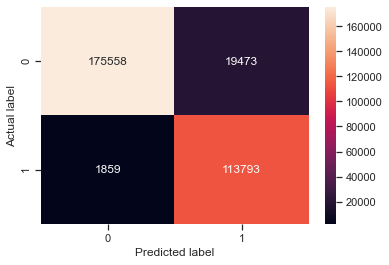

*******************************************
*********** Random Forest *************
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    195031
           1       0.87      0.99      0.93    115652

    accuracy                           0.94    310683
   macro avg       0.93      0.95      0.94    310683
weighted avg       0.95      0.94      0.94    310683

*******************************************
Log loss score 0.13
*******************************************
Confusion matrix


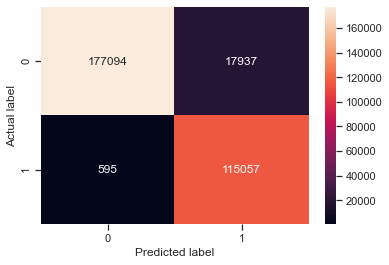

*******************************************
[09:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*********** xgb *************
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    195031
           1       0.86      1.00      0.93    115652

    accuracy                           0.94    310683
   macro avg       0.93      0.95      0.94    310683
weighted avg       0.95      0.94      0.94    310683

*******************************************
Log loss score 0.13
*******************************************
Confusion matrix


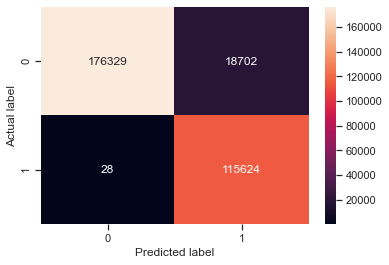

*******************************************


In [264]:
Logistic_threshold = 0.363755 # 0.988787
Random_forest_threshold = 0.415873 #0.795389
Gradient_boosting_threshold = 0.127728 #0.891125

Model_evaluation(clsModels
                 , clsModelsNm
                 , X_train
                 , y_train
                 , X_test
                 , y_test
                 , [Logistic_threshold
                    ,Random_forest_threshold
                    , Gradient_boosting_threshold  ] )

### Upsampling data

*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    195031
           1       0.85      0.99      0.91    115652

    accuracy                           0.93    310683
   macro avg       0.92      0.94      0.93    310683
weighted avg       0.94      0.93      0.93    310683

*******************************************
Log loss score 0.18
*******************************************
Confusion matrix


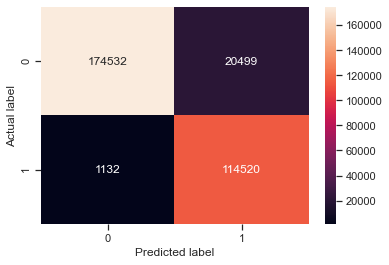

*******************************************
*********** Random Forest *************
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    195031
           1       0.86      1.00      0.93    115652

    accuracy                           0.94    310683
   macro avg       0.93      0.95      0.94    310683
weighted avg       0.95      0.94      0.94    310683

*******************************************
Log loss score 0.13
*******************************************
Confusion matrix


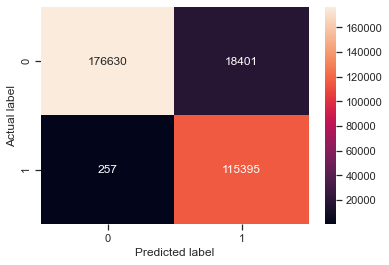

*******************************************
[10:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*********** xgb *************
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    195031
           1       0.86      1.00      0.93    115652

    accuracy                           0.94    310683
   macro avg       0.93      0.95      0.94    310683
weighted avg       0.95      0.94      0.94    310683

*******************************************
Log loss score 0.13
*******************************************
Confusion matrix


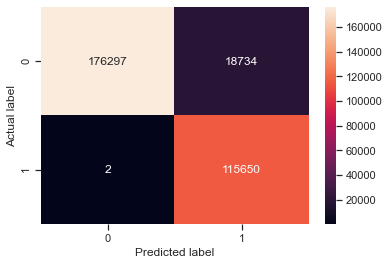

*******************************************


In [265]:
Logistic_threshold_sm = 0.442681 #0.965502
Random_forest_threshold_sm = 0.455572 #0.949014
Gradient_boosting_threshold_sm =  0.056498 #0.90573

Model_evaluation(clsModels_sm
                 , clsModelsNm
                 , X_train_sm
                 , y_train_sm
                 , X_test
                 , y_test
                 , [Logistic_threshold_sm
                    ,Random_forest_threshold_sm
                    , Gradient_boosting_threshold_sm  ] )

### Model conclusion

Based on model comparision and evaluation process, upsampling data works better during training process, however not with unseen data (based on log loss score). One of the reason could be data leakage in corss_val_score step.

However, log loss score for original dataset remains same with training dataset as well as testing dataset.

From above analysis, gradient boosting with original dataset has stable and best score. So, for prediction process I have used it.

Text(0.5, 1.0, 'Feature importance')

D:\Personal\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Personal\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


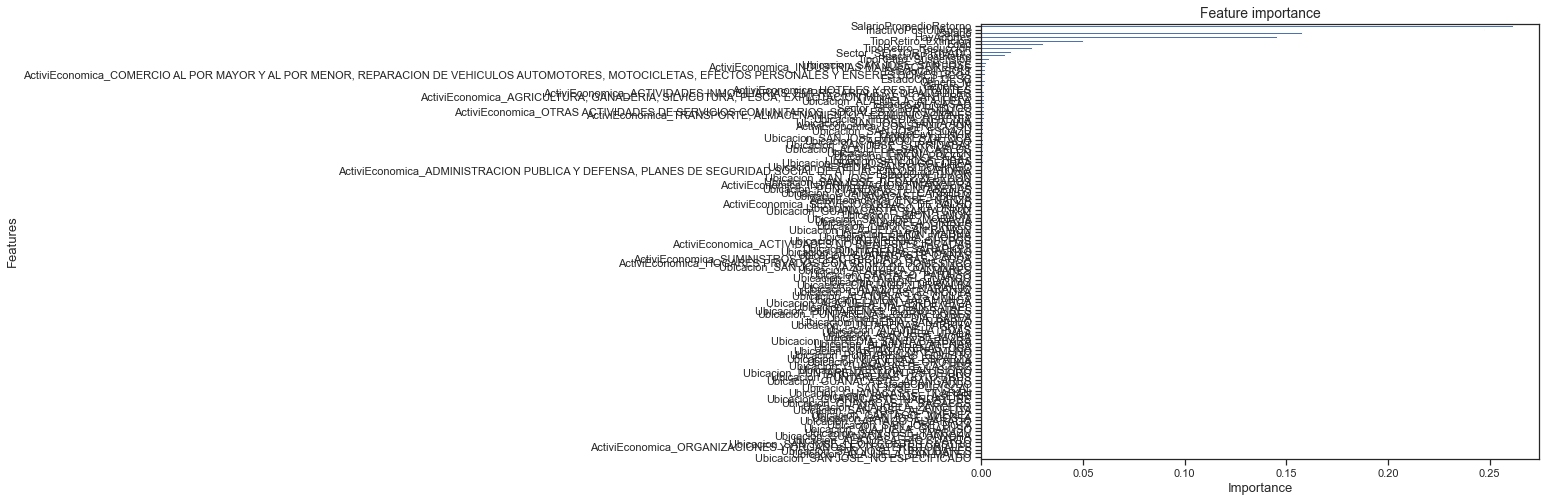

In [95]:
feature_importance = pd.Series(RanFor_sm.feature_importances_, df_model_feature.columns) #X_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on feature importance graph, it tells that Totalcharges, Tenure, Monthly charges , Contract type, Payment method, Internet sevice type, PaperlessBilling are some important features to predict churn customers.

In [96]:
Desempleado_prob = pd.DataFrame({'Predicted_proba': RanFor_sm.predict_proba(X_test)[:][:,1]
                                   , 'predicted': RanFor_sm.predict(X_test)})
Desempleado_prob

Predicted_proba  predicted
0                  1.00          1
1                  0.00          0
2                  1.00          1
3                  1.00          1
4                  0.72          1
...                 ...        ...
174734             1.00          1
174735             1.00          1
174736             1.00          1
174737             0.00          0
174738             1.00          1

[174739 rows x 2 columns]

### 5. Plan de Analisis


Predicción de Empleados 

Ya que generamos un modelo basado en desempleados y no, que ayudan a clasificar a ambos. Ahora podemos usar el mismo modelo en empleados para encontrar la probabilidad de desempleo.

In [97]:
empleado = df_model[df_model['Desempleado']==0]

empleado_feature ,empleado_target = Create_model_df(empleado
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

In [100]:
empleado = df_model[df_model['Desempleado']==0]

empleado_feature ,empleado_target = Create_model_df(empleado
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])
empleado_feature = empleado_feature.drop(['ActiviEconomica_NO ENCONTRADA'],axis=1)
empleado_feature = empleado_feature.drop(['Sector_NO ENCONTRADO'],axis=1)
empleado_feature = empleado_feature.drop(['Ubicacion_NO DEFINIDA_NO DEFINIDO'],axis=1)

#empleado_feature = empleado.drop(columns=['Desempleado'])
#empleado_target = empleado.Desempleado
empleado_feature.insert(98, "Ubicacion_SAN JOSE_NO ESPECIFICADO", 0, allow_duplicates=False)


In [101]:
#print(model_logreg.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
#print(model_logreg_bal.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
#print(model_logreg_sm.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
#print(RanFor_base.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
#print(RanFor_sm.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))
#print(model_nn.predict(np.array([[0,1,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0]])))

#empleado_prob = clsRF.predict_proba(empleado_feature)
#empleado_prob = model_logreg.predict_proba(empleado_feature)
#empleado_prob = model_logreg_bal.predict_proba(empleado_feature)
#empleado_prob = model_logreg_sm.predict_proba(empleado_feature)
#empleado_prob = RanFor_base.predict_proba(empleado_feature)
empleado_prob = RanFor_sm.predict_proba(empleado_feature)
#empleado_prob = model_nn.predict_proba(empleado_feature)

In [102]:
empleado['ProbabilidadDesempleo'] = empleado_prob[:][:,1]

<ipython-input-102-f0775e2205ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleado['ProbabilidadDesempleo'] = empleado_prob[:][:,1]


Text(0.5, 1.0, 'Distribución de probabilidad de desempleo de empleados activos')

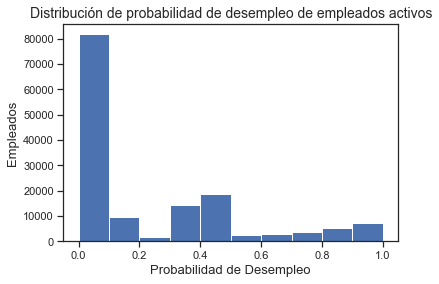

In [103]:
plt.hist(empleado['ProbabilidadDesempleo'], bins = 10)

plt.xlabel("Probabilidad de Desempleo", fontsize=13)
plt.ylabel("Empleados", fontsize=13)
plt.title("Distribución de probabilidad de desempleo de empleados activos", fontsize=14)

In [104]:
empleado.loc[empleado['ProbabilidadDesempleo'] >= 0.8 , 'TipoRiesgo'] = 'Muy Alto'
empleado.loc[(empleado['ProbabilidadDesempleo'] >= 0.6) & (empleado['ProbabilidadDesempleo'] < 0.8)  , 'TipoRiesgo'] = 'Alto'
empleado.loc[(empleado['ProbabilidadDesempleo'] >= 0.4) & (empleado['ProbabilidadDesempleo'] < 0.6) , 'TipoRiesgo'] = 'Medio'
empleado.loc[(empleado['ProbabilidadDesempleo'] >= 0.2) & (empleado['ProbabilidadDesempleo'] < 0.4) , 'TipoRiesgo'] = 'Bajo'
empleado.loc[(empleado['ProbabilidadDesempleo'] > 0.0) & (empleado['ProbabilidadDesempleo'] < 0.2) , 'TipoRiesgo'] = 'Muy Bajo'

D:\Personal\Anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Personal\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Personal\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [105]:
empleado['TipoRiesgo'].value_counts()

Muy Bajo    65743
Medio       20842
Bajo        15880
Muy Alto    12646
Alto         6732
Name: TipoRiesgo, dtype: int64

Text(0.5, 0, 'Empleados')

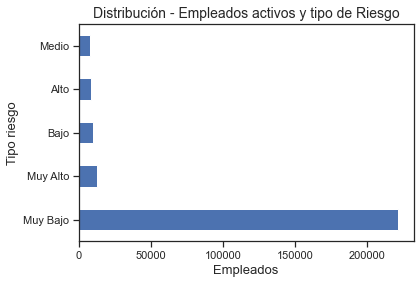

In [326]:
empleado['TipoRiesgo'].value_counts().plot(kind = 'barh')
plt.title("Distribución - Empleados activos y tipo de Riesgo", fontsize=14)
plt.ylabel("Tipo riesgo", fontsize = 13)
plt.xlabel("Empleados", fontsize = 13)

We can provide retension plans to high risk and very high risk type customers.

## Conclusion

In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.

Moreover, we can add different datasources like customer inquires, seasonality in sales, more demographic information to make our prediction accurate.

# **ANÁLISIS DE NOTAS PERIODÍSTICAS**

Análisis exploratorio de las notas periodísticas usando Procesamiento de Lenguaje Natural Básico. Con esta información se busca indagar si el tema referente al cierre de restaurantes y diferentes comercios identificados en el análisis anterior, realmente fue percibido como un problema por la población mexicana y que tipo de sentimientos fueron asociados en la propagación de las noticias. 

Las preguntas de investigación que se plantearon para este análisis fueron las siguientes:


*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

## Definición de módulos

In [244]:
import locale
from datetime import datetime
import dateutil
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
#import plotly.express as px


## Extracción de notas periodísticas con Scrapy
Scrapy fue utilizado para rastrear el sitio web de La Jornada (se puede actualizar la programación hacia otro periodico) y extraer las noticias de manera eficiente sobre las palabras clave *'restaurantes'* y *'covid'*. Con el objetivo de analizar la conversación sobre unos de los sectores economicos mas afectados durante de la pandemia, con este análisis se logro corroborar que efectivamente el cierre y la reapertura fueron temas latentes durante durante el año 2020.  Los pasos que se siguieron para la extracción de las noticias fueron los siguientes:
1. Instalar los módulos scrapy y virtualenv:

> `pip install scrapy`

> `pip install virtualenv`

2. Se crea un ambiente virtual con Python y se activa:

```
virtualenv scrapyvenv
cd scrapyvenv
.\Scripts\activate
```
3. Se crea un proyecto Scrapy:

```
scrapy startproject webscrapy
```
4. Se crea una araña o spider:

```
cd webscrapy
scrapy genspider nacion www.nacion.com
```
5. Al terminar de codificar la araña, se ejecuta el siguiente comando para iniciar el proceso de extracción de información:

```
$ scrapy crawl nacion -a Keywords='despido,disminución,FCL,jornada,covid' -o nacion_covid.csv
```

## Exploración y trasformación inicial
Se lee el archivo CSV generado con el web crawler, el cual contiene el nombre del autor, el cuerpo de la nota periodística, la fecha de publicación, las palabras claves, el enlace, ubicación, la fuente de datos y el titulo de la noticia.

In [240]:
data = pd.read_csv(r'D:\Personal\Maestria BigData\Trabajo Fin Master\noticias.csv', sep=';',encoding='utf8')
data.head(10)

Keywords                                             Titulo  \
0              Covid, FCL  Crisis disparó retiros del FCL en operadoras d...   
1              Covid, FCL   #NoComaCuento: Sitio web para supuesto retiro...   
2              Covid, FCL   Delincuentes descubren en covid-19 una novedo...   
3              Covid, FCL   CCSS habilita plataforma web para conocer dón...   
4              Covid, FCL   Diputados aprueban entrega del FCL a asalaria...   
5              Covid, FCL   Jefes de fracción debaten plan sobre entrega ...   
6              Covid, FCL   Gobierno estima que hasta 500.000 asalariados...   
7              Covid, FCL   #NoComaCuento: Delincuentes utilizan posible ...   
8              Covid, FCL   Grupo de diputados sugiere texto para entrega...   
9  Covid, Jornada Laboral        Digitalización y retos del Derecho Laboral,   

                                               Autor                 Fecha  \
0                                     Yeryis Salas.,     22 agosto, 2020 ,   
1                                     Nicole Pérez.,       12 mayo, 2020 ,   
2                                Eillyn Jiménez B..,      4 agosto, 2020 ,   
3                             José Andrés Céspedes.,      15 abril, 2020 ,   
4                                   Aarón Sequeira.,       1 abril, 2020 ,   
5                                   Aarón Sequeira.,      31 marzo, 2020 ,   
6                                   Aarón Sequeira.,      28 marzo, 2020 ,   
7                                     Nicole Pérez.,      26 marzo, 2020 ,   
8                                       Josué Bravo.       25 marzo, 2020    
9   Café Laboral, Alejandro Trejos G. Socio BDS A...   30 abril, 4:45 PM ,   

                                                Link  \
0  /el-pais/politica/crisis-disparo-retiros-del-f...   
1   /no-coma-cuento/nocomacuento-sitio-web-para-s...   
2   /sucesos/judiciales/delincuentes-descubren-en...   
3   /el-pais/servicios/ccss-habilita-plataforma-w...   
4   /el-pais/politica/diputados-autorizan-entrega...   
5   /el-pais/politica/jefes-de-fraccion-debaten-p...   
6   /el-pais/politica/gobierno-estima-que-hasta-5...   
7   /no-coma-cuento/nocomacuento-delincuentes-uti...   
8   /el-pais/politica/diputados-alcanzan-acuerdo-...   
9  /blogs/cafe-laboral/digitalizacion-y-retos-del...   

                                             resumen  \
0  195.000 asalariados, equivalentes al 18% de lo...   
1   Criminales están empleando el sitio web fraud...   
2   Karla Chinchilla, jefa de la Sección de Fraud...   
3   La Caja Costarricense de Seguro Social (CCSS)...   
4   Con 46 votos a favor este proyecto permitirá ...   
5   Nueva versión del proyecto de ley se estudiab...   
6   Cifra equivale a más de un 40% de la població...   
7   El Banco Nacional alertó, en sus redes social...   
8   Podrían retirar el FCL quienes sufran suspens...   
9  El país puede aprovechar la tendencia al cambi...   

                                             Noticia  
0   El 7 de abril, las operadoras de pensiones em...  
1  El portal suplanta las identidades de la Super...  
2  El OIJ explicó que las modalidades de estafa s...  
3  Varias entidades financieras reportaron este l...  
4  Los diputados Víctor Morales, del PAC, y Karin...  
5  Eduardo Cruickshank, de Restauración Nacional,...  
6   Eduardo Cruickshank y Carlos Avendaño, del Pa...  
7   El Banco Nacional alertó, en sus redes social...  
8   Los trabajadores afectados salarialmente por ...  
9  Si bien el tema no es nuevo porque se viene ha...

Se reemplazan los acronimos de los meses al idioma Ingles, para que el parser del modulo dateutil reconozca la fecha en el texto de manera automática y se pueda convertir el string a un formato datetime.

In [241]:
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'agosto', 'aug')
data['Fecha'] = data['Fecha'].str.replace(r'abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'Abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'enero', 'jan')
data['Fecha'] = data['Fecha'].str.replace(r'febrero', 'feb')
data['Fecha'] = data['Fecha'].str.replace(r'marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'Mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'diciembre', 'dec')
data['Fecha'] = data['Fecha'].str.replace(r'noviembre', 'nov')
data['Fecha'] = data['Fecha'].str.replace(r'octubre', 'oct')
data['Fecha'] = data['Fecha'].str.replace(r'septiembre', 'sep')

In [242]:
data.Fecha

0         22 aug, 2020 ,
1         12 may, 2020 ,
2          4 aug, 2020 ,
3         15 apr, 2020 ,
4          1 apr, 2020 ,
5         31 mar, 2020 ,
6         28 mar, 2020 ,
7         26 mar, 2020 ,
8          25 mar, 2020 
9      30 apr, 4:45 PM ,
10              27 mar ,
11               2 feb ,
12               2 jan ,
13        16 dec, 2020 ,
14         3 dec, 2020 ,
15        24 nov, 2020 ,
16         5 nov, 2020 ,
17         8 oct, 2020 ,
18        22 sep, 2020 ,
19        12 may, 2020 ,
20        23 apr, 2020 ,
21         6 apr, 2020 ,
22         2 apr, 2020 ,
23        18 mar, 2020 ,
24        17 mar, 2020 ,
25          03 apr 2020,
26          01 apr 2020,
27          30 apr 2021,
28          28 may 2020,
29          18 apr 2020,
30          18 apr 2020,
31          07 apr 2020,
32          04 apr 2020,
33          03 apr 2020,
34          26 mar 2020,
35          25 mar 2020,
36          21 apr 2020,
Name: Fecha, dtype: object

In [245]:
data['Fecha'] = [dateutil.parser.parse(x, fuzzy_with_tokens=True)[0] for x in data['Fecha']]
data['year'] = pd.DatetimeIndex(data['Fecha']).year
data['month'] = pd.DatetimeIndex(data['Fecha']).month

Se corrobora la transformación del atributo date y los nuevos atributos agregados al dataframe.

In [246]:
data

Keywords                                             Titulo  \
0               Covid, FCL  Crisis disparó retiros del FCL en operadoras d...   
1               Covid, FCL   #NoComaCuento: Sitio web para supuesto retiro...   
2               Covid, FCL   Delincuentes descubren en covid-19 una novedo...   
3               Covid, FCL   CCSS habilita plataforma web para conocer dón...   
4               Covid, FCL   Diputados aprueban entrega del FCL a asalaria...   
5               Covid, FCL   Jefes de fracción debaten plan sobre entrega ...   
6               Covid, FCL   Gobierno estima que hasta 500.000 asalariados...   
7               Covid, FCL   #NoComaCuento: Delincuentes utilizan posible ...   
8               Covid, FCL   Grupo de diputados sugiere texto para entrega...   
9   Covid, Jornada Laboral        Digitalización y retos del Derecho Laboral,   
10  Covid, Jornada Laboral   Trabajadoras domésticas convivieron con fuert...   
11  Covid, Jornada Laboral   Impacto de propuesta de renta global para los...   
12  Covid, Jornada Laboral   INS ha pagado más de ¢1.000 millones a la CCS...   
13  Covid, Jornada Laboral   25 de cada 100 ticos planean romper su burbuj...   
14  Covid, Jornada Laboral    Suspensión y Extinción del Contrato de Trabajo,   
15  Covid, Jornada Laboral   Aguinaldo, vacaciones y cesantía en casos de ...   
16  Covid, Jornada Laboral                   Reducción de jornadas laborales,   
17  Covid, Jornada Laboral   Asesoría jurídica: Lo que debe saber ante cua...   
18  Covid, Jornada Laboral            Situación migratoria ante la covid-19 ,   
19  Covid, Jornada Laboral          ¿Cómo generar nuevas fuentes de ingreso?,   
20  Covid, Jornada Laboral   Cabletica rebajará cuota a clientes que sufri...   
21  Covid, Jornada Laboral   Jueza urge ley para evitar apremio de obligad...   
22  Covid, Jornada Laboral   Coronavirus: La permuta de tiempo no laborado...   
23  Covid, Jornada Laboral   Corte Plena implementa jornada laboral de sei...   
24  Covid, Jornada Laboral   Cómo implementar el teletrabajo como medida d...   
25              Covid, FCL  Diputados avalan en segundo debate que asalari...   
26              Covid, FCL    Congreso aprueba flexibilizar retiro del FCL...   
27              Covid, FCL   ¿Cuál es el proceso de vacunación contra COVI...   
28              Covid, FCL   Esté alerta: Rufianes electrónicos usan FCL c...   
29              Covid, FCL   COVID-19 impulsa cambios en mercado de seguro...   
30              Covid, FCL   ¿Y si no sé dónde tengo mi Fondo de Capitaliz...   
31              Covid, FCL   Operadoras de Pensiones todavía no pueden ent...   
32              Covid, FCL   Banco Nacional listo para entregar FCL pero s...   
33              Covid, FCL   Ministro Salas: Esperen instrucciones de los ...   
34              Covid, FCL   (ENTREVISTA) Alvarado presentará la próxima s...   
35              Covid, FCL   Operadores de Pensiones piden condicionar a d...   
36              Covid, FCL   Colapso del sistema de pensiones sería antes ...   

                                                Autor               Fecha  \
0                                      Yeryis Salas., 2020-08-22 00:00:00   
1                                      Nicole Pérez., 2020-05-12 00:00:00   
2                                 Eillyn Jiménez B.., 2020-08-04 00:00:00   
3                              José Andrés Céspedes., 2020-04-15 00:00:00   
4                                    Aarón Sequeira., 2020-04-01 00:00:00   
5                                    Aarón Sequeira., 2020-03-31 00:00:00   
6                                    Aarón Sequeira., 2020-03-28 00:00:00   
7                                      Nicole Pérez., 2020-03-26 00:00:00   
8                                        Josué Bravo. 2020-03-25 00:00:00   
9    Café Laboral, Alejandro Trejos G. Socio BDS A... 2021-04-30 16:45:00   
10                                   Andrea Hidalgo., 2021-03-27 00:00:00   
11    Café Labo


En este paso, se cuentan los números de registros extraídos por año.

In [247]:
count_year = data.groupby('year').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_year

year  count
0  2020     32
1  2021      5

 se procede a analizar en cuales meses se cuenta con mayor número de noticias ejecutando un group by y conteo por enlace (link).

In [267]:
count_month = data.groupby(['month','year']).count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_month

month  year  count
0       1  2021      1
1       2  2021      1
2       3  2020      8
3       3  2021      1
4       4  2020     13
5       4  2021      2
6       5  2020      3
7       8  2020      2
8       9  2020      1
9      10  2020      1
10     11  2020      2
11     12  2020      2


### Visualización sobre el número de noticias por mes en el año 2020

Con este análisis estadístico básico, se observó que en la nación no hubo un gran impacto en las noticias relacionadas, con FCL con covid y covid con jornada laboral. Si se notat como en los meses de febreo y marzo previos a la pandemia es que se realizron mayor cantidad de notas.

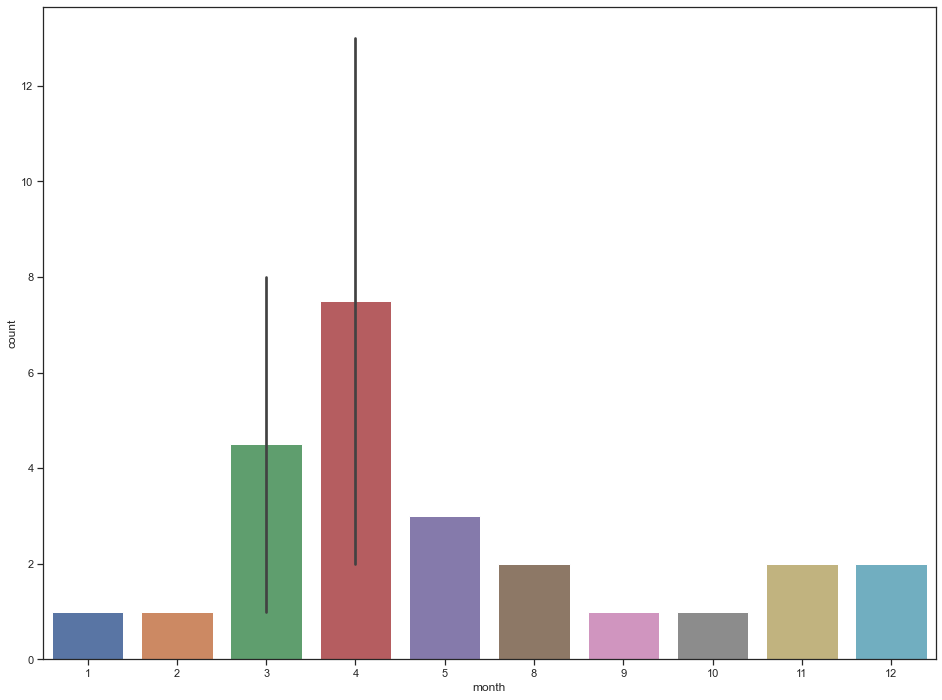

In [268]:
#fig = sns.countplot(count_month, x="month", y="count")
fig = sns.barplot(x="month", y="count", data=count_month)
#fig.show()

Este paso tiene como único objetivo concatenar todo el texto de las noticias por mes.

In [269]:
#data_month = data.groupby(['month','year'])['Noticia'].apply(' '.join).reset_index()
#data_month = data_month.set_index(['month','year'])
data_month = data.groupby(['month'])['Noticia'].apply(' '.join).reset_index()
data_month = data_month.set_index(['month'])

data_month


Noticia
month                                                   
1       Actualmente, el INS mantiene asegurados a 1.4...
2       Sin que tengamos claridad de los resultados f...
3      Eduardo Cruickshank, de Restauración Nacional,...
4      Varias entidades financieras reportaron este l...
5      El portal suplanta las identidades de la Super...
8       El 7 de abril, las operadoras de pensiones em...
9      Desde el pasado 6 de marzo Costa Rica reportó ...
10      Foto: Jorge Navarro La crisis del coronavirus...
11      Debido a la pandemia causada por el virus de ...
12      A inicios de diciembre, así lucía la avenida ...

#### Limpieza de datos
En esta etapa se aplican filtros de limpieza que suelen usarse en los textos:

* Pasar textos a minúsculas
* Quitar signos de puntuación
* Quitar espacios extras y tabulaciones

In [270]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
 
round1 = lambda x: clean_text_round1(x)
 
data_clean = pd.DataFrame(data_month.Noticia.apply(round1))

def clean_text_round2(text):
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.Noticia.apply(round2))
data_clean

Noticia
month                                                   
1       actualmente  el ins mantiene asegurados a    ...
2       sin que tengamos claridad de los resultados f...
3      eduardo cruickshank  de restauración nacional ...
4      varias entidades financieras reportaron este l...
5      el portal suplanta las identidades de la super...
8       el  de abril  las operadoras de pensiones emp...
9      desde el pasado  de marzo costa rica reportó e...
10      foto  jorge navarro la crisis del coronavirus...
11      debido a la pandemia causada por el virus de ...
12      a inicios de diciembre  así lucía la avenida ...

A partir del conjunto de datos limpio, se crea un "Bag of Words" contando el número de veces que una palabra aparece en las noticias y calculando la frecuencia de las mismas. En este paso, se incluye la lectura de las "stopwords" en español desde nuestro repositorio, las cuales nos permiten filtrar palabras vacías o sin significado para nuestro análisis como articulos, pronombres, preposiciones, etc.

In [271]:
master = "D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt"
#req = requests.get(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt')
#req = pd.read_fwf(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', header=None,encoding = 'utf8')
with open(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', "r",encoding = 'utf8') as archivo:
    lista = [linea.rstrip() for linea in archivo]

In [272]:
cv = CountVectorizer(stop_words=lista)
#print(data_clean.Noticia)
#print(cv)
data_cv = cv.fit_transform(data_clean.Noticia)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm

aarón  abandonar  abarcaban  abierta  abogada  abogados  abriendo  \
month                                                                      
1          0          0          0        0        0         0         0   
2          0          0          0        0        0         0         0   
3          0          0          1        1        0         0         0   
4          0          0          0        0        0         0         1   
5          0          0          0        0        0         0         0   
8          1          0          0        0        0         0         0   
9          0          1          0        0        0         0         0   
10         0          0          0        0        1         1         0   
11         0          0          0        0        0         0         0   
12         0          0          0        0        0         0         0   

       abril  abrir  abuelos  ...  ágil  ágiles  álvaro  ámbito  área  áreas  \
month                         ...                                              
1          1      0        0  ...     0       0       0       0     0      0   
2          0      0        1  ...     0       0       0       0     0      0   
3          3      1        0  ...     1       0       3       1     1      0   
4          8      1        0  ...     0       2       0       0     2      0   
5          1      1        0  ...     0       0       0       0     0      0   
8          8      0        0  ...     0       0       0       0     0      0   
9          0      0        0  ...     0       0       0       0     0      0   
10         0      0        0  ...     0       0       0       0     0      0   
11         0      0        0  ...     0       0       0       0     0      1   
12         0      0        0  ...     0       0       0       0     0      0   

       época  única  únicamente  único  
month                                   
1          0      0           0      0  
2          0      0           0      0  
3          0      1           0      0  
4          1      0           1      1  
5          0      0           0      0  
8          0      0           0      0  
9          0      0           1      0  
10         0      0           0      0  
11         0      0           0      0  
12         0      0           0      0  

[10 rows x 3327 columns]

## Análisis exploratorio

Con el dataframe transpuesto se inicia la exploración del dataset.

In [273]:
dt_data = data_dtm.transpose()
dt_data.head()

month      1   2   3   4   5   8   9   10  11  12
aarón       0   0   0   0   0   1   0   0   0   0
abandonar   0   0   0   0   0   0   1   0   0   0
abarcaban   0   0   1   0   0   0   0   0   0   0
abierta     0   0   1   0   0   0   0   0   0   0
abogada     0   0   0   0   0   0   0   1   0   0

Se extraen las palabras más usadas por meses, identificando las palabras como covid y sus sinónimos, FCL, jornada, reducción, estas palabras forman parte de la conversación habitual en las notas periodisticas sobre los FCL.

In [274]:
top_dict = {}
for c in dt_data.columns:
    top = dt_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

for month, top_words in top_dict.items():
    print(month)
    print(', '.join([word+' '+str(count) for word, count in top_words[0:14]]))

1
ins 9, aviso 5, trabajadores 4, contagio 4, ccss 4, instituto 3, caso 3, covid 3, accidente 3, trabajador 3, nacional 3, casos 3, virus 3, centros 3
2
renta 9, trabajadores 6, año 5, declaración 5, global 5, proyecto 4, gastos 4, ingresos 4, colones 3, ley 3, ingreso 3, trabajador 3, contribuyentes 3, deberán 3
3
fcl 38, proyecto 21, personas 20, nacional 19, trabajadores 19, laboral 19, pandemia 18, pensiones 18, banco 16, height 16, datawrapper 16, emergencia 16, ley 16, retiro 16
4
laboral 33, pensiones 33, fcl 30, ley 27, personas 24, covid 17, suspensión 16, fondo 16, jornada 16, horas 16, contrato 16, reducción 15, emergencia 15, operadoras 14
5
ingreso 9, fuentes 9, personas 8, idea 6, generar 6, covid 6, cuarentena 5, proceso 5, persona 5, alfaro 5, mercado 4, crear 4, negocio 4, forma 4
8
millones 13, datos 12, covid 10, fcl 9, ingresos 9, personas 8, pensiones 8, abril 8, bancarias 6, estafadores 6, judicial 6, información 6, fraudes 6, víctimas 5
9
migración 6, extranjería

Dentro de este listado se observa que hay varias palabras muy usadas sin un significado útil para el análisis. Por lo que se procede a crear una lista de las palabras menos usadas, para posteriormente unificarlo a nuestro listado de stopwords. 

In [275]:
from collections import Counter

words = []
for anio in dt_data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('covid', 7), ('trabajadores', 5), ('personas', 5), ('laboral', 5), ('nacional', 4), ('ley', 4), ('fcl', 4), ('pandemia', 4), ('pensiones', 4), ('emergencia', 4), ('caso', 3), ('trabajador', 3), ('proyecto', 3), ('ingresos', 3), ('ingreso', 3), ('marzo', 3), ('banco', 3), ('lea', 3), ('país', 3), ('suspensión', 3), ('contrato', 3), ('medida', 3), ('contagio', 2), ('virus', 2), ('salud', 2), ('caja', 2), ('presentar', 2), ('año', 2), ('retiro', 2), ('operadoras', 2), ('fondo', 2), ('coronavirus', 2), ('jornada', 2), ('reducción', 2), ('rica', 2), ('importante', 2), ('información', 2), ('empresas', 2), ('medidas', 2), ('laborales', 2), ('acuerdo', 2), ('pago', 2), ('contratos', 2), ('relación', 2), ('temporal', 2), ('ins', 1), ('aviso', 1), ('ccss', 1), ('instituto', 1), ('accidente', 1), ('casos', 1), ('centros', 1), ('atención', 1), ('territorio', 1), ('brindadas', 1), ('contagiados', 1), ('paciente', 1), ('atenciones', 1), ('correo', 1), ('colaboradores', 1), ('consultasrt', 1), ('as

['covid']

En este paso, se actualiza la "Bag of Words" que se quitaran del conjunto de datos. Algunas de ellas se pueden incorporar manualmente a la lista.

In [276]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = lista #req.text.split(sep='\n')
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['mesa','aviso','caso','debe','horas','dato','idea','día','nuevo','según','si','hora','año','function', 'recomendamos', 'además', 'intermediate', 'display','ad','gpt','dijo','div','más','también', 'interarticle','pues','parte','está', 'cmd', 'push', 'googletag','alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','cualquier','cuales','así','foto','hogar','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Noticia)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

### **Nubes de palabras por mes**
Se generan nubes de palabras para identificar los topicos principales por meses. Observando que en el mes de Julio, se mencionó varias veces la reapertura de servicios de comida en varias regiones del país.

In [280]:
data_clean.head(20)

Noticia
month                                                   
1       actualmente  el ins mantiene asegurados a    ...
2       sin que tengamos claridad de los resultados f...
3      eduardo cruickshank  de restauración nacional ...
4      varias entidades financieras reportaron este l...
5      el portal suplanta las identidades de la super...
8       el  de abril  las operadoras de pensiones emp...
9      desde el pasado  de marzo costa rica reportó e...
10      foto  jorge navarro la crisis del coronavirus...
11      debido a la pandemia causada por el virus de ...
12      a inicios de diciembre  así lucía la avenida ...

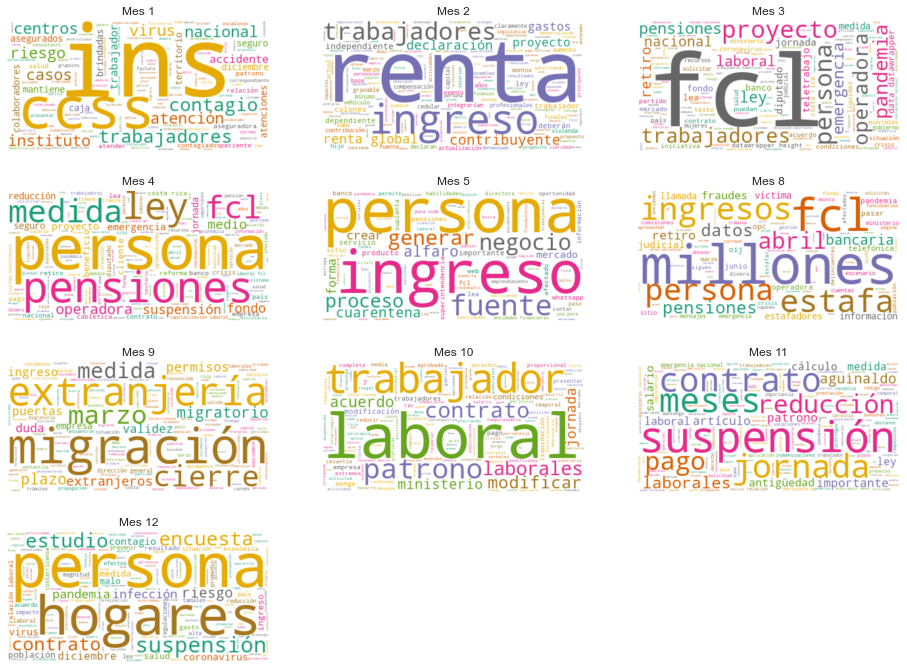

In [287]:
from wordcloud import WordCloud
meses = ['1','2','3','4','5','6','7','8','9','10','11','12']

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

for index, mes in enumerate(dt_data.columns):
    wc.generate(data_clean.Noticia[mes])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Mes '+meses[mes-1])
plt.show()

## **Análisis de sentimientos**
Para cada noticia se analiza su polaridad y subjetividad, la primera asigna un valor positivo o negativo dependiendo del sentimiento identificado. 

# ADVERTENCIA: Este fragmento del código tarda debido a la traducción al idioma inglés con el módulo textblob.

In [288]:
import nltk
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

traducir = lambda x: TextBlob(x).translate(to="en")

data['blob_en'] = data['Noticia'].apply(traducir)
data['polarity'] = data['blob_en'].apply(pol2)
data['subjectivity'] = data['blob_en'].apply(sub2)
data.to_csv('translated_news.csv', index=False) # Generación del archivo que contiene las noticias traducidas

Este dataframe (mismo que se genera en el paso anterior), contiene las notas periodisticas traducidas al idioma inglés.

In [289]:
data = pd.read_csv(r'C:\Users\OREAMUNOAE\Desktop\Maestria\translated_news.csv',sep=',',encoding = 'utf8')
#data = data.drop("Unnamed: 0", axis=1)
data

Keywords                                             Titulo  \
0               Covid, FCL  Crisis disparó retiros del FCL en operadoras d...   
1               Covid, FCL   #NoComaCuento: Sitio web para supuesto retiro...   
2               Covid, FCL   Delincuentes descubren en covid-19 una novedo...   
3               Covid, FCL   CCSS habilita plataforma web para conocer dón...   
4               Covid, FCL   Diputados aprueban entrega del FCL a asalaria...   
5               Covid, FCL   Jefes de fracción debaten plan sobre entrega ...   
6               Covid, FCL   Gobierno estima que hasta 500.000 asalariados...   
7               Covid, FCL   #NoComaCuento: Delincuentes utilizan posible ...   
8               Covid, FCL   Grupo de diputados sugiere texto para entrega...   
9   Covid, Jornada Laboral        Digitalización y retos del Derecho Laboral,   
10  Covid, Jornada Laboral   Trabajadoras domésticas convivieron con fuert...   
11  Covid, Jornada Laboral   Impacto de propuesta de renta global para los...   
12  Covid, Jornada Laboral   INS ha pagado más de ¢1.000 millones a la CCS...   
13  Covid, Jornada Laboral   25 de cada 100 ticos planean romper su burbuj...   
14  Covid, Jornada Laboral    Suspensión y Extinción del Contrato de Trabajo,   
15  Covid, Jornada Laboral   Aguinaldo, vacaciones y cesantía en casos de ...   
16  Covid, Jornada Laboral                   Reducción de jornadas laborales,   
17  Covid, Jornada Laboral   Asesoría jurídica: Lo que debe saber ante cua...   
18  Covid, Jornada Laboral            Situación migratoria ante la covid-19 ,   
19  Covid, Jornada Laboral          ¿Cómo generar nuevas fuentes de ingreso?,   
20  Covid, Jornada Laboral   Cabletica rebajará cuota a clientes que sufri...   
21  Covid, Jornada Laboral   Jueza urge ley para evitar apremio de obligad...   
22  Covid, Jornada Laboral   Coronavirus: La permuta de tiempo no laborado...   
23  Covid, Jornada Laboral   Corte Plena implementa jornada laboral de sei...   
24  Covid, Jornada Laboral   Cómo implementar el teletrabajo como medida d...   
25              Covid, FCL  Diputados avalan en segundo debate que asalari...   
26              Covid, FCL    Congreso aprueba flexibilizar retiro del FCL...   
27              Covid, FCL   ¿Cuál es el proceso de vacunación contra COVI...   
28              Covid, FCL   Esté alerta: Rufianes electrónicos usan FCL c...   
29              Covid, FCL   COVID-19 impulsa cambios en mercado de seguro...   
30              Covid, FCL   ¿Y si no sé dónde tengo mi Fondo de Capitaliz...   
31              Covid, FCL   Operadoras de Pensiones todavía no pueden ent...   
32              Covid, FCL   Banco Nacional listo para entregar FCL pero s...   
33              Covid, FCL   Ministro Salas: Esperen instrucciones de los ...   
34              Covid, FCL   (ENTREVISTA) Alvarado presentará la próxima s...   
35              Covid, FCL   Operadores de Pensiones piden condicionar a d...   
36              Covid, FCL   Colapso del sistema de pensiones sería antes ...   

                                                Autor                Fecha  \
0                                      Yeryis Salas.,  2020-08-22 00:00:00   
1                                      Nicole Pérez.,  2020-05-12 00:00:00   
2                                 Eillyn Jiménez B..,  2020-08-04 00:00:00   
3                              José Andrés Céspedes.,  2020-04-15 00:00:00   
4                                    Aarón Sequeira.,  2020-04-01 00:00:00   
5                                    Aarón Sequeira.,  2020-03-31 00:00:00   
6                                    Aarón Sequeira.,  2020-03-28 00:00:00   
7                                      Nicole Pérez.,  2020-03-26 00:00:00   
8                                        Josué Bravo.  2020-03-25 00:00:00   
9    Café Laboral, Alejandro Trejos G. Socio BDS A...  2021-04-30 16:45:00   
10                                   Andrea Hidalgo.,  2021-03-27 00:00:00   
11 

### **Visualización sobre las métricas subjetividad y polaridad en las noticias**
Se genera una visualización global con las métricas de subjetividad y polaridad de tal modo que se pueda observar que tipos de sentimientos predominaron durante el año 2020, observando que gran parte de las noticias se basaron en hechos y no en opiniones, y que el sentimiento que predomino principalemente fue el positivo aunque muy cercano a un estado neutral.

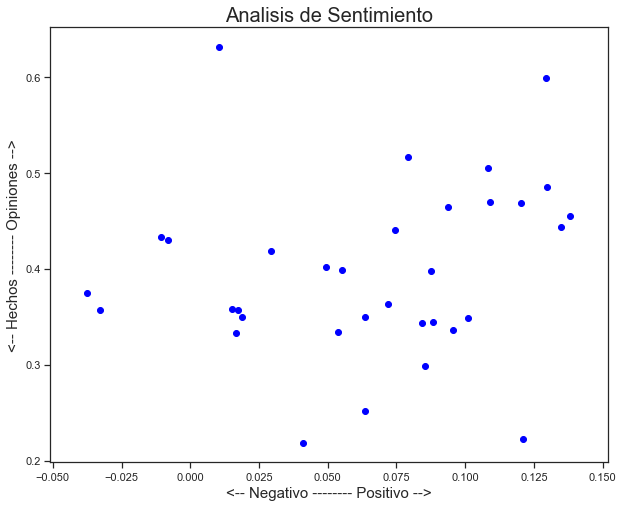

In [290]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data.index):
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Analisis de Sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

### **Distribución de la polaridad**
Con esta distribución de la polaridad, se corrobora lo anteriormente mencionado.

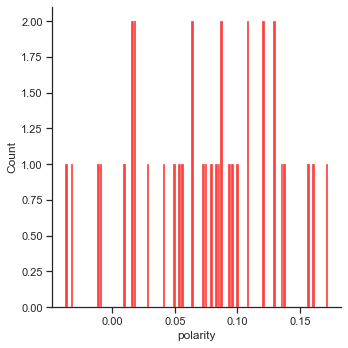

In [291]:
#fig = px.histogram(data, x="polarity", nbins=50)
#fig.show()
#fig = sns.countplot(count_month, x="month", y="count")
#fig = sns.barplot(data,x="polarity", nbins=50 )
sns.displot(data['polarity'], kde=False, color='red', bins=100)
#fig.show()

###### **Serie de tiempo: Polaridad y fecha de publicación de la nota periodística**
Finalmente, para este análisis de sentimientos se ordenan los registros por fecha para generar una visualización por día de publicación y su polaridad de tal manera que se pueda identificar que días se predominaron noticias más positivas o negativas. Observando que el 26 y 31 de marzo y 22 de setiembre se tuvieron las noticias con mayor percepción negativa y el 8 de octubre y 5 y 24 de noviembre con mayor positividad.

In [292]:
data = data.sort_values(by=['Fecha'])

<function matplotlib.pyplot.show(close=None, block=None)>

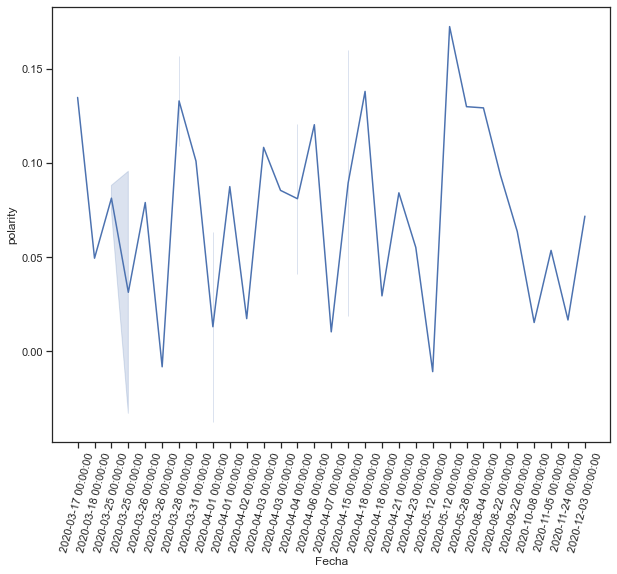

In [293]:
g=sns.lineplot(data=data, x="Fecha", y="polarity")
g.set_xticklabels(labels=data['Fecha'],rotation=75)
plt.show